In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel("Tweet_Analysis.xlsx")

In [ ]:
df.count()

tweet_data    2027
dtype: int64

In [ ]:
df.head(10)

tweet_data
0  my boyfriend then dad and mom passed away all ...
1  seem feminine guy necessarily way would think ...
2  i m currently an art student at university and...
3  looked ocean blue eyes glistering nightsky sit...
4  loved movie cute funny lauren holly wonderful ...
5  went contacts theres oneno one say to anyone w...
6  been on fluoxetine for year but anyway there s...
7  tell post go back reddit idiot thanks guys lov...
8  young woman comes home town husband passed awa...
9  so i started having suicidal thought in april ...

In [ ]:
df = df.rename(columns={"tweet_data":"twitts"})
print(df.columns.tolist())
df.head(3)

['twitts']


twitts
0  my boyfriend then dad and mom passed away all ...
1  seem feminine guy necessarily way would think ...
2  i m currently an art student at university and...

In [ ]:
df['word_count'] = df['twitts'].apply(lambda x: len(str(x).split()))
max_row = df[df['word_count'] == df['word_count'].max()]
print(max_row[['twitts', 'word_count']])


                                                twitts  word_count
798  i often hold myself back from doing the thing ...        1763


In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 13.1 MB/s eta 0:00:00


In [ ]:
!pip install language-tool-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 2.0 MB/s eta 0:00:00


In [ ]:
!pip install datasketch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 3.4 MB/s eta 0:00:00


In [ ]:
!sudo apt-get update
!sudo apt-get install openjdk-17-jdk -y
!update-alternatives --install /usr/bin/java java /usr/lib/jvm/java-17-openjdk-amd64/bin/java 1
!update-alternatives --set java /usr/lib/jvm/java-17-openjdk-amd64/bin/java
!java -version

Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,077 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Pa

In [ ]:
!pip install symspellpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.6/159.6 kB 6.0 MB/s eta 0:00:00


In [ ]:
!pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=f72c3709007fd4ca6d9b2288873574e16668b3b62c3b5556d5b2dc9140dc34bc
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


In [ ]:
import re
import emoji
def clean_texts_twitt(text):
    cleantext = emoji.replace_emoji(text, replace='')
    cleantext = re.sub(r'http\S+\s', ' ', text)
    cleantext = re.sub(r'@\S+', ' ', cleantext)
    cleantext = re.sub(r'#\S+', ' ', cleantext)
    cleantext = re.sub(r'@\S+', ' ', cleantext)
    cleantext = re.sub(r'[%s]' % re.escape(r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleantext)
    cleantext = re.sub(r'[0-9]+', ' ', cleantext)
    cleantext = re.sub(r'[^\x00-\x7f]', r' ', cleantext)
    cleantext = re.sub(r'\s+', ' ', cleantext)
    return cleantext


In [ ]:
tweet = """@joannereid48 #ebnjc It's a very under-researched area, and there's some debate over whether it's appropriate to subject art to the rigour of science. But there's some evidence that it can improve depression and anxiety in patients with mental health issues."""
print(clean_texts_twitt(tweet))


 It s a very under researched area and there s some debate over whether it s appropriate to subject art to the rigour of science But there s some evidence that it can improve depression and anxiety in patients with mental health issues 


In [ ]:
df["twitts"]= df["twitts"].apply(lambda x: clean_texts_twitt(x))

In [ ]:
#filtering explicit text pattern-------------------------------------------
import re
explicit_patterns = [
    r"\b(i|me|my|myself)\b",
    r"\bi (am|was|have|had|feel|think|know|need|want|wish|don't|did|can't|could|would|should|might)\b.*",
    r"\bi['’`]?m\b.*",
    r"\bi['’`]?ve\b.*",
    r"\bi['’`]?d\b.*",
    r"\bi['’`]?ll\b.*",
    r"\b(am|was|do|did|can|could|would|should|might) i\b.*",
]

def normalize_apostrophes(text):
    return text.replace("’", "'").replace("‘", "'").replace("`", "'")

def is_self_referential(text):
    text = normalize_apostrophes(text.lower())
    return any(re.search(pattern, text) for pattern in explicit_patterns)

explicit_texts = [t for t in df["twitts"] if is_self_referential(t)]
print(f"Number of explicit tweets: {len(explicit_texts)}")

Number of explicit tweets: 763


In [ ]:
import re
import string
import nltk
import emoji
import spacy
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from datasketch import MinHash, MinHashLSH
from langdetect import detect
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import pandas as pd
from tqdm import tqdm
from symspellpy import SymSpell, Verbosity
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ---------------------- Setup ----------------------
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])  # faster

self_pronouns = {
    "i", "me", "my", "mine", "myself",
    "i'm", "i’ve", "im", "ive",
    "i’ll", "i’d", "we", "us", "our", "ours", "ourselves"
}

# ---------------------- SymSpell Setup ----------------------
max_edit_distance_dictionary = 2
prefix_length = 7
sym_spell = SymSpell(max_edit_distance_dictionary, prefix_length)
dictionary_path = "frequency_dictionary_en_82_765.txt"  # download from SymSpell repo
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

def correct_text_symspell(text):
    corrected_tokens = []
    for word in text.split():
        if word not in stop_words:
            suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
            corrected_tokens.append(suggestions[0].term if suggestions else word)
        else:
            corrected_tokens.append(word)
    return " ".join(corrected_tokens)

# ---------------------- Utilities ----------------------
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    text = text.lower()
    text = emoji.replace_emoji(text, replace='')
    text = re.sub(r"http\S+|@\S+|#\S+", " ", text)
    text = re.sub(r"[^\x00-\x7F]+", " ", text)
    text = re.sub(r"\d+", " ", text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = text.split()
    filtered_tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(filtered_tokens)

def generate_ngrams(text, n_values=[1, 2, 3]):
    tokens = text.split()
    ngrams_set = set()
    for n in n_values:
        if len(tokens) >= n:
            ngrams_set |= set(" ".join(ng) for ng in ngrams(tokens, n))
    return ngrams_set

def create_minhash(shingles, num_perm=64):
    m = MinHash(num_perm=num_perm)
    for shingle in shingles:
        m.update(shingle.encode("utf8"))
    return m

# ---------------------- Explicit Detection ----------------------
def find_explicit_tweets(tweets):
    explicit_patterns = [
        r"\b(i|me|my|myself)\b",
        r"\bi (am|was|have|had|feel|think|know|need|want|wish|don't|did|can't|could|would|should|might)\b.*",
        r"\bi['’`]?m\b.*",
        r"\bi['’`]?ve\b.*",
        r"\bi['’`]?d\b.*",
        r"\bi['’`]?ll\b.*",
        r"\b(am|was|do|did|can|could|would|should|might) i\b.*",
    ]
    return [t for t in tweets if any(re.search(p, t.lower()) for p in explicit_patterns)]

# ---------------------- Clustering ----------------------
def cluster_tweets(tweets, threshold=0.15, num_perm=64):
    lsh = MinHashLSH(threshold=threshold, num_perm=num_perm)
    idx_to_tweet = {}
    for idx, tweet in enumerate(tweets):
        shingles = generate_ngrams(clean_text(tweet))
        if shingles:
            m = create_minhash(shingles, num_perm)
            lsh.insert(f"t{idx}", m)
            idx_to_tweet[f"t{idx}"] = tweet

    clusters, seen = [], set()
    for key in idx_to_tweet:
        if key not in seen:
            m = create_minhash(generate_ngrams(clean_text(idx_to_tweet[key])), num_perm)
            similar_keys = lsh.query(m)
            cluster = [idx_to_tweet[k] for k in similar_keys]
            clusters.append(cluster)
            seen.update(similar_keys)
    return clusters

# ---------------------- Merge Clusters ----------------------
def merge_similar_clusters(clusters, embeddings, sim_threshold=0.85):
    merged_clusters, merged_indices = [], set()
    for i, cluster in enumerate(clusters):
        if i in merged_indices:
            continue
        merged = cluster.copy()
        for j in range(i + 1, len(clusters)):
            if j not in merged_indices and cosine_similarity([embeddings[i]], [embeddings[j]])[0][0] > sim_threshold:
                merged.extend(clusters[j])
                merged_indices.add(j)
        merged_clusters.append(list(set(merged)))
    return merged_clusters

# ---------------------- Implicit Detection ----------------------
def find_implicit_tweets(all_tweets, explicit_clusters, explicit_tweets_set,
                          jaccard_threshold=0.02, semantic_threshold=0.50,
                          weight_jaccard=0.25, weight_semantic=0.75):
    sarcasm_cues = {"as usual", "nailed it", "perfect timing", "flawless", "of course", "again", "brilliant"}

    cluster_ngram_sets, cluster_embeddings = [], []
    for cluster in explicit_clusters:
        original_texts = [t.lower() for t in cluster]
        cluster_patterns = set()
        for t in original_texts:
            cluster_patterns |= generate_ngrams(t)
        cluster_ngram_sets.append(cluster_patterns)
        cluster_embeddings.append(np.mean(sbert_model.encode(original_texts, convert_to_numpy=True), axis=0))

    implicit_candidates = set()
    tweet_embeddings = sbert_model.encode([t.lower() for t in all_tweets], convert_to_numpy=True)

    for i, tweet in enumerate(all_tweets):
        if tweet in explicit_tweets_set or len(tweet.split()) < 3:
            continue
        try:
            if detect(tweet) != "en":
                continue
        except:
            continue

        tweet_lower = tweet.lower()
        t_ngrams = generate_ngrams(tweet_lower)
        if not t_ngrams:
            continue

        tweet_emb = tweet_embeddings[i]
        match_count, max_semantic = 0, 0.0

        for patterns, cluster_emb in zip(cluster_ngram_sets, cluster_embeddings):
            jaccard = len(patterns & t_ngrams) / len(patterns | t_ngrams) if patterns else 0
            semantic_sim = cosine_similarity([tweet_emb], [cluster_emb])[0][0]
            if jaccard >= jaccard_threshold:
                match_count += 1
            max_semantic = max(max_semantic, semantic_sim)

        combined_score = (weight_jaccard * min(match_count / len(cluster_ngram_sets), 1.0)) + \
                         (weight_semantic * max_semantic)
        has_sarcasm_cue = any(cue in tweet_lower for cue in sarcasm_cues)

        if (match_count >= 1 and combined_score >= 0.40) or max_semantic >= semantic_threshold or has_sarcasm_cue:
            implicit_candidates.add(tweet)

    return list(implicit_candidates)

# ---------------------- Main Pipeline ----------------------
if __name__ == "__main__":
    tweets = df["twitts"].dropna().tolist()

    # Explicit tweets
    explicit = find_explicit_tweets(tweets)
    explicit_clusters = cluster_tweets(explicit, threshold=0.15)

    # Merge clusters
    cluster_embeddings = sbert_model.encode([clean_text(" ".join(c)) for c in explicit_clusters],
                                            convert_to_numpy=True)
    merged_clusters = merge_similar_clusters(explicit_clusters, cluster_embeddings)

    # Implicit tweets
    implicit = find_implicit_tweets(
        tweets, merged_clusters,
        explicit_tweets_set=set(explicit)
    )


    explicit_texts = list(set([t for cluster in merged_clusters for t in cluster]))
    implicit_texts = list(set(implicit))
    self_tweets = list(set(explicit_texts + implicit_texts))

    print("\n[INFO] Final counts:")
    print(f"Explicit: {len(explicit_texts)}")
    print(f"Implicit: {len(implicit_texts)}")
    print(f"Total self-tweets: {len(self_tweets)}")




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2025-10-09 16:29:12,986: E symspellpy.symspellpy] Dictionary file not found at frequency_dictionary_en_82_765.txt.
ERROR:symspellpy.symspellpy:Dictionary file not found at frequency_dictionary_en_82_765.txt.



[INFO] Final counts:
Explicit: 763
Implicit: 198
Total self-tweets: 961


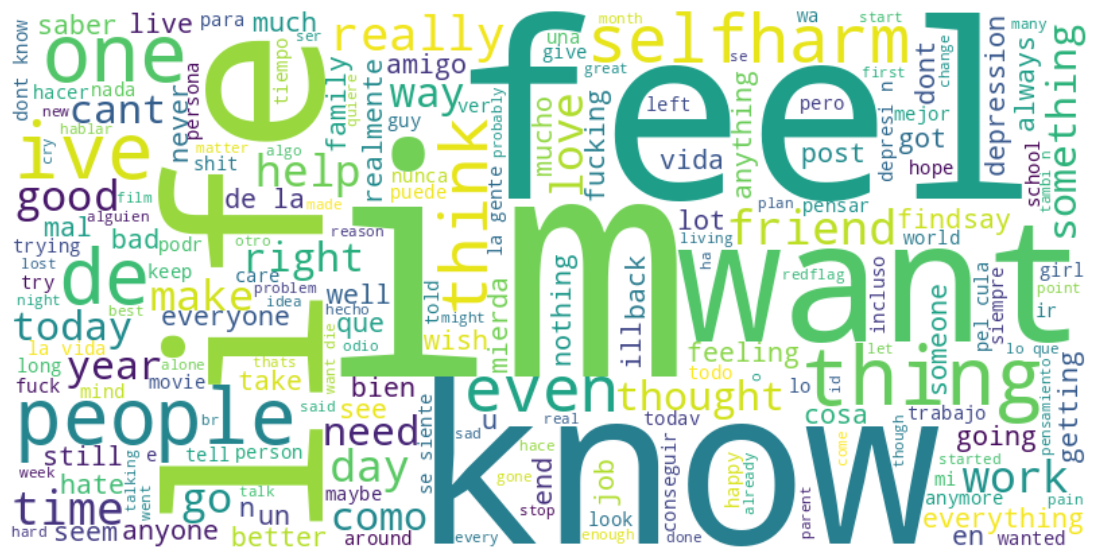

In [ ]:
 # ---------------------- Word Cloud with SymSpell ----------------------
corrected_self_tweets = [correct_text_symspell(clean_text(t)) for t in self_tweets]
text_for_wc = " ".join(corrected_self_tweets)

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_for_wc)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


[INFO] Final counts:
Explicit: 763
Implicit: 198
Total self-tweets: 961
Non-self tweets: 1066


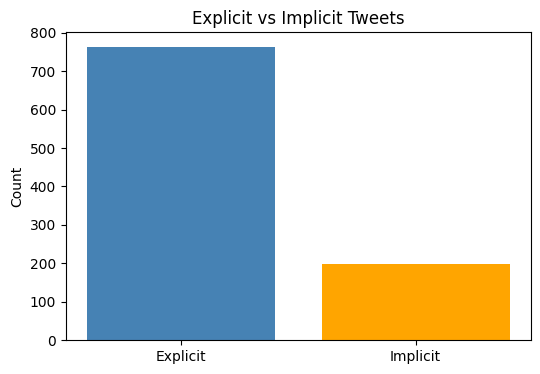

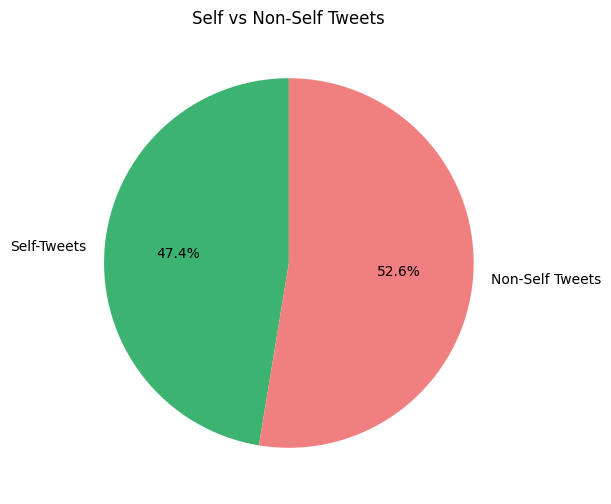

In [ ]:
import matplotlib.pyplot as plt


def visualize_results(results):
    explicit_count = len(results["explicit"])
    implicit_count = len(results["implicit"])
    total_count = len(results["tweets"])
    self_count = len(results["self_tweets"])
    non_self_count = total_count - self_count


    plt.figure(figsize=(6, 4))
    plt.bar(["Explicit", "Implicit"], [explicit_count, implicit_count], color=["steelblue", "orange"])
    plt.title("Explicit vs Implicit Tweets")
    plt.ylabel("Count")
    plt.show()


    plt.figure(figsize=(6, 6))
    plt.pie(
        [self_count, non_self_count],
        labels=["Self-Tweets", "Non-Self Tweets"],
        autopct="%1.1f%%",
        colors=["mediumseagreen", "lightcoral"],
        startangle=90,
    )
    plt.title("Self vs Non-Self Tweets")
    plt.show()



if __name__ == "__main__":



    explicit_texts = list(set([t for cluster in merged_clusters for t in cluster]))
    implicit_texts = list(set(implicit))
    self_tweets = list(set(explicit_texts + implicit_texts))


    results = {
        "tweets": tweets,
        "explicit": explicit_texts,
        "implicit": implicit_texts,
        "self_tweets": self_tweets
    }

    print("\n[INFO] Final counts:")
    print(f"Explicit: {len(results['explicit'])}")
    print(f"Implicit: {len(results['implicit'])}")
    print(f"Total self-tweets: {len(results['self_tweets'])}")
    print(f"Non-self tweets: {len(results['tweets']) - len(results['self_tweets'])}")


    visualize_results(results)


In [ ]:
    explicit_texts = list(set([t for cluster in merged_clusters for t in cluster]))
    implicit_texts = list(set(implicit))
    self_tweets = list(set(explicit_texts + implicit_texts))

    print("\n[INFO] Final counts:")
    print(f"Explicit: {len(explicit_texts)}")
    print(f"Implicit: {len(implicit_texts)}")
    print(f"Total self-tweets: {len(self_tweets)}")


    print("\n[Sample Explicit Tweets]:")
    for t in explicit_texts[:10]:
        print("-", t)

    print("\n[Sample Implicit Tweets]:")
    for t in implicit_texts[:10]:
        print("-", t)



[INFO] Final counts:
Explicit: 763
Implicit: 198
Total self-tweets: 961

[Sample Explicit Tweets]:
- i return to work after a year of sitting at home with depression in this year i had to have a prosthesis put in my shoulder i am year old because of my past and depression my relationship with my colleague have diluted i ve said and done some bad thing that i couldn t help myself i wa just exhausted i realize that it is also difficult and strange for them but for me it is really difficult i still have anxiety attack daily with two teenager in the house the stress is certainly not gone due to stress i lost my hearing on my right side i got meniere s disease because of it i am sorry that there is no understanding for my situation now i had to have an ultrasound of my shoulder and it turn out that i have calcification it will probably need surgery again which i certainly don t like this would be the th time it s the first time i ve posted something like this anywhere on the internet i jus

In [ ]:
explicit_texts = list(set([t for cluster in merged_clusters for t in cluster]))
implicit_texts = list(set(implicit))
self_tweets = list(set(explicit_texts + implicit_texts))

all_tweets = df['twitts'].tolist()
self_tweets = list(set(self_tweets))
non_self_tweet = list(set(all_tweets) - set(self_tweets))

print("\n[INFO] Final counts:")
print(f"Explicit: {len(explicit_texts)}")
print(f"Implicit: {len(implicit_texts)}")
print(f"Total self-tweets: {len(self_tweets)}")
print(f"Total non_self-tweets: {len(non_self_tweet)}")



[INFO] Final counts:
Explicit: 763
Implicit: 198
Total self-tweets: 961
Total non_self-tweets: 1065


In [ ]:
 for t in non_self_tweet[:100]:
        print("-", t)

- A local artist painted utility boxes to look like giant LEGO bricks now the whole block looks like a toyland
- Library date stamps clicking over to a new day inked proof that stories outlive their borrowers 
- sometimes youtube ha no sound on ubuntu sometimes youtube ha no sound on ubuntu a veces youtube no tiene sonido en ubuntu
- the fda should even the score for women s sexual health
- lot talk made psychological westerns one truly genre big name stars perform well director makes good movie stewart granger loses british safari hunter stereotype play haggard retired buffalo hunter revered west one best robert taylor plays upstart in contrast usual young upstart taylors character middle aged too wants slaughter buffalo lures granger business him hire two big name actors lloyd nolan russ tamblyn skinners granger haunted buffalo killed knowing may blame become extinct knowing become extinct native american way life greatly suffer taylor soon reveals sadistic side realistic saidism unl

In [ ]:
df.count()

twitts        2145
word_count    2145
dtype: int64

In [ ]:
import re
import string
import nltk
import emoji
import spacy
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from datasketch import MinHash, MinHashLSH
from langdetect import detect
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import pandas as pd
from tqdm import tqdm
from symspellpy import SymSpell, Verbosity
import matplotlib.pyplot as plt

# ---------------------- Setup ----------------------
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])  # faster

self_pronouns = {
    "i", "me", "my", "mine", "myself",
    "i'm", "i’ve", "im", "ive",
    "i’ll", "i’d", "we", "us", "our", "ours", "ourselves"
}

# ---------------------- SymSpell Setup ----------------------
max_edit_distance_dictionary = 2
prefix_length = 7
sym_spell = SymSpell(max_edit_distance_dictionary, prefix_length)
dictionary_path = "frequency_dictionary_en_82_765.txt"  # download from SymSpell repo
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

def correct_text_symspell(text):
    corrected_tokens = []
    for word in text.split():
        if word not in stop_words:
            suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
            corrected_tokens.append(suggestions[0].term if suggestions else word)
        else:
            corrected_tokens.append(word)
    return " ".join(corrected_tokens)

# ---------------------- Utilities ----------------------
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    text = text.lower()
    text = emoji.replace_emoji(text, replace='')
    text = re.sub(r"http\S+|@\S+|#\S+", " ", text)
    text = re.sub(r"[^\x00-\x7F]+", " ", text)
    text = re.sub(r"\d+", " ", text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = text.split()
    filtered_tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(filtered_tokens)

def generate_ngrams(text, n_values=[1, 2, 3]):
    tokens = text.split()
    ngrams_set = set()
    for n in n_values:
        if len(tokens) >= n:
            ngrams_set |= set(" ".join(ng) for ng in ngrams(tokens, n))
    return ngrams_set

def create_minhash(shingles, num_perm=64):
    m = MinHash(num_perm=num_perm)
    for shingle in shingles:
        m.update(shingle.encode("utf8"))
    return m

# ---------------------- Explicit Detection ----------------------
def find_explicit_tweets(tweets):
    explicit_patterns = [
        r"\b(i|me|my|myself)\b",
        r"\bi (am|was|have|had|feel|think|know|need|want|wish|don't|did|can't|could|would|should|might)\b.*",
        r"\bi['’`]?m\b.*",
        r"\bi['’`]?ve\b.*",
        r"\bi['’`]?d\b.*",
        r"\bi['’`]?ll\b.*",
        r"\b(am|was|do|did|can|could|would|should|might) i\b.*",
    ]
    return [t for t in tweets if any(re.search(p, t.lower()) for p in explicit_patterns)]

# ---------------------- Clustering ----------------------
def cluster_tweets(tweets, threshold=0.15, num_perm=64):
    lsh = MinHashLSH(threshold=threshold, num_perm=num_perm)
    idx_to_tweet = {}
    for idx, tweet in enumerate(tqdm(tweets, desc="Indexing explicit tweets")):
        shingles = generate_ngrams(clean_text(tweet))
        if shingles:
            m = create_minhash(shingles, num_perm)
            lsh.insert(f"t{idx}", m)
            idx_to_tweet[f"t{idx}"] = tweet

    clusters, seen = [], set()
    for key in tqdm(idx_to_tweet, desc="Clustering tweets"):
        if key not in seen:
            m = create_minhash(generate_ngrams(clean_text(idx_to_tweet[key])), num_perm)
            similar_keys = lsh.query(m)
            cluster = [idx_to_tweet[k] for k in similar_keys]
            clusters.append(cluster)
            seen.update(similar_keys)
    return clusters

# ---------------------- Merge Clusters ----------------------
def merge_similar_clusters(clusters, embeddings, sim_threshold=0.85):
    merged_clusters, merged_indices = [], set()
    for i, cluster in enumerate(clusters):
        if i in merged_indices:
            continue
        merged = cluster.copy()
        for j in range(i + 1, len(clusters)):
            if j not in merged_indices and cosine_similarity([embeddings[i]], [embeddings[j]])[0][0] > sim_threshold:
                merged.extend(clusters[j])
                merged_indices.add(j)
        merged_clusters.append(list(set(merged)))
    return merged_clusters

# ---------------------- Lexicon Discovery ----------------------
def discover_lexicon(explicit_clusters, top_k=50):
    all_phrases, explicit_phrases = [], []
    for cluster in explicit_clusters:
        for t in cluster:
            clean = clean_text(t)
            explicit_phrases.extend(generate_ngrams(clean, [2, 3]))
            all_phrases.extend(generate_ngrams(clean, [2, 3]))

    if not explicit_phrases:
        return set()

    all_freq = pd.Series(all_phrases).value_counts()
    explicit_freq = pd.Series(explicit_phrases).value_counts()

    scores = {}
    for phrase in explicit_freq.index:
        scores[phrase] = explicit_freq[phrase] / (all_freq.get(phrase, 1))

    sorted_phrases = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    return {p for p, _ in sorted_phrases[:top_k]}

# ---------------------- Implicit Detection ----------------------
def find_implicit_tweets(all_tweets, explicit_clusters, explicit_tweets_set,
                          jaccard_threshold=0.02, semantic_threshold=0.50,
                          weight_jaccard=0.25, weight_semantic=0.75):

    # Dynamically discovered sarcasm cues
    sarcasm_cues = discover_lexicon(explicit_clusters, top_k=50)

    cluster_ngram_sets, cluster_embeddings = [], []
    for cluster in tqdm(explicit_clusters, desc="Building cluster features"):
        original_texts = [t.lower() for t in cluster]
        cluster_patterns = set()
        for t in original_texts:
            cluster_patterns |= generate_ngrams(t)
        cluster_ngram_sets.append(cluster_patterns)
        cluster_embeddings.append(np.mean(sbert_model.encode(original_texts, convert_to_numpy=True), axis=0))

    implicit_candidates = set()
    tweet_embeddings = sbert_model.encode([t.lower() for t in all_tweets], convert_to_numpy=True)

    for i, tweet in enumerate(tqdm(all_tweets, desc="Scanning tweets")):
        if tweet in explicit_tweets_set or len(tweet.split()) < 3:
            continue
        try:
            if detect(tweet) != "en":
                continue
        except:
            continue

        tweet_lower = tweet.lower()
        t_ngrams = generate_ngrams(tweet_lower)
        if not t_ngrams:
            continue

        tweet_emb = tweet_embeddings[i]
        match_count, max_semantic = 0, 0.0

        for patterns, cluster_emb in zip(cluster_ngram_sets, cluster_embeddings):
            jaccard = len(patterns & t_ngrams) / len(patterns | t_ngrams) if patterns else 0
            semantic_sim = cosine_similarity([tweet_emb], [cluster_emb])[0][0]
            if jaccard >= jaccard_threshold:
                match_count += 1
            max_semantic = max(max_semantic, semantic_sim)

        combined_score = (weight_jaccard * min(match_count / len(cluster_ngram_sets), 1.0)) + \
                         (weight_semantic * max_semantic)
        has_sarcasm_cue = any(cue in tweet_lower for cue in sarcasm_cues)

        if (match_count >= 1 and combined_score >= 0.40) or max_semantic >= semantic_threshold or has_sarcasm_cue:
            implicit_candidates.add(tweet)

    return list(implicit_candidates)

# ---------------------- Main Pipeline ----------------------
if __name__ == "__main__":
    tweets = df["twitts"].dropna().tolist()

    # Explicit tweets
    explicit = find_explicit_tweets(tweets)
    explicit_clusters = cluster_tweets(explicit, threshold=0.15)

    # Merge clusters
    cluster_embeddings = sbert_model.encode([clean_text(" ".join(c)) for c in explicit_clusters],
                                            convert_to_numpy=True)
    merged_clusters = merge_similar_clusters(explicit_clusters, cluster_embeddings)

    # Implicit tweets
    implicit = find_implicit_tweets(
        tweets, merged_clusters,
        explicit_tweets_set=set(explicit)
    )

    explicit_texts = list(set([t for cluster in merged_clusters for t in cluster]))
    implicit_texts = list(set(implicit))
    self_tweets = list(set(explicit_texts + implicit_texts))

    print("\n[INFO] Final counts:")
    print(f"Explicit: {len(explicit_texts)}")
    print(f"Implicit: {len(implicit_texts)}")
    print(f"Total self-tweets: {len(self_tweets)}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2025-10-12 18:46:46,345: E symspellpy.symspellpy] Dictionary file not found at frequency_dictionary_en_82_765.txt.
ERROR:symspellpy.symspellpy:Dictionary file not found at frequency_dictionary_en_82_765.txt.
Scanning tweets: 100%|██████████| 2027/2027 [05:27<00:00,  6.20it/s]


[INFO] Final counts:
Explicit: 763
Implicit: 242
Total self-tweets: 1005


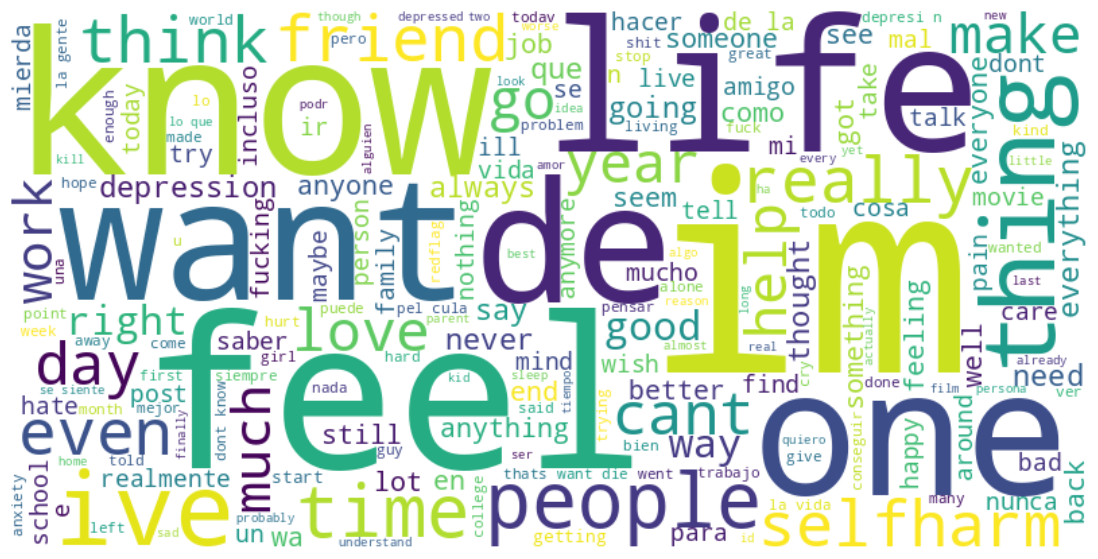

In [ ]:

from wordcloud import WordCloud
corrected_self_tweets = [correct_text_symspell(clean_text(t)) for t in self_tweets]
text_for_wc = " ".join(corrected_self_tweets)

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_for_wc)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


[INFO] Final counts:
Explicit: 763
Implicit: 242
Total self-tweets: 1005
Non-self tweets: 1022


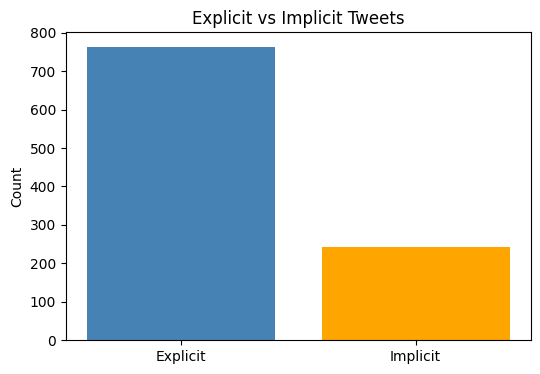

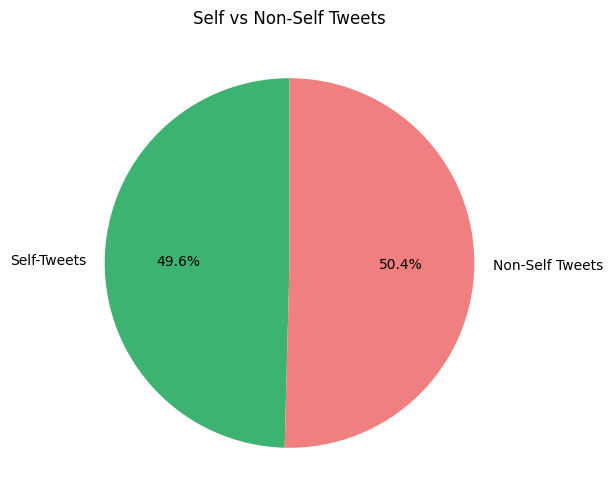

In [ ]:
import matplotlib.pyplot as plt


def visualize_results(results):
    explicit_count = len(results["explicit"])
    implicit_count = len(results["implicit"])
    total_count = len(results["tweets"])
    self_count = len(results["self_tweets"])
    non_self_count = total_count - self_count


    plt.figure(figsize=(6, 4))
    plt.bar(["Explicit", "Implicit"], [explicit_count, implicit_count], color=["steelblue", "orange"])
    plt.title("Explicit vs Implicit Tweets")
    plt.ylabel("Count")
    plt.show()


    plt.figure(figsize=(6, 6))
    plt.pie(
        [self_count, non_self_count],
        labels=["Self-Tweets", "Non-Self Tweets"],
        autopct="%1.1f%%",
        colors=["mediumseagreen", "lightcoral"],
        startangle=90,
    )
    plt.title("Self vs Non-Self Tweets")
    plt.show()



if __name__ == "__main__":



    explicit_texts = list(set([t for cluster in merged_clusters for t in cluster]))
    implicit_texts = list(set(implicit))
    self_tweets = list(set(explicit_texts + implicit_texts))


    results = {
        "tweets": tweets,
        "explicit": explicit_texts,
        "implicit": implicit_texts,
        "self_tweets": self_tweets
    }

    print("\n[INFO] Final counts:")
    print(f"Explicit: {len(results['explicit'])}")
    print(f"Implicit: {len(results['implicit'])}")
    print(f"Total self-tweets: {len(results['self_tweets'])}")
    print(f"Non-self tweets: {len(results['tweets']) - len(results['self_tweets'])}")


    visualize_results(results)


In [ ]:
explicit_texts = list(set([t for cluster in merged_clusters for t in cluster]))
implicit_texts = list(set(implicit))
self_tweets = list(set(explicit_texts + implicit_texts))

print("\n[INFO] Final counts:")
print(f"Explicit: {len(explicit_texts)}")
print(f"Implicit: {len(implicit_texts)}")
print(f"Total self-tweets: {len(self_tweets)}")

print("\n[Sample Explicit Tweets]:")
for t in explicit_texts[:10]:
    print("-", t)


print("\n[Sample Implicit Tweets]:")

for t in implicit_texts[:10]:
    print("-", t)


explicit_texts = list(set([t for cluster in merged_clusters for t in cluster]))
implicit_texts = list(set(implicit))
self_tweets = list(set(explicit_texts + implicit_texts))

all_tweets = df['twitts'].tolist()
self_tweets = list(set(self_tweets))
non_self_tweet = list(set(all_tweets) - set(self_tweets))

print("\n[INFO] Final counts:")
print(f"Explicit: {len(explicit_texts)}")
print(f"Implicit: {len(implicit_texts)}")
print(f"Total self-tweets: {len(self_tweets)}")
print(f"Total non_self-tweets: {len(non_self_tweet)}")
for t in non_self_tweet[:10]:
        print("-", t)


[INFO] Final counts:
Explicit: 763
Implicit: 242
Total self-tweets: 1005

[Sample Explicit Tweets]:
- i m currently an art student at university and i m trying to pas the year but my anxiety coupled with my low self worth ha made it dangerously difficult to complete any kind of task or face up to any kind of challenge it s already taking what i have to take care of myself everyday and to give myself break whenever thing get tough but my work demand a lot and i want to get through it but whenever i look at what i have to do the thing i need to do i shut down i can t imagine myself ever completing these task or accomplishing thing and this is my last chance at university or i have to drop out i don t think i could take that kind of failure i want to be able to sit down and work hard face the challenge and either fail and try again or triumph and move onto the next so much of me is tied to the confidence i have in a task on a good day i ll create something i never thought i d do on my ow


🔵 WordCloud of Explicit Tweets


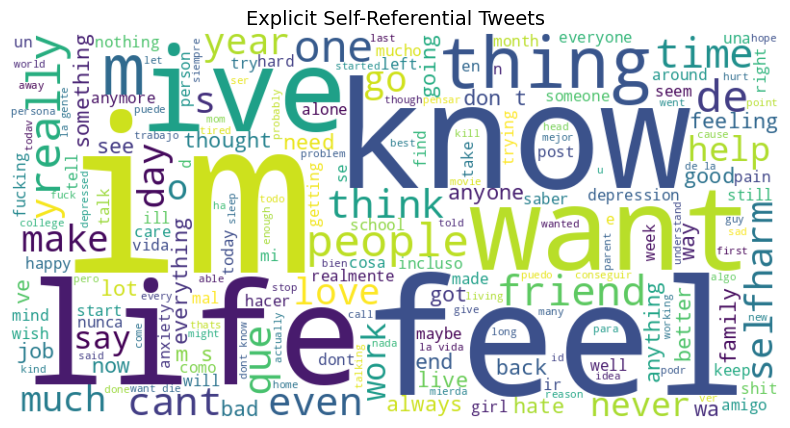


🟣 WordCloud of Implicit Tweets


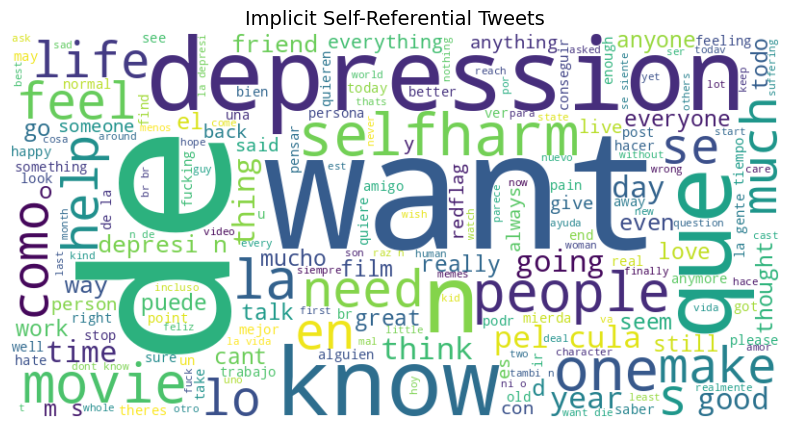


  PCA Scatter Plot


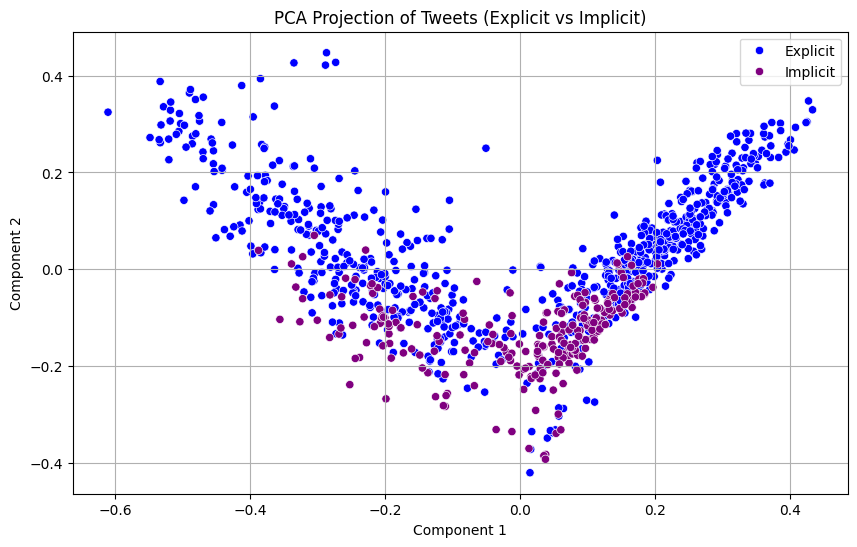

In [ ]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA



explicit_texts = list(set(explicit_texts))
implicit_texts = list(set(implicit_texts))


def plot_wordcloud(texts, title):
    combined_text = " ".join(texts)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title, fontsize=14)
    plt.show()

print("\n🔵 WordCloud of Explicit Tweets")
plot_wordcloud(explicit_texts, "Explicit Self-Referential Tweets")

print("\n🟣 WordCloud of Implicit Tweets")
plot_wordcloud(implicit_texts, "Implicit Self-Referential Tweets")


def visualize_pca(explicit_texts, implicit_texts):
    all_texts = explicit_texts + implicit_texts
    labels = ['Explicit'] * len(explicit_texts) + ['Implicit'] * len(implicit_texts)

    vectorizer = TfidfVectorizer(max_features=300)
    X = vectorizer.fit_transform(all_texts).toarray()

    pca = PCA(n_components=2)
    components = pca.fit_transform(X)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=labels, palette=['blue', 'purple'])
    plt.title("PCA Projection of Tweets (Explicit vs Implicit)")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.show()

print("\n  PCA Scatter Plot")
visualize_pca(explicit_texts, implicit_texts)


In [ ]:
import random

sample_size = len(self_tweets)

if len(non_self_tweet) < sample_size:
    nsds_sample = random.choices(non_self_tweet, k=sample_size)
else:
    nsds_sample = random.sample(non_self_tweet, sample_size)


X = self_tweets + nsds_sample
y = [1] * len(self_tweets) + [0] * len(nsds_sample)


print("Self tweets size:", len(self_tweets))
print("Non-self tweets size (sampled):", len(nsds_sample))
print("Total dataset size:", len(X))


for i in range(5):
    print(f"Tweet: {X[i]} | Label: {y[i]}")


Self tweets size: 1005
Non-self tweets size (sampled): 1005
Total dataset size: 2010
Tweet:  think keep upa days ago made post sw wife left took kids said things needs work need friends treating like shit cant anymore sat house almost days alone anniversary coming cant function want kids back bad havnt eaten seems like days want end selfharm think keep upa days ago made post sw wife left took kids said things needs work need friends treating like shit cant anymore sat house almost days alone anniversary coming cant function want kids back bad havnt eaten seems like days want end Creo que mantener up hace d as hizo post sw esposa izquierda llev a los ni os dijo que las cosas necesitan trabajo necesitan amigos tratando como mierda cant m s casa sentado casi d as solo aniversario venir funci n cant quiere ni os de vuelta mal havnt comido parece que los d as quieren fin | Label: 1
Tweet: i m currently an art student at university and i m trying to pas the year but my anxiety coupled with m

In [ ]:

def preprocess_tweet(tweet):
    tweet = re.sub(r"http\S+|@\S+|#\S+|pic\.twitter\.com/\S+", "", tweet)
    tweet = re.sub(r"[^\w\s]", "", tweet)
    tweet = re.sub(r"[^a-zA-z0-9\s]", " ", tweet)
    tweet = re.sub(r"[^\x00-\x7F]+", " ", tweet)
    tweet = re.sub(r"\d+", "", tweet)

    return tweet.lower().strip()

print("[INFO] Cleaning tweets...")
cleaned = [(preprocess_tweet(t), l) for t, l in tqdm(zip(X, y), total=len(X)) if t.strip()]

unique = {}
for tweet, label in cleaned:
    if tweet not in unique:
        unique[tweet] = label

X_cleaned = list(unique.keys())
y_cleaned = list(unique.values())

print("[INFO] Training Model 1 (Self vs Non-Self)...")
print("Cleaned dataset size:", len(X_cleaned))
for i in range(5):
    print(f"Tweet: {X_cleaned[i]} | Label: {y_cleaned[i]}")

[INFO] Cleaning tweets...


100%|██████████| 2010/2010 [00:00<00:00, 23340.78it/s]

[INFO] Training Model 1 (Self vs Non-Self)...
Cleaned dataset size: 2008
Tweet: think keep upa days ago made post sw wife left took kids said things needs work need friends treating like shit cant anymore sat house almost days alone anniversary coming cant function want kids back bad havnt eaten seems like days want end selfharm think keep upa days ago made post sw wife left took kids said things needs work need friends treating like shit cant anymore sat house almost days alone anniversary coming cant function want kids back bad havnt eaten seems like days want end creo que mantener up hace d as hizo post sw esposa izquierda llev a los ni os dijo que las cosas necesitan trabajo necesitan amigos tratando como mierda cant m s casa sentado casi d as solo aniversario venir funci n cant quiere ni os de vuelta mal havnt comido parece que los d as quieren fin | Label: 1
Tweet: i m currently an art student at university and i m trying to pas the year but my anxiety coupled with my low self wo

In [ ]:
from transformers import BertTokenizer
import tensorflow as tf

max_len = 256
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

X_encodings = tokenizer(
    list(X_cleaned),
    truncation=True,
    padding=True,
    max_length=max_len,
    return_tensors='tf'
)

input_ids = np.array(X_encodings['input_ids'])
attention_mask = np.array(X_encodings['attention_mask'])
y_cleaned = np.array(y_cleaned)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

input_ids = np.array(input_ids)
attention_mask = np.array(attention_mask)
y_cleaned = np.array(y_cleaned)


train_idx, test_idx = train_test_split(
    np.arange(len(y_cleaned)), test_size=0.2, stratify=y_cleaned, random_state=42
)

X_train_ids = input_ids[train_idx]
X_train_mask = attention_mask[train_idx]
y_train = y_cleaned[train_idx]

X_test_ids = input_ids[test_idx]
X_test_mask = attention_mask[test_idx]
y_test = y_cleaned[test_idx]




In [ ]:
import numpy as np

print("Train set label distribution:")
(unique, counts) = np.unique(y_train, return_counts=True)
for label, count in zip(unique, counts):
    print(f"Label {label}: {count} samples")

print("\nTest set label distribution:")
(unique, counts) = np.unique(y_test, return_counts=True)
for label, count in zip(unique, counts):
    print(f"Label {label}: {count} samples")


Train set label distribution:
Label 0: 803 samples
Label 1: 805 samples

Test set label distribution:
Label 0: 201 samples
Label 1: 201 samples


# **BERT CLS MODEL**

In [ ]:
import tensorflow as tf
from transformers import TFBertModel
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping


bert_model = TFBertModel.from_pretrained('bert-base-uncased', from_pt=True)


for layer in bert_model.layers[0].encoder.layer[:8]:
    layer.trainable = False


input_ids = Input(shape=(256,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(256,), dtype=tf.int32, name='attention_mask')


def bert_encoder(inputs):
    input_ids, attention_mask = inputs
    outputs = bert_model(input_ids=input_ids, attention_mask=attention_mask)
    cls_output = outputs.last_hidden_state[:, 0, :]
    return cls_output

cls_output = Lambda(bert_encoder, output_shape=(768,))([input_ids, attention_mask])


dropout = Dropout(0.5)(cls_output)
dense = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(dropout)
dropout2 = Dropout(0.5)(dense)
output = Dense(1, activation='sigmoid')(dropout2)
model = Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

In [ ]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 768)       │          0 │ input_ids[0][0],  │
│                     │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 768)       │          0 │ lambda[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 256)       │    196,864 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 256)       │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │        257 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 197,121 (770.00 KB)

 Trainable params: 197,121 (770.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


history = model.fit(
    x={"input_ids": X_train_ids, "attention_mask": X_train_mask},
    y=y_train,
    validation_data=(
        {"input_ids": X_test_ids, "attention_mask": X_test_mask},
        y_test
    ),
    epochs=10,
    batch_size=16,
    callbacks=[early_stop]
)


Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 68s 485ms/step - accuracy: 0.4815 - loss: 0.9545 - val_accuracy: 0.7463 - val_loss: 0.6336
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 32s 319ms/step - accuracy: 0.6058 - loss: 0.7416 - val_accuracy: 0.8806 - val_loss: 0.5117
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 31s 311ms/step - accuracy: 0.6807 - loss: 0.6288 - val_accuracy: 0.8980 - val_loss: 0.4328
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 31s 305ms/step - accuracy: 0.7496 - loss: 0.5584 - val_accuracy: 0.9030 - val_loss: 0.3799
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 31s 312ms/step - accuracy: 0.7736 - loss: 0.5198 - val_accuracy: 0.9055 - val_loss: 0.3463
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 31s 311ms/step - accuracy: 0.8426 - loss: 0.4421 - val_accuracy: 0.9080 - val_loss: 0.3235
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 31s 311ms/step - accuracy: 0.8415 - loss: 0.4152 - val_accuracy: 0.9104 - val_loss: 0.3053
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 31s 310ms/step - accuracy: 0.8502 - loss: 0

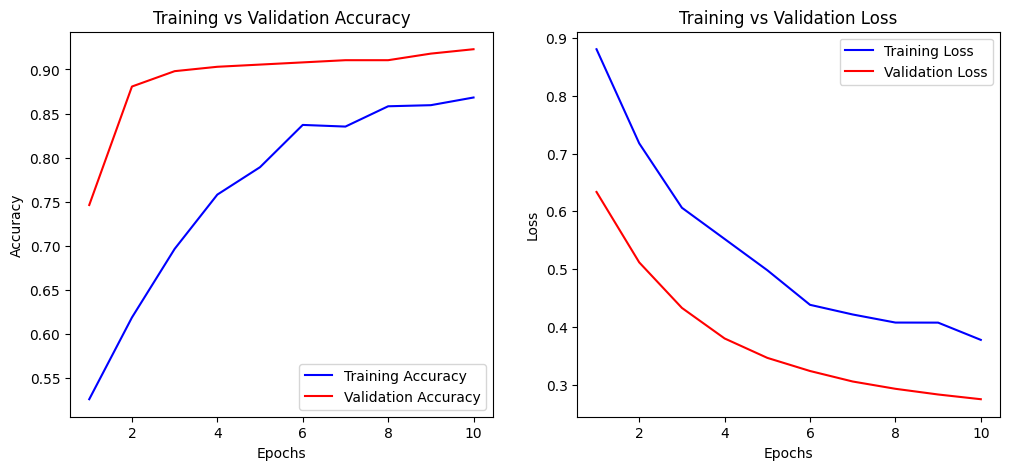

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 975ms/step


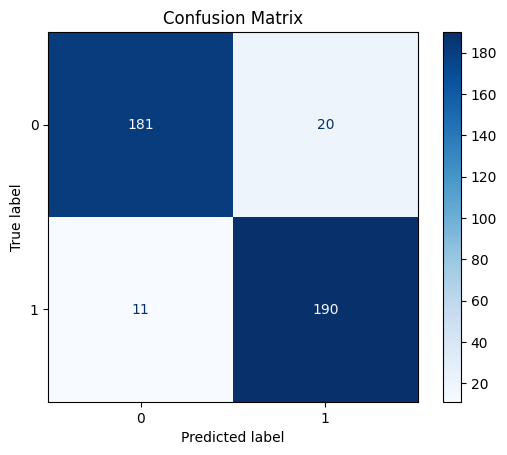

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np


y_pred_prob = model.predict({"input_ids": X_test_ids, "attention_mask": X_test_mask})
y_pred = (y_pred_prob > 0.5).astype(int)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 447ms/step


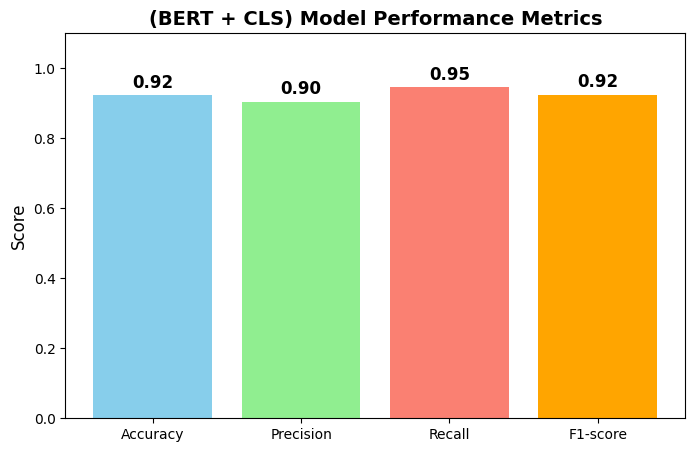

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
y_pred_prob = model.predict({"input_ids": X_test_ids, "attention_mask": X_test_mask})
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Plotting
scores = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")

plt.ylim(0,1.1)
plt.title("(BERT + CLS) Model Performance Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


# **BERT + LSTM**

In [ ]:
from transformers import BertTokenizer
import tensorflow as tf

max_len = 256
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

X_encodings = tokenizer(
    list(X_cleaned),
    truncation=True,
    padding=True,
    max_length=max_len,
    return_tensors='tf'
)

input_ids_model2 = np.array(X_encodings['input_ids'])
attention_mask_model2 = np.array(X_encodings['attention_mask'])
y_cleaned = np.array(y_cleaned)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

input_ids = np.array(input_ids_model2)
attention_mask = np.array(attention_mask_model2)
y_cleaned = np.array(y_cleaned)


train_idx, test_idx = train_test_split(
    np.arange(len(y_cleaned)), test_size=0.2, stratify=y_cleaned, random_state=42
)

X_train_ids = input_ids[train_idx]
X_train_mask = attention_mask[train_idx]
y_train = y_cleaned[train_idx]

X_test_ids = input_ids[test_idx]
X_test_mask = attention_mask[test_idx]
y_test = y_cleaned[test_idx]




In [ ]:

import numpy as np
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

MAX_LEN = 256
BATCH_SIZE = 8
EPOCHS = 10
EMBED_BATCH = 16
LR = 2e-5


print("[INFO] Loading BERT model...")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertModel.from_pretrained("bert-base-uncased", from_pt=True)

# Freeze all BERT encoder layers
for layer in bert_model.bert.encoder.layer:
    layer.trainable = False


print("[INFO] Tokenizing data...")
X_encodings = tokenizer(
    list(X_cleaned),
    truncation=True,
    padding="max_length",
    max_length=MAX_LEN,
    return_tensors="tf"
)

input_ids = X_encodings["input_ids"]
attention_mask = X_encodings["attention_mask"]
y_array = np.array(y_cleaned)


print("[INFO] Precomputing BERT embeddings...")
all_embeddings = []
num_samples = input_ids.shape[0]

for i in range(0, num_samples, EMBED_BATCH):
    batch_input_ids = input_ids[i:i+EMBED_BATCH]
    batch_attention_mask = attention_mask[i:i+EMBED_BATCH]

    with tf.GradientTape(watch_accessed_variables=False):  # disable gradient tracking
        bert_outputs = bert_model(batch_input_ids, attention_mask=batch_attention_mask, training=False)
        batch_embeddings = bert_outputs.last_hidden_state.numpy()  # (batch, MAX_LEN, 768)

    all_embeddings.append(batch_embeddings)

embeddings = np.vstack(all_embeddings)
print(f"[INFO] Final embeddings shape: {embeddings.shape}")

# ---------------------- CUSTOM TRAIN-TEST SPLIT ----------------------
print("[INFO] Performing custom train-test split...")
indices = np.arange(len(y_array))
train_idx, test_idx = train_test_split(
    indices, test_size=0.2, stratify=y_array, random_state=42
)

X_train = embeddings[train_idx]
X_test = embeddings[test_idx]
y_train = y_array[train_idx]
y_test = y_array[test_idx]


print("[INFO] Building LSTM model...")
inputs = Input(shape=(MAX_LEN, 768))

x = LSTM(64, return_sequences=True)(inputs)
x = GlobalMaxPooling1D()(x)
x = Dropout(0.6)(x)

x = Dense(64, activation="relu", kernel_regularizer=regularizers.l2(1e-3))(x)
x = Dropout(0.6)(x)

outputs = Dense(1, activation="sigmoid")(x)

model = Model(inputs, outputs)
model.compile(
    optimizer=Adam(learning_rate=LR),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

print("[INFO] Training started...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop],
    verbose=1
)

print("[INFO] Training completed successfully!")


[INFO] Loading BERT model...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

[INFO] Tokenizing data...
[INFO] Precomputing BERT embeddings...
[INFO] Final embeddings shape: (2008, 256, 768)
[INFO] Performing custom train-test split...
[INFO] Building LSTM model...
[INFO] Training started...
Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5053 - loss: 0.8591 - val_accuracy: 0.7015 - val_loss: 0.6656
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5754 - loss: 0.7542 - val_accuracy: 0.8756 - val_loss: 0.6010
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6441 - loss: 0.6891 - val_accuracy: 0.8806 - val_loss: 0.5494
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7066 - loss: 0.6411 - val_accuracy: 0.8756 - val_loss: 0.5085
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7378 - loss: 0.6011 - val_accuracy: 0.8756 - val_loss: 0.4728
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7734 - loss: 0.5661 - val_accuracy: 0.8756 - val_loss: 0.4450
Epoch 7/10


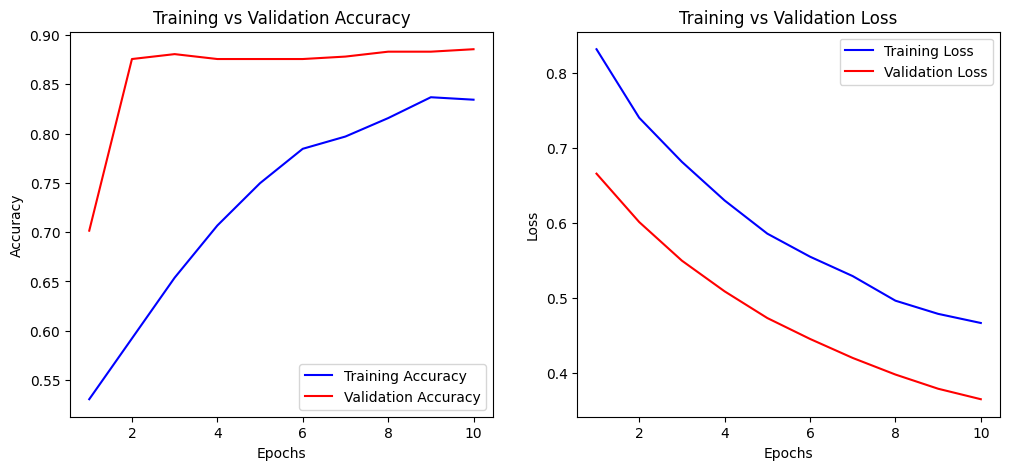

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


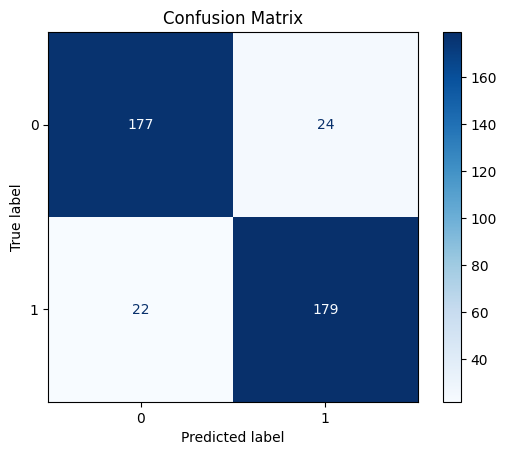

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use precomputed embeddings (X_test), not token IDs
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


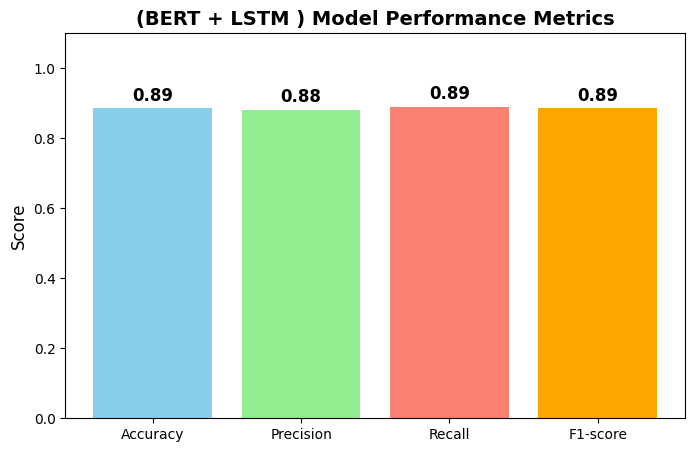

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Values & labels
scores = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

# Plot bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])

# Annotate bars with values
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")

plt.ylim(0,1.1)
plt.title("(BERT + LSTM ) Model Performance Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


# **BERT + BILSTM**

In [ ]:
from transformers import BertTokenizer
import tensorflow as tf

max_len = 256
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

X_encodings = tokenizer(
    list(X_cleaned),
    truncation=True,
    padding=True,
    max_length=max_len,
    return_tensors='tf'
)

input_ids_model3 = np.array(X_encodings['input_ids'])
attention_mask_model3 = np.array(X_encodings['attention_mask'])
y_cleaned = np.array(y_cleaned)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

input_ids = np.array(input_ids_model3)
attention_mask = np.array(attention_mask_model3)
y_cleaned = np.array(y_cleaned)


train_idx, test_idx = train_test_split(
    np.arange(len(y_cleaned)), test_size=0.2, stratify=y_cleaned, random_state=42
)

X_train_ids = input_ids[train_idx]
X_train_mask = attention_mask[train_idx]
y_train = y_cleaned[train_idx]

X_test_ids = input_ids[test_idx]
X_test_mask = attention_mask[test_idx]
y_test = y_cleaned[test_idx]




In [ ]:
import numpy as np
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, Bidirectional, Lambda, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


MAX_LEN = 256
BATCH_SIZE = 16
EPOCHS = 10
LR = 2e-5


tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
X_encodings = tokenizer(
    list(X_cleaned),
    truncation=True,
    padding="max_length",
    max_length=MAX_LEN,
    return_tensors="tf"
)

input_ids = np.array(X_encodings['input_ids'])
attention_mask = np.array(X_encodings['attention_mask'])
y_array = np.array(y_cleaned)


train_idx, test_idx = train_test_split(
    np.arange(len(y_array)), test_size=0.2, stratify=y_array, random_state=42
)

X_train_ids, X_test_ids = input_ids[train_idx], input_ids[test_idx]
X_train_mask, X_test_mask = attention_mask[train_idx], attention_mask[test_idx]
y_train, y_test = y_array[train_idx], y_array[test_idx]


bert_model = TFBertModel.from_pretrained('bert-base-uncased', from_pt=True)
for layer in bert_model.bert.encoder.layer[:12]:
    layer.trainable = False


input_ids_layer = Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_ids')
attention_mask_layer = Input(shape=(MAX_LEN,), dtype=tf.int32, name='attention_mask')

def bert_encoder(inputs):
    ids, mask = inputs
    outputs = bert_model(input_ids=ids, attention_mask=mask)
    return outputs.last_hidden_state

sequence_output = Lambda(bert_encoder, output_shape=(MAX_LEN, 768))([input_ids_layer, attention_mask_layer])

# BiLSTM with GlobalMaxPooling1D
bilstm = Bidirectional(LSTM(128, return_sequences=True))(sequence_output)
pooled = GlobalMaxPooling1D()(bilstm)
dropout = Dropout(0.6)(pooled)

# Dense layers
dense = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(dropout)
dropout2 = Dropout(0.6)(dense)
output = Dense(1, activation='sigmoid')(dropout2)

model = Model(inputs=[input_ids_layer, attention_mask_layer], outputs=output)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ---------------------- TRAINING ----------------------
early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history = model.fit(
    x={"input_ids": X_train_ids, "attention_mask": X_train_mask},
    y=y_train,
    validation_data=({"input_ids": X_test_ids, "attention_mask": X_test_mask}, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop],
    verbose=1
)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 256, 768)  │          0 │ input_ids[0][0],  │
│                     │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 256, 256)  │    918,528 │ lambda_1[0][0]    │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 256)       │          0 │ bidirectional_1[… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 256)       │          0 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 256)       │     65,792 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 256)       │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │        257 │ dropout_7[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 984,577 (3.76 MB)

 Trainable params: 984,577 (3.76 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 60s 461ms/step - accuracy: 0.5588 - loss: 0.7645 - val_accuracy: 0.8706 - val_loss: 0.5810
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 42s 416ms/step - accuracy: 0.6419 - loss: 0.6647 - val_accuracy: 0.8831 - val_loss: 0.4985
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 43s 422ms/step - accuracy: 0.7525 - loss: 0.5695 - val_accuracy: 0.8856 - val_loss: 0.4336
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 43s 422ms/step - accuracy: 0.7739 - loss: 0.5182 - val_accuracy: 0.8831 - val_loss: 0.3829
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 42s 420ms/step - accuracy: 0.8441 - loss: 0.4559 - val_accuracy: 0.8831 - val_loss: 0.3471
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 42s 419ms/step - accuracy: 0.8707 - loss: 0.3963 - val_accuracy: 0.8856 - val_loss: 0.3218
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 42s 418ms/step - accuracy: 0.8740 - loss: 0.3638 - val_accuracy: 0.8930 - val_loss: 0.3045
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 83s 429ms/step - accuracy: 0.8782 - loss: 0

26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 417ms/step
Confusion Matrix:
[[177  24]
 [ 14 187]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       201
           1       0.89      0.93      0.91       201

    accuracy                           0.91       402
   macro avg       0.91      0.91      0.91       402
weighted avg       0.91      0.91      0.91       402



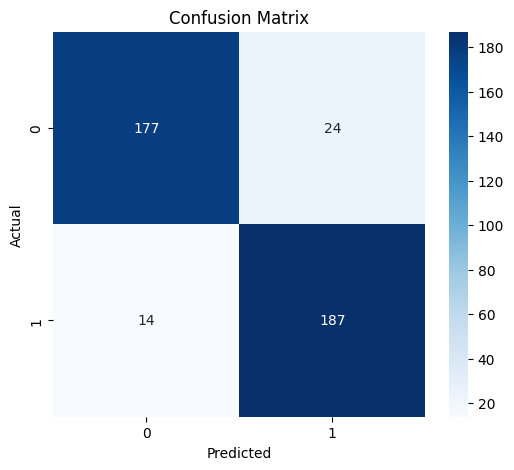

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


y_pred_prob = model.predict(
    {"input_ids": X_test_ids, "attention_mask": X_test_mask}, batch_size=BATCH_SIZE
)


y_pred = (y_pred_prob >= 0.5).astype(int)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ---------------------- PLOT CONFUSION MATRIX ----------------------
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 302ms/step


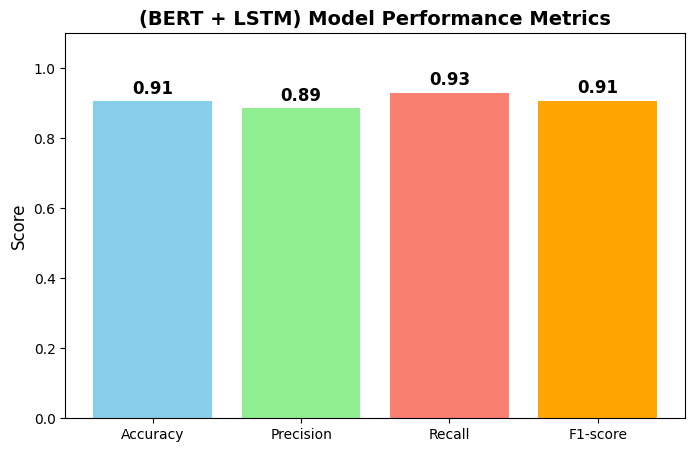

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Using dictionary
y_pred_prob = model.predict(
    {"input_ids": X_test_ids, "attention_mask": X_test_mask},
    batch_size=BATCH_SIZE
)

# Convert probabilities to 0/1
y_pred = (y_pred_prob > 0.5).astype(int)

# Now calculate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Plot bar chart
import matplotlib.pyplot as plt

scores = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])

for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")

plt.ylim(0,1.1)
plt.title("(BERT + BILSTM) Model Performance Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


# **BERT + GRU**

In [ ]:
from transformers import BertTokenizer
import tensorflow as tf

max_len = 256
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

X_encodings = tokenizer(
    list(X_cleaned),
    truncation=True,
    padding=True,
    max_length=max_len,
    return_tensors='tf'
)

input_ids_model4 = np.array(X_encodings['input_ids'])
attention_mask_model4 = np.array(X_encodings['attention_mask'])
y_cleaned = np.array(y_cleaned)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from transformers import TFBertModel
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda, GRU
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

BATCH_SIZE=16

input_ids = np.array(input_ids_model4)
attention_mask = np.array(attention_mask_model4)
y_cleaned = np.array(y_cleaned)

train_idx, test_idx = train_test_split(
    np.arange(len(y_cleaned)), test_size=0.2, stratify=y_cleaned, random_state=42
)

X_train_ids, X_test_ids = input_ids[train_idx], input_ids[test_idx]
X_train_mask, X_test_mask = attention_mask[train_idx], attention_mask[test_idx]
y_train, y_test = y_cleaned[train_idx], y_cleaned[test_idx]

bert_model = TFBertModel.from_pretrained("bert-base-uncased", from_pt=True)
for layer in bert_model.layers[0].encoder.layer[:8]:
    layer.trainable = False

input_ids_layer = Input(shape=(256,), dtype=tf.int32, name="input_ids")
attention_mask_layer = Input(shape=(256,), dtype=tf.int32, name="attention_mask")

def bert_encoder(inputs):
    ids, mask = inputs
    outputs = bert_model(input_ids=ids, attention_mask=mask)
    return outputs.last_hidden_state

sequence_output = Lambda(bert_encoder, output_shape=(256, 768))([input_ids_layer, attention_mask_layer])

gru = GRU(128)(sequence_output)
dropout = Dropout(0.5)(gru)
dense = Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4))(dropout)
dropout2 = Dropout(0.5)(dense)
output = Dense(1, activation="sigmoid")(dropout2)

model = Model(inputs=[input_ids_layer, attention_mask_layer], outputs=output)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model.summary()
early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history = model.fit(
    x={"input_ids": X_train_ids, "attention_mask": X_train_mask},
    y=y_train,
    validation_data=({"input_ids": X_test_ids, "attention_mask": X_test_mask}, y_test),
    epochs=10,
    batch_size=16,
    callbacks=[early_stop],
)


TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Al

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 256, 768)  │          0 │ input_ids[0][0],  │
│                     │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru (GRU)           │ (None, 128)       │    344,832 │ lambda[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ gru[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     16,512 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        129 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 361,473 (1.38 MB)

 Trainable params: 361,473 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2401s 24s/step - accuracy: 0.5600 - loss: 0.7143 - val_accuracy: 0.7644 - val_loss: 0.6117
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2292s 23s/step - accuracy: 0.6573 - loss: 0.6359 - val_accuracy: 0.8120 - val_loss: 0.5550
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2406s 24s/step - accuracy: 0.7671 - loss: 0.5623 - val_accuracy: 0.8271 - val_loss: 0.5073
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2334s 23s/step - accuracy: 0.7991 - loss: 0.5105 - val_accuracy: 0.8421 - val_loss: 0.4659
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2298s 23s/step - accuracy: 0.8267 - loss: 0.4663 - val_accuracy: 0.8371 - val_loss: 0.4300
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2303s 23s/step - accuracy: 0.8489 - loss: 0.4242 - val_accuracy: 0.8371 - val_loss: 0.4005
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2371s 23s/step - accuracy: 0.8797 - loss: 0.3818 - val_accuracy: 0.8471 - val_loss: 0.3760
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2397s 24s/step - accuracy: 0.8771 - loss: 0

25/25 ━━━━━━━━━━━━━━━━━━━━ 476s 19s/step
Confusion Matrix:
[[162  37]
 [ 16 184]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       199
           1       0.83      0.92      0.87       200

    accuracy                           0.87       399
   macro avg       0.87      0.87      0.87       399
weighted avg       0.87      0.87      0.87       399



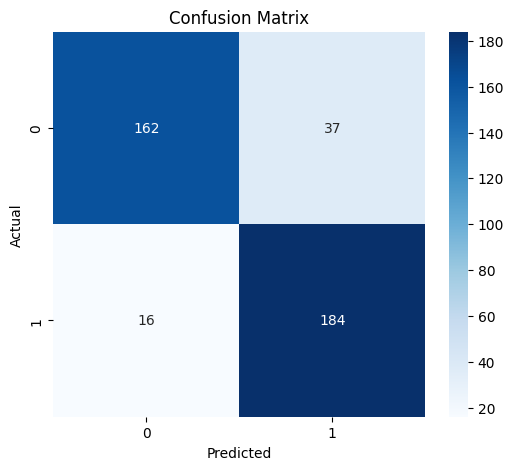

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


y_pred_prob = model.predict(
    {"input_ids": X_test_ids, "attention_mask": X_test_mask}, batch_size=BATCH_SIZE
)


y_pred = (y_pred_prob >= 0.5).astype(int)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ---------------------- PLOT CONFUSION MATRIX ----------------------
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


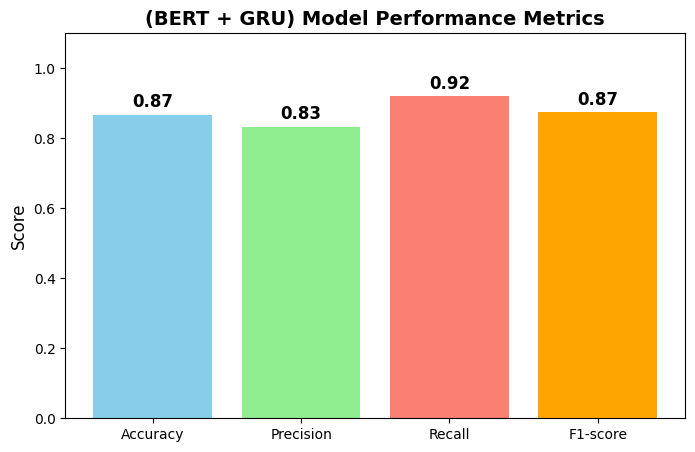

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


import matplotlib.pyplot as plt

scores = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])

for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")

plt.ylim(0,1.1)
plt.title("(BERT + GRU) Model Performance Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


# **BERT + BIGRU**

In [ ]:
from transformers import BertTokenizer
import tensorflow as tf

max_len = 256
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

X_encodings = tokenizer(
    list(X_cleaned),
    truncation=True,
    padding=True,
    max_length=max_len,
    return_tensors='tf'
)

input_ids_model5 = np.array(X_encodings['input_ids'])
attention_mask_model5 = np.array(X_encodings['attention_mask'])
y_cleaned = np.array(y_cleaned)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from transformers import TFBertModel
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda, GRU, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping


BATCH_SIZE=16
input_ids = np.array(input_ids_model5)
attention_mask = np.array(attention_mask_model5)
y_cleaned = np.array(y_cleaned)

train_idx, test_idx = train_test_split(
    np.arange(len(y_cleaned)), test_size=0.2, stratify=y_cleaned, random_state=42
)

X_train_ids, X_test_ids = input_ids[train_idx], input_ids[test_idx]
X_train_mask, X_test_mask = attention_mask[train_idx], attention_mask[test_idx]
y_train, y_test = y_cleaned[train_idx], y_cleaned[test_idx]

bert_model = TFBertModel.from_pretrained("bert-base-uncased", from_pt=True)
for layer in bert_model.layers[0].encoder.layer[:8]:
    layer.trainable = False

input_ids_layer = Input(shape=(256,), dtype=tf.int32, name="input_ids")
attention_mask_layer = Input(shape=(256,), dtype=tf.int32, name="attention_mask")

def bert_encoder(inputs):
    ids, mask = inputs
    outputs = bert_model(input_ids=ids, attention_mask=mask)
    return outputs.last_hidden_state

sequence_output = Lambda(
    bert_encoder,
    output_shape=(256, 768)
)([input_ids_layer, attention_mask_layer])

bigru = Bidirectional(GRU(128))(sequence_output)
dropout = Dropout(0.5)(bigru)
dense = Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4))(dropout)
dropout2 = Dropout(0.5)(dense)
output = Dense(1, activation="sigmoid")(dropout2)

model = Model(inputs=[input_ids_layer, attention_mask_layer], outputs=output)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model.summary()
early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history = model.fit(
    x={"input_ids": X_train_ids, "attention_mask": X_train_mask},
    y=y_train,
    validation_data=({"input_ids": X_test_ids, "attention_mask": X_test_mask}, y_test),
    epochs=10,
    batch_size=16,
    callbacks=[early_stop],
)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_4 (Lambda)   │ (None, 256, 768)  │          0 │ input_ids[0][0],  │
│                     │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_3     │ (None, 256)       │    689,664 │ lambda_4[0][0]    │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 256)       │          0 │ bidirectional_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 128)       │     32,896 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 128)       │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │        129 │ dropout_7[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 722,689 (2.76 MB)

 Trainable params: 722,689 (2.76 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 54s 401ms/step - accuracy: 0.5193 - loss: 0.7550 - val_accuracy: 0.7935 - val_loss: 0.6023
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 38s 375ms/step - accuracy: 0.7056 - loss: 0.5934 - val_accuracy: 0.8806 - val_loss: 0.4922
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 39s 384ms/step - accuracy: 0.7934 - loss: 0.5023 - val_accuracy: 0.8731 - val_loss: 0.4102
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 39s 386ms/step - accuracy: 0.8466 - loss: 0.4332 - val_accuracy: 0.8781 - val_loss: 0.3558
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 39s 391ms/step - accuracy: 0.8731 - loss: 0.3653 - val_accuracy: 0.8831 - val_loss: 0.3225
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 40s 396ms/step - accuracy: 0.8862 - loss: 0.3509 - val_accuracy: 0.8881 - val_loss: 0.3009
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 40s 394ms/step - accuracy: 0.8974 - loss: 0.2978 - val_accuracy: 0.8881 - val_loss: 0.2849
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 40s 396ms/step - accuracy: 0.8891 - loss: 0

26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 409ms/step
Confusion Matrix:
[[179  22]
 [ 18 183]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       201
           1       0.89      0.91      0.90       201

    accuracy                           0.90       402
   macro avg       0.90      0.90      0.90       402
weighted avg       0.90      0.90      0.90       402



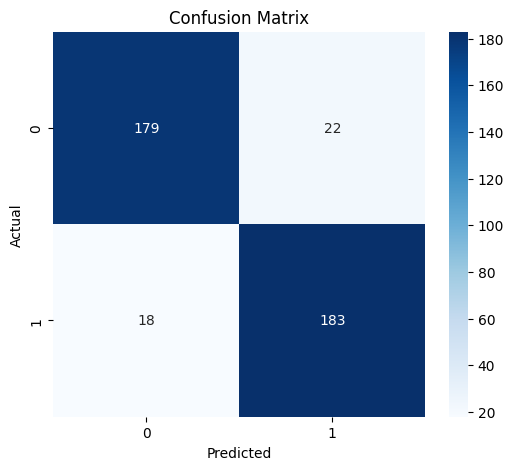

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


y_pred_prob = model.predict(
    {"input_ids": X_test_ids, "attention_mask": X_test_mask}, batch_size=BATCH_SIZE
)


y_pred = (y_pred_prob >= 0.5).astype(int)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ---------------------- PLOT CONFUSION MATRIX ----------------------
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


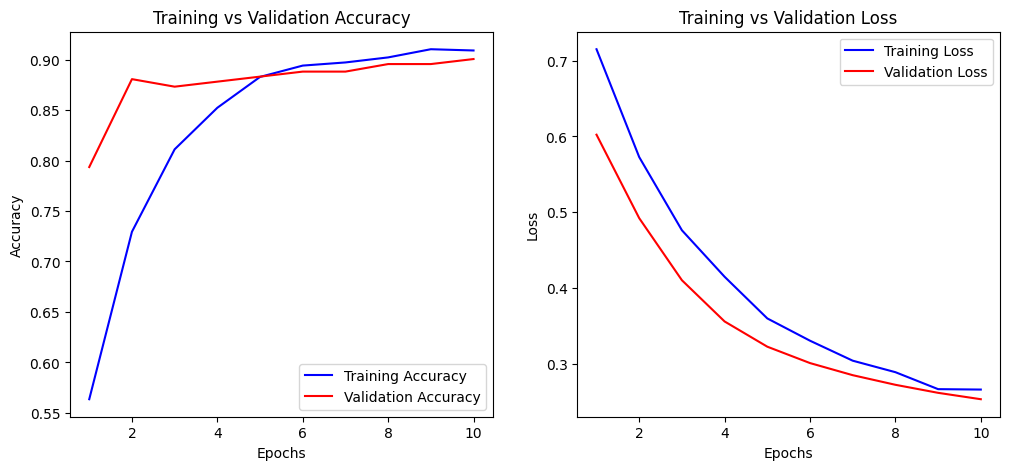

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 267ms/step


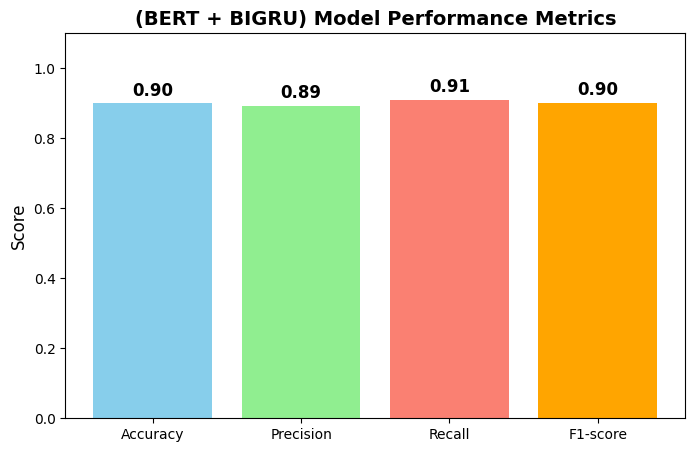

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


y_pred_prob = model.predict(
    {"input_ids": X_test_ids, "attention_mask": X_test_mask},
    batch_size=BATCH_SIZE
)
y_pred = (y_pred_prob > 0.5).astype(int)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


import matplotlib.pyplot as plt

scores = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])

for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")

plt.ylim(0,1.1)
plt.title("(BERT + BIGRU) Model Performance Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


# **LOGISTIC REGRESSION**

In [ ]:
from transformers import TFBertModel, BertTokenizer
import numpy as np
import tensorflow as tf

# 1. Load tokenizer and model
max_len = 256
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained("bert-base-uncased", from_pt=True)

# 2. Tokenize comments
X_encodings = tokenizer(
    list(X_cleaned),
    truncation=True,
    padding=True,
    max_length=max_len,
    return_tensors='tf'
)


batch_size = 32
cls_embeddings = []

for i in range(0, len(X_cleaned), batch_size):
    batch_input_ids = X_encodings['input_ids'][i:i+batch_size]
    batch_attention_mask = X_encodings['attention_mask'][i:i+batch_size]

    outputs = bert_model(batch_input_ids, attention_mask=batch_attention_mask)
    cls_batch = outputs.last_hidden_state[:, 0, :].numpy()  # Take [CLS] token
    cls_embeddings.append(cls_batch)

# Combine all batches
cls_embeddings = np.vstack(cls_embeddings)
y_cleaned = np.array(y_cleaned)

print("CLS embeddings shape:", cls_embeddings.shape)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

CLS embeddings shape: (2006, 768)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    cls_embeddings, y_cleaned, test_size=0.2, stratify=y_cleaned, random_state=42
)


clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))


Accuracy: 0.9104477611940298
Precision: 0.9024390243902439
Recall: 0.9203980099502488
F1: 0.9113300492610837


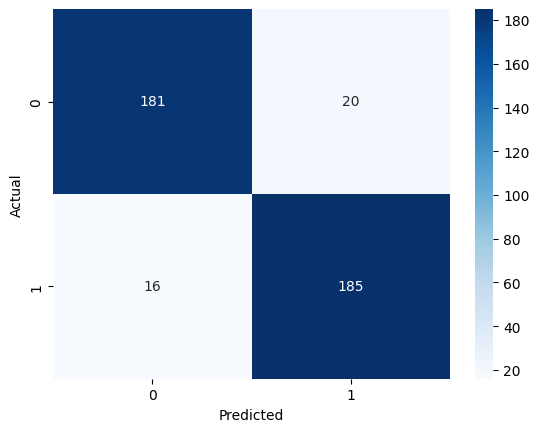

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from transformers import BertTokenizer, TFBertModel
import numpy as np


new_comment = "preparing kill jan transferring cash bitcoin use darknet hate pain plan bunch oxy probably fent press itll job friends family care theyre city doesnt change fact ill always alone single shadow former self good career means nothing end barely bring office anymore waiting get fired remove stress"

# 2. Tokenize
max_len = 256
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained("bert-base-uncased", from_pt=True)

encoding = tokenizer(
    new_comment,
    truncation=True,
    padding='max_length',
    max_length=max_len,
    return_tensors='tf'
)


outputs = bert_model(encoding['input_ids'], attention_mask=encoding['attention_mask'])
cls_embedding = outputs.last_hidden_state[:, 0, :].numpy()

# 4. Predict with your trained Logistic Regression model
prediction = clf.predict(cls_embedding)
prediction_proba = clf.predict_proba(cls_embedding)

print("Predicted label:", prediction[0])
print("Prediction probabilities:", prediction_proba[0])


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

Predicted label: 1
Prediction probabilities: [0.04944693 0.95055307]


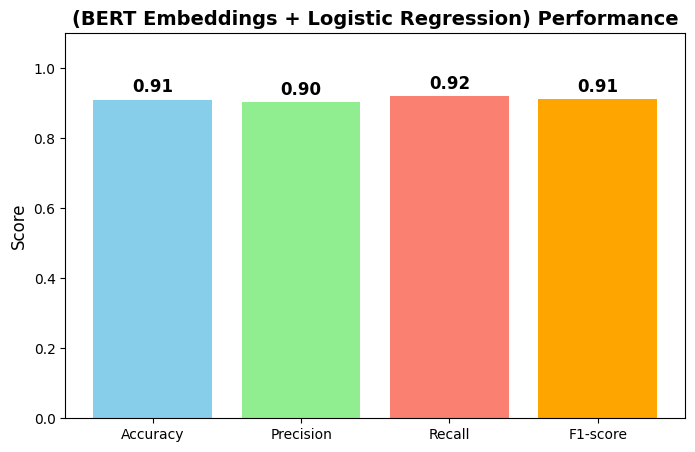

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


y_pred = clf.predict(X_test)


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


scores = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]


plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])


for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")

plt.ylim(0,1.1)
plt.title("(BERT Embeddings + Logistic Regression) Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


# **BERT + SVM**

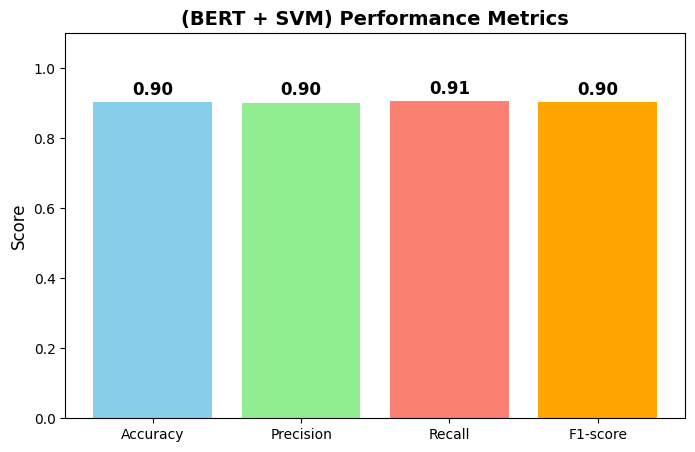

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(
    cls_embeddings, y_cleaned, test_size=0.2, stratify=y_cleaned, random_state=42
)


clf_svm = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
clf_svm.fit(X_train, y_train)


y_pred = clf_svm.predict(X_test)
y_pred_prob = clf_svm.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


scores = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])

for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")

plt.ylim(0,1.1)
plt.title("(BERT + SVM) Performance Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


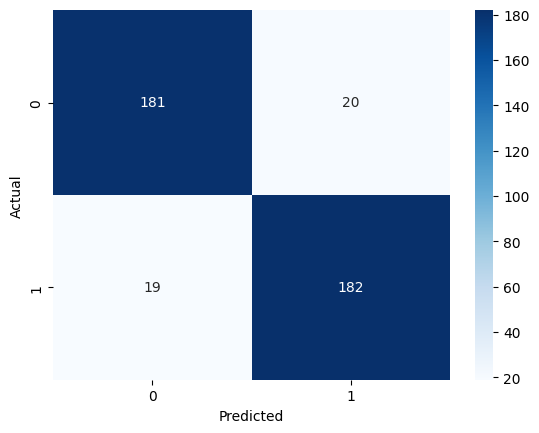

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **BERT + XGBOOST**

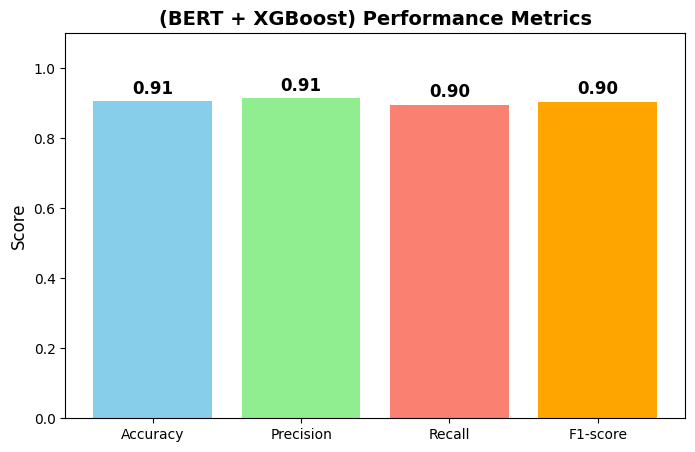

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(
    cls_embeddings, y_cleaned, test_size=0.2, stratify=y_cleaned, random_state=42
)


clf_xgb = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)


clf_xgb.fit(X_train, y_train)


y_pred = clf_xgb.predict(X_test)
y_pred_prob = clf_xgb.predict_proba(X_test)[:, 1]


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


scores = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])

for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")

plt.ylim(0,1.1)
plt.title("(BERT + XGBoost) Performance Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


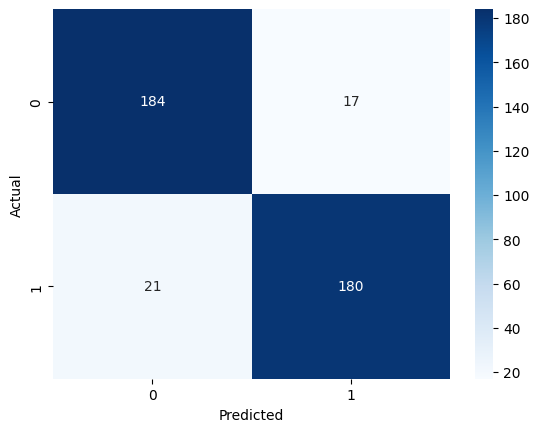

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **BERT + RANDOMFOREST**

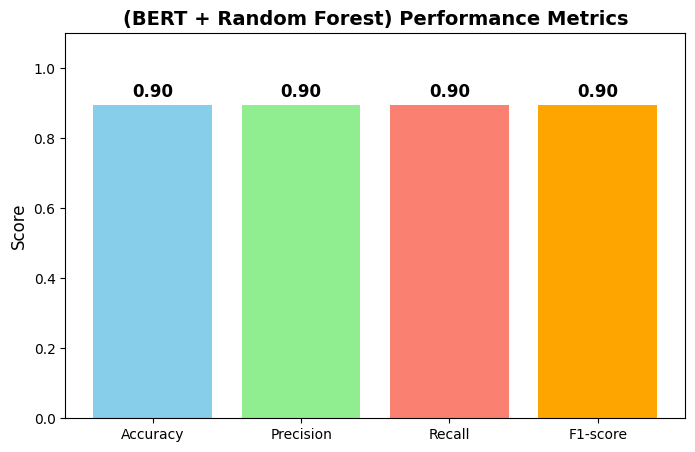

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(
    cls_embeddings, y_cleaned, test_size=0.2, stratify=y_cleaned, random_state=42
)


clf_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)


clf_rf.fit(X_train, y_train)


y_pred = clf_rf.predict(X_test)
y_pred_prob = clf_rf.predict_proba(X_test)[:, 1]


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


scores = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])

for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")

plt.ylim(0,1.1)
plt.title("(BERT + Random Forest) Performance Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


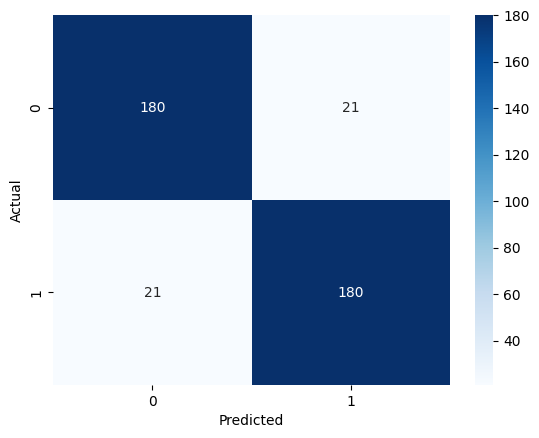

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## **Gradient Boosting using LightGBM — it’s fast, handles high-dimensional embeddings well, and often gives better performance than Random Forest or Logistic Regression.**

# **BERT + LIGHTGBM**

[LightGBM] [Info] Number of positive: 803, number of negative: 801
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 1604, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500623 -> initscore=0.002494
[LightGBM] [Info] Start training from score 0.002494
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

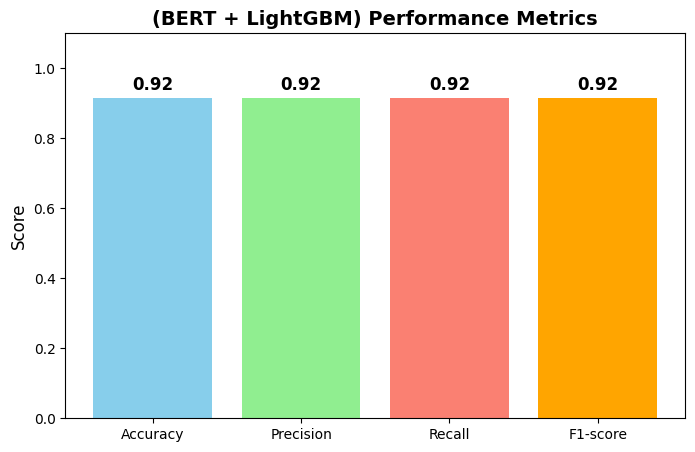

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(
    cls_embeddings, y_cleaned, test_size=0.2, stratify=y_cleaned, random_state=42
)


clf_lgb = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)


clf_lgb.fit(X_train, y_train)


y_pred = clf_lgb.predict(X_test)
y_pred_prob = clf_lgb.predict_proba(X_test)[:, 1]


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


scores = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])

for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")

plt.ylim(0,1.1)
plt.title("(BERT + LightGBM) Performance Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


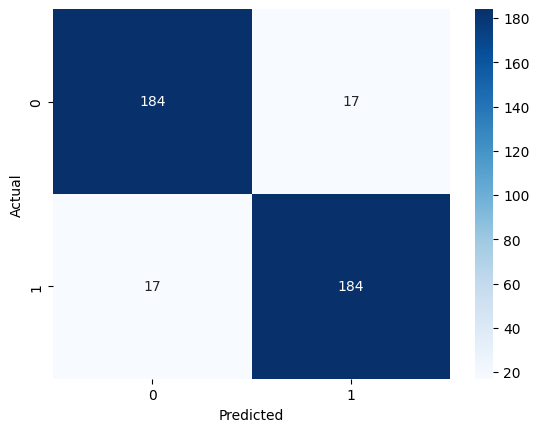

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import transformers
import sentence_transformers

print(transformers.__version__)
print(sentence_transformers.__version__)


4.57.0
5.1.1


# ***SBERT + LSTM***





In [ ]:

from sentence_transformers import SentenceTransformer
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split


MAX_LEN = 256
BATCH_SIZE = 16
EPOCHS = 20
LR = 1e-3

print("[INFO] Loading SBERT model...")
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

print("[INFO] Encoding sentences...")
embeddings = sbert_model.encode(
    list(X_cleaned),
    batch_size=BATCH_SIZE,
    show_progress_bar=True
)

# embeddings shape: (num_samples, 384 for MiniLM)
print(f"[INFO] Embeddings shape: {embeddings.shape}")


# SBERT embeddings are already fixed-length, so no LSTM timesteps required
# But we can keep LSTM if needed; reshape for (timesteps=1, features=384)
X = embeddings.reshape((embeddings.shape[0], 1, embeddings.shape[1]))
y = np.array(y_cleaned)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


inputs = Input(shape=(X.shape[1], X.shape[2]))  # (timesteps=1, features=384)

x = LSTM(32, return_sequences=False, kernel_regularizer=regularizers.l2(1e-4))(inputs)
x = Dropout(0.6)(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)
x = Dropout(0.6)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.compile(
    optimizer=Adam(learning_rate=LR),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

print("[INFO] Training started...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop],
    verbose=1
)


loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"[INFO] Test Accuracy: {acc:.4f}")


[INFO] Loading SBERT model...
[INFO] Encoding sentences...


Batches:   0%|          | 0/126 [00:00<?, ?it/s]

[INFO] Embeddings shape: (2006, 384)
[INFO] Training started...
Epoch 1/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6583 - loss: 0.6782 - val_accuracy: 0.8557 - val_loss: 0.4352
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9164 - loss: 0.3215 - val_accuracy: 0.8806 - val_loss: 0.3169
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9129 - loss: 0.2424 - val_accuracy: 0.8930 - val_loss: 0.2969
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9281 - loss: 0.2144 - val_accuracy: 0.9005 - val_loss: 0.2868
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9434 - loss: 0.1891 - val_accuracy: 0.9080 - val_loss: 0.2769
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9439 - loss: 0.1877 - val_accuracy: 0.9154 - val_loss: 0.2711
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9315 - loss: 0.2010 - val_accuracy: 0.9104 - val_loss: 0.2685
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


<Figure size 600x600 with 0 Axes>

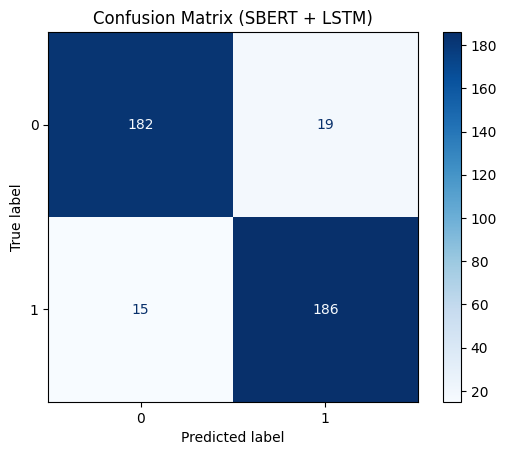

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np


y_pred_prob = model.predict(X_test, batch_size=BATCH_SIZE)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix (SBERT + LSTM)")
plt.show()


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 0.9154
Precision: 0.9073
Recall: 0.9254
F1-score: 0.9163


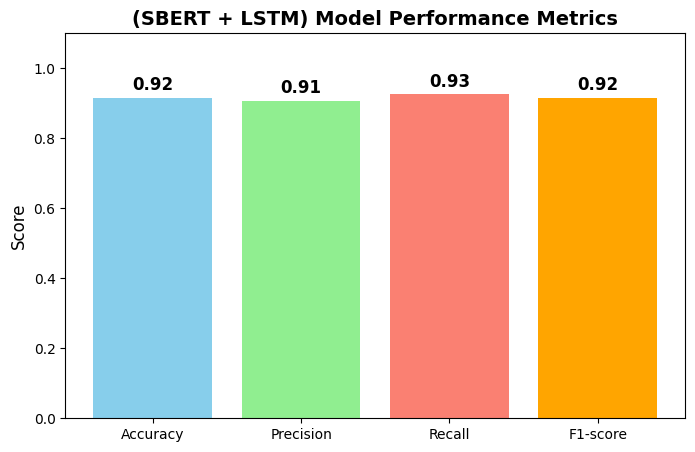

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np


y_pred_prob = model.predict(X_test, batch_size=BATCH_SIZE)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")


scores = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])

for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")

plt.ylim(0,1.1)
plt.title("(SBERT + LSTM) Model Performance Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


# **SBERT + BILSTM**

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split


MAX_LEN = 256
BATCH_SIZE = 16
EPOCHS = 20
LR = 1e-3


print("[INFO] Loading SBERT model...")
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

print("[INFO] Encoding sentences...")
embeddings = sbert_model.encode(
    list(X_cleaned),
    batch_size=BATCH_SIZE,
    show_progress_bar=True
)

print(f"[INFO] Embeddings shape: {embeddings.shape}")

# Reshape for BiLSTM: (num_samples, timesteps=1, features=384)
X = embeddings.reshape((embeddings.shape[0], 1, embeddings.shape[1]))
y = np.array(y_cleaned)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


inputs = Input(shape=(X.shape[1], X.shape[2]))  # (timesteps=1, features=384)

x = Bidirectional(LSTM(64, return_sequences=False, kernel_regularizer=regularizers.l2(1e-4)))(inputs)
x = Dropout(0.6)(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)
x = Dropout(0.6)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.compile(
    optimizer=Adam(learning_rate=LR),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)


print("[INFO] Training started...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop],
    verbose=1
)

# ------------------------- EVALUATION -------------------------
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"[INFO] Test Accuracy: {acc:.4f}")


[INFO] Loading SBERT model...
[INFO] Encoding sentences...


Batches:   0%|          | 0/126 [00:00<?, ?it/s]

[INFO] Embeddings shape: (2010, 384)
[INFO] Training started...
Epoch 1/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.7407 - loss: 0.6825 - val_accuracy: 0.8980 - val_loss: 0.3328
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9093 - loss: 0.2834 - val_accuracy: 0.9055 - val_loss: 0.2917
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9220 - loss: 0.2492 - val_accuracy: 0.8980 - val_loss: 0.2852
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9286 - loss: 0.2226 - val_accuracy: 0.9080 - val_loss: 0.2857
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9444 - loss: 0.1938 - val_accuracy: 0.9055 - val_loss: 0.2902
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9413 - loss: 0.2021 - val_accuracy: 0.9030 - val_loss: 0.2996
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9416 - loss: 0.1855 - val_accuracy: 0.9030 - val_loss: 0.3045
[INFO] Test Accuracy: 0.9080


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
Confusion Matrix:
[[179  22]
 [ 15 186]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       201
           1       0.89      0.93      0.91       201

    accuracy                           0.91       402
   macro avg       0.91      0.91      0.91       402
weighted avg       0.91      0.91      0.91       402



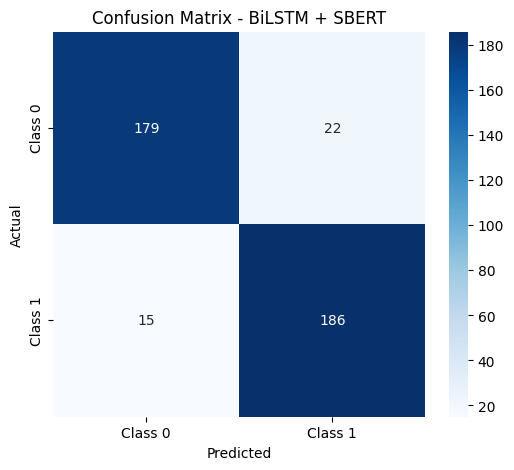

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


y_pred_prob = model.predict(X_test, batch_size=BATCH_SIZE)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ------------------------- VISUALIZATION -------------------------
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0','Class 1'], yticklabels=['Class 0','Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - BiLSTM + SBERT")
plt.show()


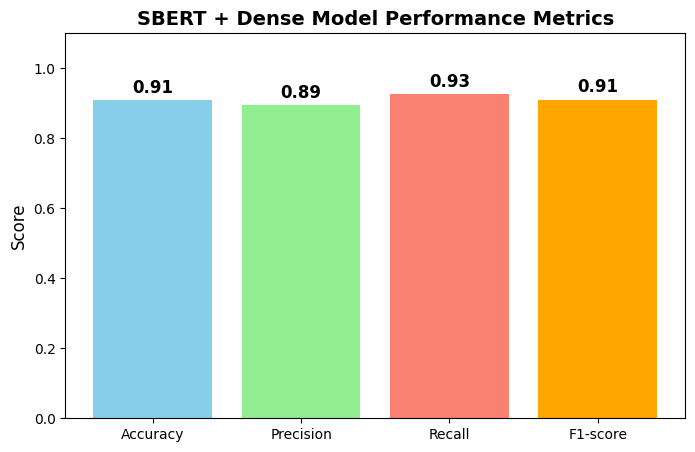

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("SBERT + BILSTM Model Performance Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()

# **SBERT + GRU**

[INFO] Loading SBERT model...
[INFO] Encoding sentences...


Batches:   0%|          | 0/126 [00:00<?, ?it/s]

[INFO] Embeddings shape: (2010, 384)
[INFO] Training started...
Epoch 1/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6849 - loss: 0.6665 - val_accuracy: 0.8930 - val_loss: 0.3358
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8925 - loss: 0.2873 - val_accuracy: 0.8905 - val_loss: 0.2795
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9137 - loss: 0.2531 - val_accuracy: 0.9005 - val_loss: 0.2716
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9211 - loss: 0.2376 - val_accuracy: 0.9080 - val_loss: 0.2745
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9261 - loss: 0.2021 - val_accuracy: 0.8881 - val_loss: 0.2852
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9347 - loss: 0.2028 - val_accuracy: 0.9055 - val_loss: 0.2790
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9387 - loss: 0.1901 - val_accuracy: 0.9080 - val_loss: 0.2844
[INFO] Test Accuracy: 0.9080
26/26 ━━

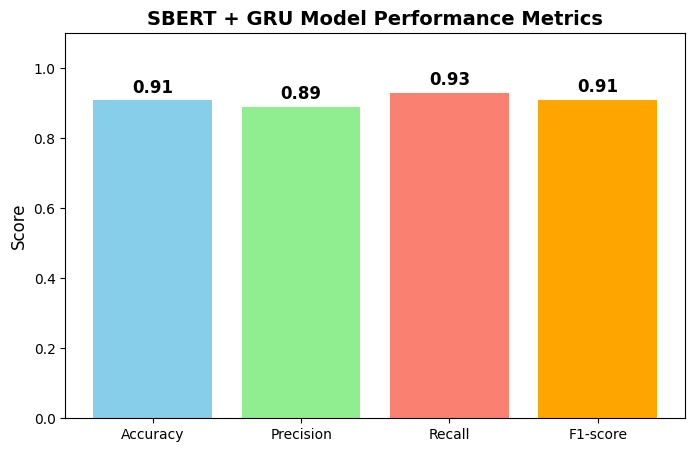

In [ ]:

from sentence_transformers import SentenceTransformer
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt


BATCH_SIZE = 16
EPOCHS = 20
LR = 1e-3


print("[INFO] Loading SBERT model...")
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

print("[INFO] Encoding sentences...")
embeddings = sbert_model.encode(
    list(X_cleaned),
    batch_size=BATCH_SIZE,
    show_progress_bar=True
)

print(f"[INFO] Embeddings shape: {embeddings.shape}")  # (num_samples, 384)

# Reshape for GRU: (num_samples, timesteps=1, features=384)
X = embeddings.reshape((embeddings.shape[0], 1, embeddings.shape[1]))
y = np.array(y_cleaned)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


inputs = Input(shape=(X.shape[1], X.shape[2]))  # (timesteps=1, features=384)

x = GRU(64, return_sequences=False, kernel_regularizer=regularizers.l2(1e-4))(inputs)
x = Dropout(0.6)(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)
x = Dropout(0.6)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.compile(
    optimizer=Adam(learning_rate=LR),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)


print("[INFO] Training started...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop],
    verbose=1
)


loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"[INFO] Test Accuracy: {acc:.4f}")

# ------------------------- CONFUSION MATRIX -------------------------
y_pred_prob = model.predict(X_test, batch_size=BATCH_SIZE)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ------------------------- PLOT METRICS -------------------------
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("SBERT + GRU Model Performance Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


# **SBERT + BIGRU**

[INFO] Loading SBERT model...
[INFO] Encoding sentences...


Batches:   0%|          | 0/126 [00:00<?, ?it/s]

[INFO] Embeddings shape: (2010, 384)
[INFO] Training started...
Epoch 1/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7213 - loss: 0.6606 - val_accuracy: 0.8980 - val_loss: 0.3122
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9242 - loss: 0.2611 - val_accuracy: 0.9080 - val_loss: 0.2861
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9349 - loss: 0.2248 - val_accuracy: 0.8856 - val_loss: 0.2882
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9349 - loss: 0.2057 - val_accuracy: 0.9030 - val_loss: 0.2934
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9329 - loss: 0.2086 - val_accuracy: 0.8781 - val_loss: 0.3117
[INFO] Test Accuracy: 0.9080
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step

Confusion Matrix:
[[179  22]
 [ 15 186]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       201
           1       0.89      0.93      0.91       

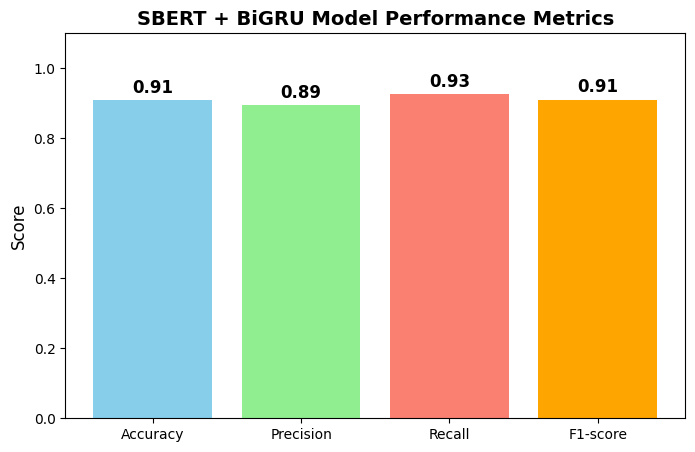

In [ ]:

from sentence_transformers import SentenceTransformer
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


BATCH_SIZE = 16
EPOCHS = 20
LR = 1e-3


print("[INFO] Loading SBERT model...")
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

print("[INFO] Encoding sentences...")
embeddings = sbert_model.encode(
    list(X_cleaned),
    batch_size=BATCH_SIZE,
    show_progress_bar=True
)

print(f"[INFO] Embeddings shape: {embeddings.shape}")  # (num_samples, 384)

# Reshape for GRU: (num_samples, timesteps=1, features=384)
X = embeddings.reshape((embeddings.shape[0], 1, embeddings.shape[1]))
y = np.array(y_cleaned)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


inputs = Input(shape=(X.shape[1], X.shape[2]))  # (timesteps=1, features=384)

x = Bidirectional(GRU(64, return_sequences=False, kernel_regularizer=regularizers.l2(1e-4)))(inputs)
x = Dropout(0.6)(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4))(x)
x = Dropout(0.6)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.compile(
    optimizer=Adam(learning_rate=LR),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)


print("[INFO] Training started...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop],
    verbose=1
)


loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"[INFO] Test Accuracy: {acc:.4f}")


y_pred_prob = model.predict(X_test, batch_size=BATCH_SIZE)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



# ------------------------- PLOT METRICS -------------------------
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("SBERT + BiGRU Model Performance Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


| Feature                    | BERT                                       | SBERT                                                           |
| -------------------------- | ------------------------------------------ | --------------------------------------------------------------- |
| Outputs                    | Token embeddings                           | Fixed-size sentence embeddings                                  |
| Use Case                   | Classification, QA, NER, token-level tasks | Semantic similarity, retrieval, clustering                      |
| Speed for similarity tasks | Slow (O(n²))                               | Fast (O(n))                                                     |
| Training                   | Pretrained                                 | Fine-tuned with Siamese/Triplet network for sentence similarity |


| Feature       | BERT                                                      | SBERT                                                                  |
| ------------- | --------------------------------------------------------- | ---------------------------------------------------------------------- |
| Output        | Token-level embeddings (contextual)                       | Sentence-level embeddings (fixed-length)                               |
| Optimized For | General NLP tasks                                         | Sentence similarity & semantic search                                  |
| Speed         | Slower for similarity tasks (compute pairwise embeddings) | Fast for similarity tasks (precomputed embeddings)                     |
| Use Case      | Classification, NER, QA, MLM                              | Semantic search, clustering, paraphrase detection, sentence similarity |
| Example       | “I love pizza” → embeddings for each word                 | “I love pizza” → single 384-d vector                                   |


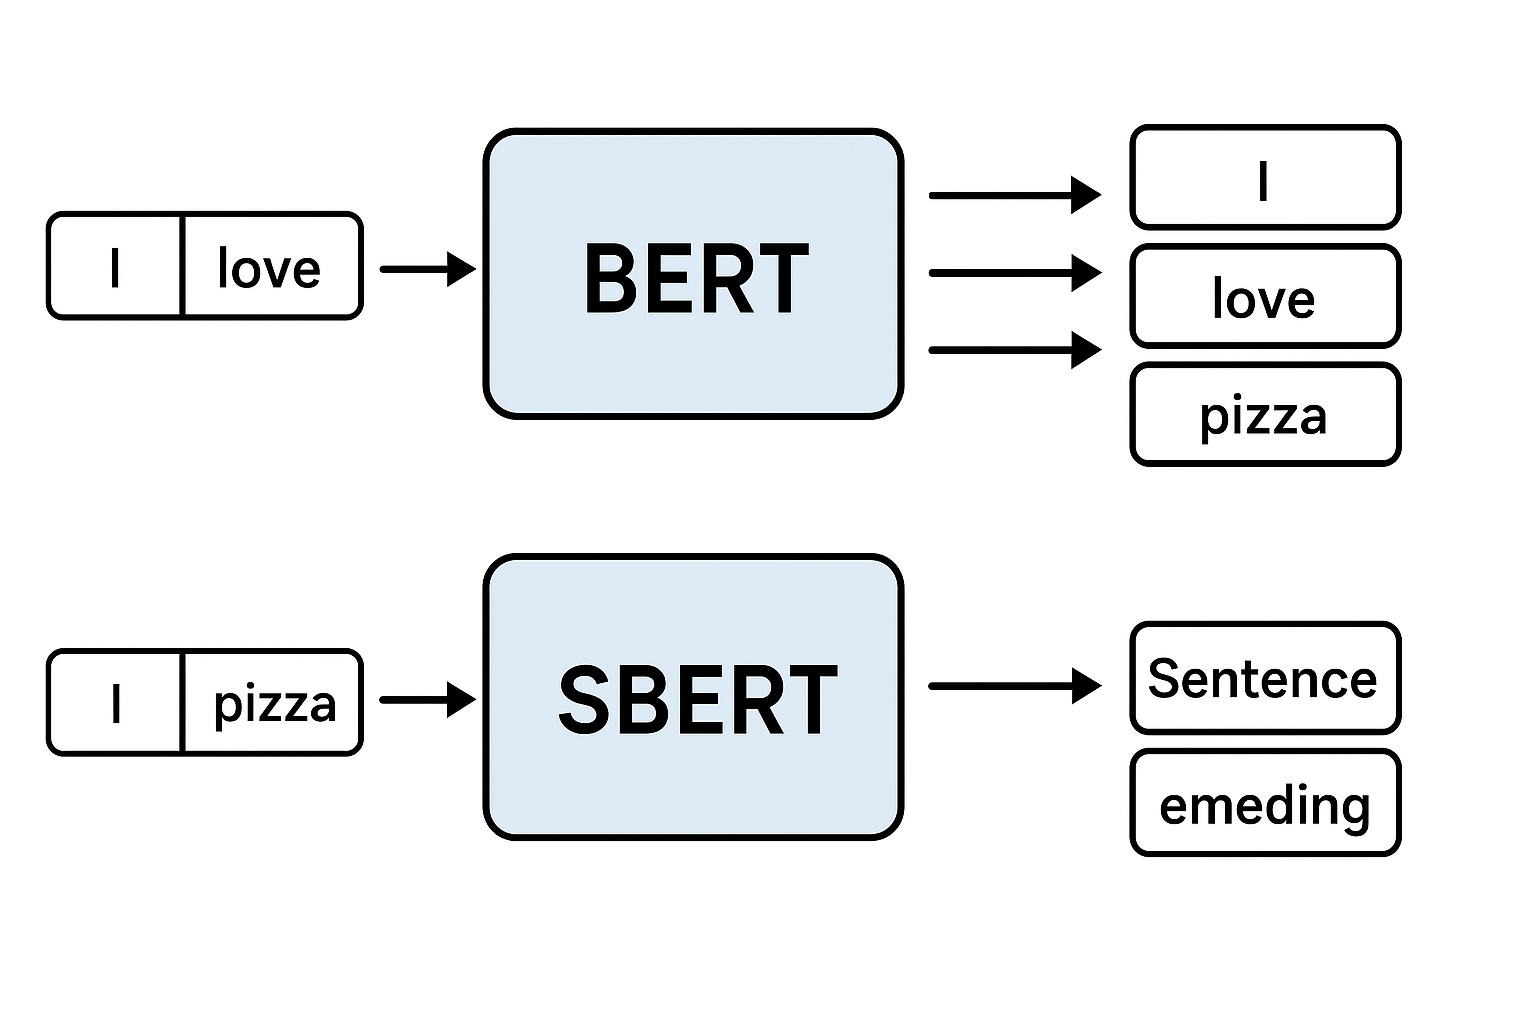

BERT → Good if you want to understand or classify sentences, e.g., sentiment, QA.

SBERT → Good if you want to measure similarity between sentences or search for similar sentences

# **SBERT + LOGISTIC REGRESSION**

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np

print("[INFO] Loading SBERT model...")
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

print("[INFO] Encoding sentences...")
embeddings = sbert_model.encode(
    list(X_cleaned),
    batch_size=16,
    show_progress_bar=True
)

print(f"[INFO] Embeddings shape: {embeddings.shape}")  # (num_samples, 384)
X = embeddings  # no need to reshape for Logistic Regression
y = np.array(y_cleaned)


[INFO] Loading SBERT model...
[INFO] Encoding sentences...


Batches:   0%|          | 0/126 [00:00<?, ?it/s]

[INFO] Embeddings shape: (2010, 384)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("[INFO] Training Logistic Regression...")
clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, y_train)


[INFO] Training Logistic Regression...


LogisticRegression(max_iter=2000)

Accuracy: 0.8905
Precision: 0.8905
Recall: 0.8905
F1-score: 0.8905

Confusion Matrix:
[[179  22]
 [ 22 179]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       201
           1       0.89      0.89      0.89       201

    accuracy                           0.89       402
   macro avg       0.89      0.89      0.89       402
weighted avg       0.89      0.89      0.89       402



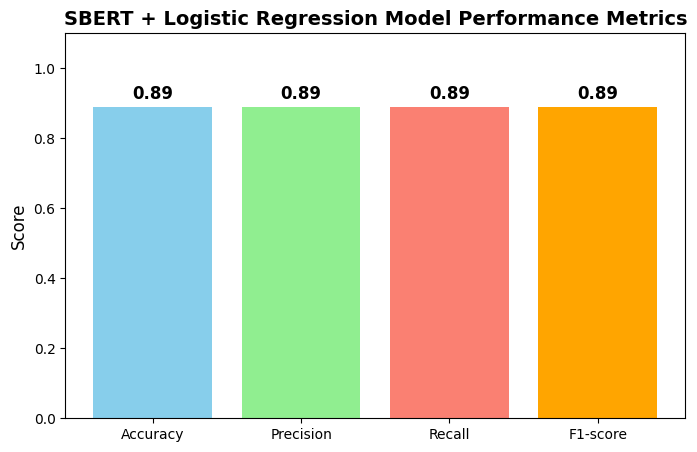

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred = clf.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc_score:.4f}")
print(f"Precision: {prec_score:.4f}")
print(f"Recall: {rec_score:.4f}")
print(f"F1-score: {f1:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("SBERT + Logistic Regression Model Performance Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


# **SBERT + XGBOOST**

[INFO] Loading SBERT model...
[INFO] Encoding sentences...


Batches:   0%|          | 0/126 [00:00<?, ?it/s]

[INFO] Embeddings shape: (2010, 384)
[INFO] Training XGBoost classifier...
Accuracy: 0.9005
Precision: 0.8966
Recall: 0.9055
F1-score: 0.9010

Confusion Matrix:
[[180  21]
 [ 19 182]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       201
           1       0.90      0.91      0.90       201

    accuracy                           0.90       402
   macro avg       0.90      0.90      0.90       402
weighted avg       0.90      0.90      0.90       402



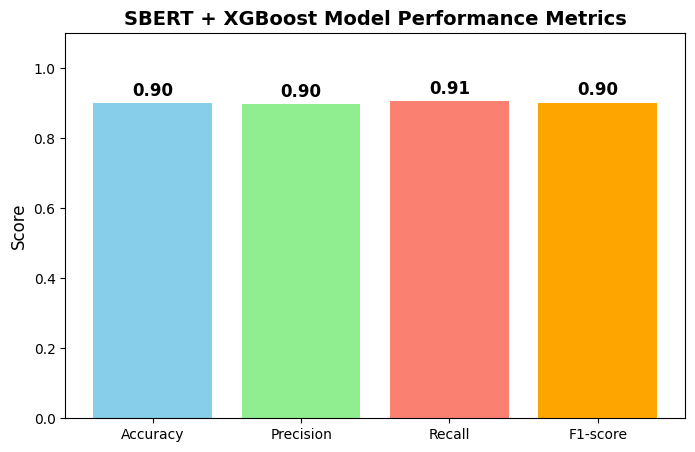

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import xgboost as xgb


print("[INFO] Loading SBERT model...")
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

print("[INFO] Encoding sentences...")
embeddings = sbert_model.encode(
    list(X_cleaned),
    batch_size=16,
    show_progress_bar=True
)

print(f"[INFO] Embeddings shape: {embeddings.shape}")  # (num_samples, 384)
X = embeddings  # shape: (num_samples, 384)
y = np.array(y_cleaned)

# ------------------------- 2. Split dataset -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


print("[INFO] Training XGBoost classifier...")
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc_score:.4f}")
print(f"Precision: {prec_score:.4f}")
print(f"Recall: {rec_score:.4f}")
print(f"F1-score: {f1:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



# ------------------------- 5. Bar plot visualization -------------------------
scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("SBERT + XGBoost Model Performance Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


# **SBERT + RANDOMFOREST**

[INFO] Loading SBERT model...
[INFO] Encoding sentences...


Batches:   0%|          | 0/126 [00:00<?, ?it/s]

[INFO] Embeddings shape: (2010, 384)
[INFO] Training Random Forest classifier...
Accuracy: 0.8881
Precision: 0.8939
Recall: 0.8806
F1-score: 0.8872

Confusion Matrix:
[[180  21]
 [ 24 177]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       201
           1       0.89      0.88      0.89       201

    accuracy                           0.89       402
   macro avg       0.89      0.89      0.89       402
weighted avg       0.89      0.89      0.89       402



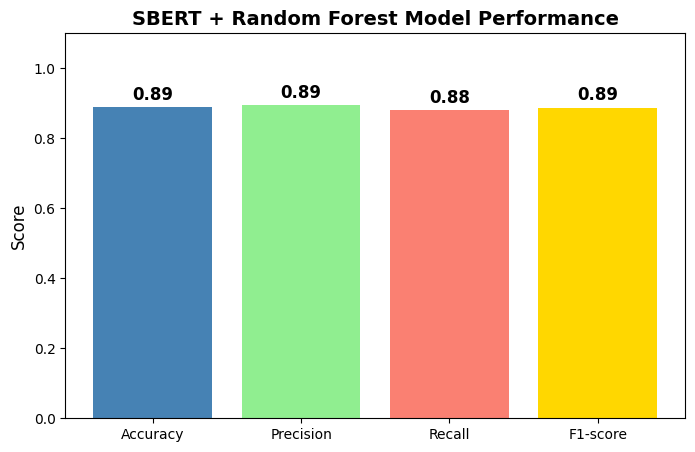

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


print("[INFO] Loading SBERT model...")
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

print("[INFO] Encoding sentences...")
embeddings = sbert_model.encode(
    list(X_cleaned),
    batch_size=16,
    show_progress_bar=True
)

print(f"[INFO] Embeddings shape: {embeddings.shape}")  # (num_samples, 384)
X = embeddings
y = np.array(y_cleaned)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


print("[INFO] Training Random Forest classifier...")
rf_model = RandomForestClassifier(
    n_estimators=300,       # number of trees
    max_depth=20,           # limit depth to avoid overfitting
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc_score:.4f}")
print(f"Precision: {prec_score:.4f}")
print(f"Recall: {rec_score:.4f}")
print(f"F1-score: {f1:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['steelblue','lightgreen','salmon','gold'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("SBERT + Random Forest Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


# **SBERT + LightGBM**

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import lightgbm as lgb


print("[INFO] Loading SBERT model...")
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')

print("[INFO] Encoding sentences...")
embeddings = sbert_model.encode(
    list(X_cleaned),
    batch_size=16,
    show_progress_bar=True
)

print(f"[INFO] Embeddings shape: {embeddings.shape}")  # (num_samples, 384)
X = embeddings
y = np.array(y_cleaned)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


print("[INFO] Training LightGBM classifier...")
lgb_model = lgb.LGBMClassifier(
    n_estimators=500,        # number of boosting rounds
    learning_rate=0.05,      # shrinkage rate
    max_depth=-1,            # unlimited depth
    num_leaves=64,           # controls complexity
    min_child_samples=30,
    subsample=0.8,           # row sampling
    colsample_bytree=0.8,    # feature sampling
    random_state=42,
    n_jobs=-1
)

lgb_model.fit(X_train, y_train)




[INFO] Loading SBERT model...
[INFO] Encoding sentences...


Batches:   0%|          | 0/126 [00:00<?, ?it/s]

[INFO] Embeddings shape: (2010, 384)
[INFO] Training LightGBM classifier...
[LightGBM] [Info] Number of positive: 805, number of negative: 803
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010705 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 1608, number of used features: 384
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500622 -> initscore=0.002488
[LightGBM] [Info] Start training from score 0.002488
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, min_child_samples=30,
               n_estimators=500, n_jobs=-1, num_leaves=64, random_state=42,
               subsample=0.8)

Accuracy: 0.9179
Precision: 0.9038
Recall: 0.9353
F1-score: 0.9193

Confusion Matrix:
[[181  20]
 [ 13 188]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       201
           1       0.90      0.94      0.92       201

    accuracy                           0.92       402
   macro avg       0.92      0.92      0.92       402
weighted avg       0.92      0.92      0.92       402



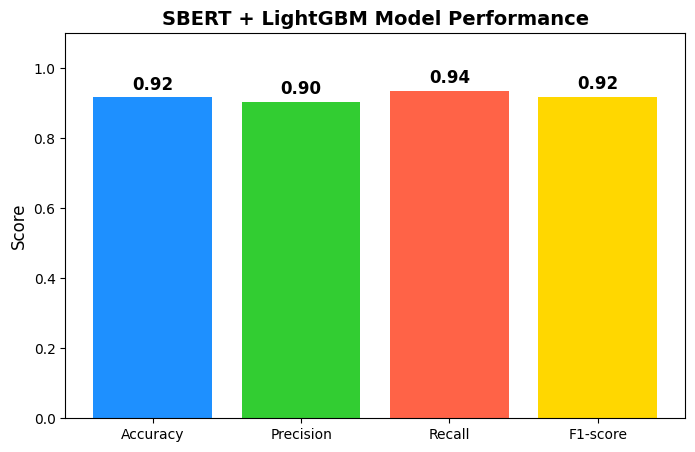

In [ ]:
y_pred = lgb_model.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc_score:.4f}")
print(f"Precision: {prec_score:.4f}")
print(f"Recall: {rec_score:.4f}")
print(f"F1-score: {f1:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['dodgerblue','limegreen','tomato','gold'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("SBERT + LightGBM Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


**DISTILBERT**

**1.Distilled Model 🔥**

DistilBERT is a compressed version of BERT, created using knowledge distillation.

It keeps ~97% of BERT’s performance while being much smaller and faster.

**2.Size Reduction 📉**

DistilBERT has 66 million parameters, about 40% fewer than BERT-base (110M).

**3.Speed & Memory ⚡**

Runs about 60% faster than BERT-base.

Requires less GPU/CPU memory, making it suitable for real-time or resource-constrained environments.

**4.Architecture 🏗️**

DistilBERT has 6 Transformer layers (BERT-base has 12).

Hidden size = 768, attention heads = 12.

**5.Outputs 🔄**

Like BERT, it produces token embeddings and a [CLS] embedding for sentence-level tasks.

**6.Pre-training 📚**

Trained on the same corpus as BERT (BooksCorpus + English Wikipedia).

Objective: Masked Language Modeling (MLM) + Distillation loss from BERT.

**7.No Next Sentence Prediction (NSP) 🚫**

DistilBERT skips the NSP task used in BERT pretraining, but still performs well on downstream tasks.

**8.General Purpose 🛠️**

Can be fine-tuned for text classification, sentiment analysis, NER, question answering, sarcasm detection, etc.

**9.Embeddings Dimension 📏**

CLS embeddings = 768-dimensional (same as BERT-base).

SBERT, by contrast, often reduces embeddings (e.g., 384-dim in all-MiniLM-L6-v2).

**10.Trade-off ⚖️**

Pros: Faster, lighter, still powerful.

Cons: Slightly less accurate than BERT/SBERT for some semantic tasks unless fine-tuned.

## **performance is weaker than SBERT**

| Feature                     | **DistilBERT**                                                                | **SBERT (Sentence-BERT)**                                                                  |
| --------------------------- | ----------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------ |
| **Origin**                  | Distilled version of **BERT-base**                                            | Based on **BERT/DistilBERT/MiniLM**, fine-tuned for sentence embeddings                    |
| **Architecture**            | 6 transformer layers (half of BERT-base)                                      | Same as underlying BERT/DistilBERT but modified pooling                                    |
| **Embedding Dimension**     | 768 (CLS token)                                                               | Usually 384 (MiniLM) or 768 (BERT-based models)                                            |
| **Training Objective**      | Masked Language Modeling (MLM) + Distillation loss                            | Sentence similarity (Natural Language Inference, Semantic Textual Similarity)              |
| **Sentence Representation** | Uses **[CLS] token embedding**                                                | Uses **mean pooling / CLS pooling** optimized for semantic similarity                      |
| **Best Use Case**           | Token-level tasks, fine-tuning for classification, NER, QA                    | Sentence-level tasks: semantic similarity, clustering, classification                      |
| **Performance**             | Fast, lighter, but raw embeddings are not optimized for sentence meaning      | Out-of-the-box embeddings capture sentence semantics much better                           |
| **Fine-tuning**             | Needs fine-tuning for sentence-level classification (e.g., sarcasm detection) | Works well even without fine-tuning, but can be fine-tuned further                         |
| **Speed**                   | ~60% faster than BERT                                                         | Slightly slower than DistilBERT (depending on variant), but embeddings are more meaningful |
| **Use in ML Pipelines**     | Extract CLS → use with ML model (needs tuning)                                | Direct embeddings → plug into ML models (works great)                                      |


DistilBERT:
Sentence = “I failed my exam, amazing!”
→ CLS vector = general-purpose representation (not guaranteed to capture sarcasm).

SBERT:
Same sentence → embedding is optimized to capture meaning and tone relative to other sentences → better for classification like “self-sarcasm vs not”.

# **DISTILBERT + LSTM**

DistilBERT just as an embedding extractor (frozen) and then train a separate LSTM model on those embeddings.


| Aspect           | Frozen             | Fine-tuned                      |
| ---------------- | ------------------ | ------------------------------- |
| Model weights    | Fixed, not updated | Updated during training         |
| Training speed   | Faster             | Slower                          |
| GPU/memory usage | Lower              | Higher                          |
| Overfitting risk | Lower              | Higher (if small dataset)       |
| Accuracy         | Good baseline      | Can be better if data is enough |


**Small dataset** → use frozen embeddings + LSTM

**Large dataset** → fine-tune DistilBERT + LSTM for best performance

“Hey, don’t just use BERT’s embeddings — also update all of its 66+ million parameters during training!”

**⚙️ What actually happens:**
**✅ Pros (Advantages):**

Learns task-specific meaning
→ The model adapts the embeddings to your dataset (great if you have a large, high-quality dataset).

**Can achieve higher accuracy**
→ Especially on text tasks where domain language is unique (e.g., sarcasm, resumes, tweets).

❌ Cons (Risks): **bold text**

Very heavy computation
→ Training becomes 10× slower (BERT layers are huge).

**Needs a lot of memory (GPU/TPU)**
→ If running on Colab CPU or single GPU, it may crash or run extremely slow.

**Overfitting**
→ If you have limited data (say <20k samples), the model will memorize your data rather than generalize.

**Unstable training**
→ Fine-tuning all transformer layers often needs a very low learning rate (1e-5 or 2e-5). Otherwise, gradients explode.



distilbert.trainable = True


| Setting                              | Description                | Suitable When         | Speed       | Overfitting Risk |
| ------------------------------------ | -------------------------- | --------------------- | ----------- | ---------------- |
| `trainable = False`                  | Use frozen BERT embeddings | Small dataset (<5k)   | ⚡ Fast      | 🔹 Low           |
| `trainable = True`                   | Train all BERT layers      | Large dataset (>50k)  | 🐢 Slow     | 🔴 High          |
| ✅ Partial unfreeze (last 1–2 layers) | Fine-tune top layers only  | Medium dataset (~10k) | ⚖️ Balanced | 🟡 Moderate      |


In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertModel
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split


MAX_LEN = 256
BATCH_SIZE = 16
EPOCHS = 10
LR = 1e-4

print("[INFO] Loading DistilBERT...")
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
distilbert = TFDistilBertModel.from_pretrained("distilbert-base-uncased", from_pt=True)

# Freeze BERT layers
distilbert.trainable = False


encodings = tokenizer(
    list(X_cleaned),
    truncation=True,
    padding=True,
    max_length=MAX_LEN,
    return_tensors="tf"
)

input_ids = encodings["input_ids"]
attention_mask = encodings["attention_mask"]
y = np.array(y_cleaned)


input_ids_np = input_ids.numpy()
attention_mask_np = attention_mask.numpy()


X_train_ids, X_test_ids, X_train_mask, X_test_mask, y_train, y_test = train_test_split(
    input_ids_np, attention_mask_np, y, test_size=0.2, random_state=42
)


class DistilBertEmbeddingLayer(tf.keras.layers.Layer):
    def __init__(self, distilbert_model, **kwargs):
        super().__init__(**kwargs)
        self.distilbert = distilbert_model

    def call(self, inputs):
        input_ids, attention_mask = inputs
        outputs = self.distilbert(input_ids, attention_mask=attention_mask)
        return outputs.last_hidden_state  # (batch, seq_len, 768)


input_ids_layer = Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_ids")
attention_mask_layer = Input(shape=(MAX_LEN,), dtype=tf.int32, name="attention_mask")

bert_embeddings = DistilBertEmbeddingLayer(distilbert)([input_ids_layer, attention_mask_layer])

x = LSTM(64, return_sequences=False, kernel_regularizer=regularizers.l2(1e-4))(bert_embeddings)
x = Dropout(0.6)(x)
x = Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4))(x)
x = Dropout(0.6)(x)
outputs = Dense(1, activation="sigmoid")(x)

model = Model(inputs=[input_ids_layer, attention_mask_layer], outputs=outputs)


model.compile(
    optimizer=Adam(learning_rate=LR),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

early_stop = EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    restore_best_weights=True
)


print("[INFO] Training started...")
history = model.fit(
    [X_train_ids, X_train_mask], y_train,
    validation_data=([X_test_ids, X_test_mask], y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop],
    verbose=1
)

loss, acc = model.evaluate([X_test_ids, X_test_mask], y_test, verbose=0)
print(f"[INFO] Test Accuracy: {acc:.4f}")
model.summary()

[INFO] Loading DistilBERT...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


[INFO] Training started...
Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 28s 217ms/step - accuracy: 0.5704 - loss: 0.7154 - val_accuracy: 0.8731 - val_loss: 0.5131
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 193ms/step - accuracy: 0.8174 - loss: 0.5142 - val_accuracy: 0.9005 - val_loss: 0.3516
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - accuracy: 0.8914 - loss: 0.3659 - val_accuracy: 0.9204 - val_loss: 0.2793
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - accuracy: 0.9157 - loss: 0.3205 - val_accuracy: 0.9229 - val_loss: 0.2521
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 19s 192ms/step - accuracy: 0.9359 - loss: 0.2730 - val_accuracy: 0.9154 - val_loss: 0.2580
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 193ms/step - accuracy: 0.9383 - loss: 0.2595 - val_accuracy: 0.9229 - val_loss: 0.2338
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 19s 192ms/step - accuracy: 0.9382 - loss: 0.2430 - val_accuracy: 0.9229 - val_loss: 0.2419
[INFO] Test Accuracy: 0.9229


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ distil_bert_embedd… │ (None, 256, 768)  │          0 │ input_ids[0][0],  │
│ (DistilBertEmbeddi… │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 64)        │    213,248 │ distil_bert_embe… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │      8,320 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │        129 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 665,093 (2.54 MB)

 Trainable params: 221,697 (866.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 443,396 (1.69 MB)

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step

Confusion Matrix:
[[175  24]
 [  7 196]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       199
           1       0.89      0.97      0.93       203

    accuracy                           0.92       402
   macro avg       0.93      0.92      0.92       402
weighted avg       0.93      0.92      0.92       402



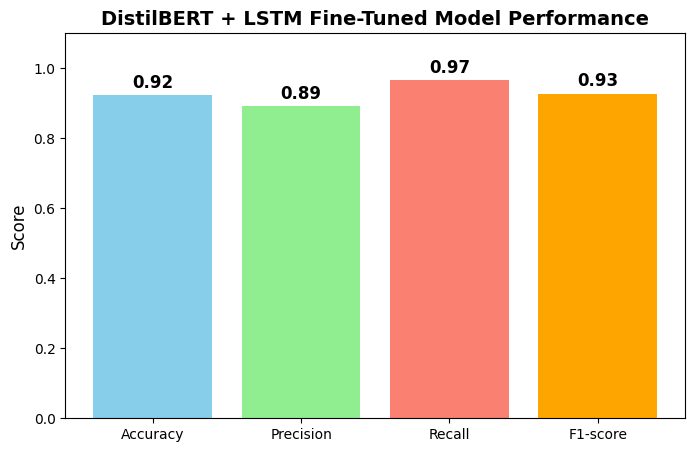

In [ ]:
y_pred_prob = model.predict([X_test_ids, X_test_mask], batch_size=BATCH_SIZE)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("DistilBERT + LSTM Fine-Tuned Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


# **DISTILBERT * + BILSTM**

In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertModel
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split

MAX_LEN = 256
BATCH_SIZE = 16
EPOCHS = 10
LR = 1e-4


print("[INFO] Loading DistilBERT...")
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
distilbert = TFDistilBertModel.from_pretrained("distilbert-base-uncased", from_pt=True)

# Freeze BERT for faster training
distilbert.trainable = False

# ---------------- TOKENIZE ----------------
encodings = tokenizer(
    list(X_cleaned),
    truncation=True,
    padding=True,
    max_length=MAX_LEN,
    return_tensors="tf"
)
input_ids = encodings["input_ids"]
attention_mask = encodings["attention_mask"]
y = np.array(y_cleaned)


input_ids_np = input_ids.numpy()
attention_mask_np = attention_mask.numpy()


X_train_ids, X_test_ids, X_train_mask, X_test_mask, y_train, y_test = train_test_split(
    input_ids_np, attention_mask_np, y, test_size=0.2, random_state=42
)


class DistilBertEmbeddingLayer(tf.keras.layers.Layer):
    def __init__(self, distilbert_model, **kwargs):
        super().__init__(**kwargs)
        self.distilbert = distilbert_model

    def call(self, inputs):
        input_ids, attention_mask = inputs
        outputs = self.distilbert(input_ids, attention_mask=attention_mask)
        return outputs.last_hidden_state  # (batch, seq_len, 768)

input_ids_layer = Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_ids")
attention_mask_layer = Input(shape=(MAX_LEN,), dtype=tf.int32, name="attention_mask")

bert_embeddings = DistilBertEmbeddingLayer(distilbert)(
    [input_ids_layer, attention_mask_layer]
)

x = Bidirectional(
    LSTM(64, return_sequences=False, kernel_regularizer=regularizers.l2(3e-5))
)(bert_embeddings)
x = Dropout(0.6)(x)
x = Dense(128, activation="relu", kernel_regularizer=regularizers.l2(3e-5))(x)
x = Dropout(0.6)(x)
outputs = Dense(1, activation="sigmoid")(x)

model = Model(inputs=[input_ids_layer, attention_mask_layer], outputs=outputs)

model.compile(
    optimizer=Adam(learning_rate=LR),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

early_stop = EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    restore_best_weights=True
)


print("[INFO] Training started...")
history = model.fit(
    [X_train_ids, X_train_mask], y_train,
    validation_data=([X_test_ids, X_test_mask], y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop],
    verbose=1
)


loss, acc = model.evaluate([X_test_ids, X_test_mask], y_test, verbose=0)
print(f"[INFO] Test Accuracy: {acc:.4f}")


y_pred_prob = model.predict([X_test_ids, X_test_mask], batch_size=BATCH_SIZE)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("DistilBERT + BiLSTM Fine-Tuned Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-40995983.py", line 1, in <cell line: 0>
    from transformers import DistilBertTokenizer, TFDistilBertModel
  File "<frozen importlib._bootstrap>", line 1412, in _handle_fromlist
  File "/usr/local/lib/python3.12/dist-packages/transformers/utils/import_utils.py", line 2317, in __getattr__
    module = self._get_module(self._class_to_module[name])
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/transformers/utils/import_utils.py", line 2345, in _get_module
    return importlib.import_module("." + module_name, self.__name__)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/importlib/__init__.py", line 90, in import_module
    return _bootstrap._gcd_import(name[leve

TypeError: object of type 'NoneType' has no len()

# **DISTILBERT + GRU**

| Feature              | LSTM                                | GRU                                 |
| -------------------- | ----------------------------------- | ----------------------------------- |
| **Architecture**     | Has 3 gates (input, forget, output) | Has 2 gates (reset, update)         |
| **Complexity**       | More parameters → slower            | Fewer parameters → faster           |
| **Memory handling**  | Good at long-term dependencies      | Efficient for short & medium text   |
| **Training speed**   | Slow                                | Faster convergence                  |
| **Overfitting risk** | Higher (more params)                | Lower (simpler structure)           |
| **Recommended for**  | Long sequences (paragraphs)         | Tweets, comments, sarcasm detection |


| Property             | GRU                      | LSTM                      |
| -------------------- | ------------------------ | ------------------------- |
| Works for prediction | ✅ Yes                    | ✅ Yes                     |
| Compatible with BERT | ✅ Yes                    | ✅ Yes                     |
| Speed                | ⚡ Faster                 | 🐢 Slower                 |
| Generalization       | 👍 Better for small data | ⚖️ Depends on data length |


In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertModel
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split


MAX_LEN = 256
BATCH_SIZE = 16
EPOCHS = 10
LR = 1e-4

print("[INFO] Loading DistilBERT...")
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
distilbert = TFDistilBertModel.from_pretrained("distilbert-base-uncased", from_pt=True)

# Freeze BERT layers for feature extraction
distilbert.trainable = False


encodings = tokenizer(
    list(X_cleaned),
    truncation=True,
    padding=True,
    max_length=MAX_LEN,
    return_tensors="tf"
)

input_ids = encodings["input_ids"]
attention_mask = encodings["attention_mask"]
y = np.array(y_cleaned)

input_ids_np = input_ids.numpy()
attention_mask_np = attention_mask.numpy()


X_train_ids, X_test_ids, X_train_mask, X_test_mask, y_train, y_test = train_test_split(
    input_ids_np, attention_mask_np, y, test_size=0.2, random_state=42
)


class DistilBertEmbeddingLayer(tf.keras.layers.Layer):
    def __init__(self, distilbert_model, **kwargs):
        super().__init__(**kwargs)
        self.distilbert = distilbert_model

    def call(self, inputs):
        input_ids, attention_mask = inputs
        outputs = self.distilbert(input_ids, attention_mask=attention_mask)
        return outputs.last_hidden_state  # (batch, seq_len, 768)


input_ids_layer = Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_ids")
attention_mask_layer = Input(shape=(MAX_LEN,), dtype=tf.int32, name="attention_mask")

bert_embeddings = DistilBertEmbeddingLayer(distilbert)([input_ids_layer, attention_mask_layer])


x = GRU(64, return_sequences=False, kernel_regularizer=regularizers.l2(1e-4))(bert_embeddings)
x = Dropout(0.6)(x)
x = Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4))(x)
x = Dropout(0.6)(x)
outputs = Dense(1, activation="sigmoid")(x)

model = Model(inputs=[input_ids_layer, attention_mask_layer], outputs=outputs)


model.compile(
    optimizer=Adam(learning_rate=LR),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


early_stop = EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)

print("[INFO] Training started...")
history = model.fit(
    [X_train_ids, X_train_mask], y_train,
    validation_data=([X_test_ids, X_test_mask], y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop],
    verbose=1
)

loss, acc = model.evaluate([X_test_ids, X_test_mask], y_test, verbose=0)
print(f"[INFO] Test Accuracy: {acc:.4f}")




[INFO] Loading DistilBERT...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ distil_bert_embedd… │ (None, 256, 768)  │          0 │ input_ids[0][0],  │
│ (DistilBertEmbeddi… │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_1 (GRU)         │ (None, 64)        │    160,128 │ distil_bert_embe… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 64)        │          0 │ gru_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 128)       │      8,320 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 128)       │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │        129 │ dropout_7[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 168,577 (658.50 KB)

 Trainable params: 168,577 (658.50 KB)

 Non-trainable params: 0 (0.00 B)

[INFO] Training started...
Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 42s 278ms/step - accuracy: 0.5741 - loss: 0.7254 - val_accuracy: 0.8756 - val_loss: 0.5656
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 24s 234ms/step - accuracy: 0.7608 - loss: 0.5741 - val_accuracy: 0.8781 - val_loss: 0.4142
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 22s 215ms/step - accuracy: 0.8682 - loss: 0.4080 - val_accuracy: 0.8756 - val_loss: 0.3258
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - accuracy: 0.8806 - loss: 0.3469 - val_accuracy: 0.9129 - val_loss: 0.2819
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 22s 215ms/step - accuracy: 0.9019 - loss: 0.2806 - val_accuracy: 0.9179 - val_loss: 0.2402
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 23s 227ms/step - accuracy: 0.9112 - loss: 0.2605 - val_accuracy: 0.9204 - val_loss: 0.2233
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 37s 190ms/step - accuracy: 0.9256 - loss: 0.2474 - val_accuracy: 0.9254 - val_loss: 0.2164
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 212ms/step -

26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 240ms/step

Confusion Matrix:
[[178  21]
 [  4 199]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       199
           1       0.90      0.98      0.94       203

    accuracy                           0.94       402
   macro avg       0.94      0.94      0.94       402
weighted avg       0.94      0.94      0.94       402



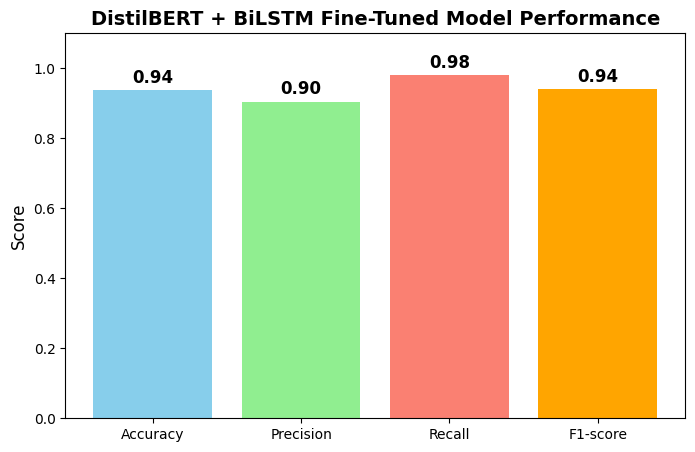

In [ ]:
y_pred_prob = model.predict([X_test_ids, X_test_mask], batch_size=BATCH_SIZE)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("DistilBERT + Gru Fine-Tuned Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


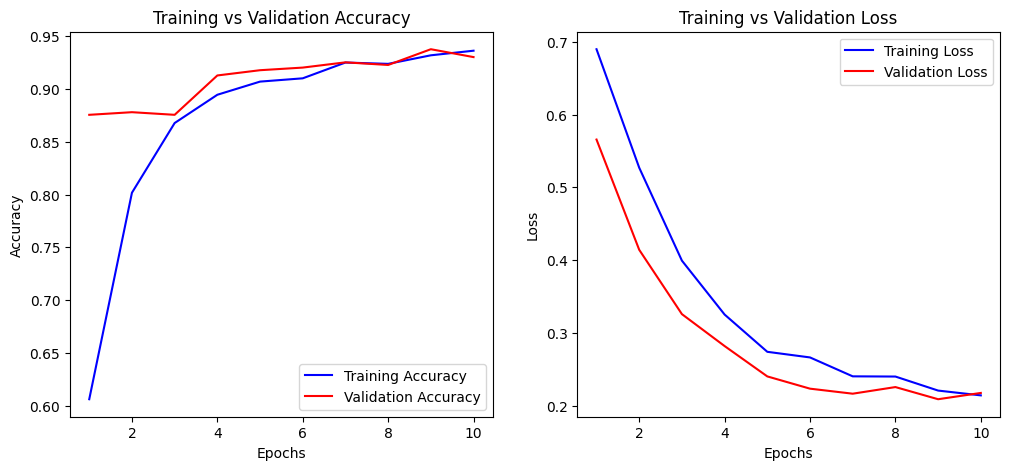

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# **DISTILBERT + BIGRU**

| Model     | Reads Text         | Captures Context | Speed              | Works Well for                                    |
| --------- | ------------------ | ---------------- | ------------------ | ------------------------------------------------- |
| GRU       | Forward only       | Limited          | ⚡ Fast             | Short, directional text                           |
| **BiGRU** | Forward + Backward | Richer context   | ⚙️ Slightly slower | Text classification, sentiment, sarcasm detection |


In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertModel
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Bidirectional


MAX_LEN = 256
BATCH_SIZE = 16
EPOCHS = 10
LR = 1e-4

print("[INFO] Loading DistilBERT...")
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
distilbert = TFDistilBertModel.from_pretrained("distilbert-base-uncased", from_pt=True)

# Freeze BERT layers for feature extraction
distilbert.trainable = False


encodings = tokenizer(
    list(X_cleaned),
    truncation=True,
    padding=True,
    max_length=MAX_LEN,
    return_tensors="tf"
)

input_ids = encodings["input_ids"]
attention_mask = encodings["attention_mask"]
y = np.array(y_cleaned)

input_ids_np = input_ids.numpy()
attention_mask_np = attention_mask.numpy()


X_train_ids, X_test_ids, X_train_mask, X_test_mask, y_train, y_test = train_test_split(
    input_ids_np, attention_mask_np, y, test_size=0.2, random_state=42
)


class DistilBertEmbeddingLayer(tf.keras.layers.Layer):
    def __init__(self, distilbert_model, **kwargs):
        super().__init__(**kwargs)
        self.distilbert = distilbert_model

    def call(self, inputs):
        input_ids, attention_mask = inputs
        outputs = self.distilbert(input_ids, attention_mask=attention_mask)
        return outputs.last_hidden_state  # (batch, seq_len, 768)


input_ids_layer = Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_ids")
attention_mask_layer = Input(shape=(MAX_LEN,), dtype=tf.int32, name="attention_mask")

bert_embeddings = DistilBertEmbeddingLayer(distilbert)([input_ids_layer, attention_mask_layer])


from tensorflow.keras.layers import Bidirectional


x = Bidirectional(
        GRU(64, return_sequences=False, kernel_regularizer=regularizers.l2(1e-4))
    )(bert_embeddings)

x = Dropout(0.6)(x)
x = Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4))(x)
x = Dropout(0.6)(x)
outputs = Dense(1, activation="sigmoid")(x)

model = Model(inputs=[input_ids_layer, attention_mask_layer], outputs=outputs)


model.compile(
    optimizer=Adam(learning_rate=LR),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


early_stop = EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)

print("[INFO] Training started...")
history = model.fit(
    [X_train_ids, X_train_mask], y_train,
    validation_data=([X_test_ids, X_test_mask], y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop],
    verbose=1
)

loss, acc = model.evaluate([X_test_ids, X_test_mask], y_test, verbose=0)
print(f"[INFO] Test Accuracy: {acc:.4f}")




[INFO] Loading DistilBERT...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ distil_bert_embedd… │ (None, 256, 768)  │          0 │ input_ids[0][0],  │
│ (DistilBertEmbeddi… │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 128)       │    320,256 │ distil_bert_embe… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 128)       │          0 │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 128)       │     16,512 │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 128)       │          0 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 1)         │        129 │ dropout_9[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 336,897 (1.29 MB)

 Trainable params: 336,897 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

[INFO] Training started...
Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 42s 256ms/step - accuracy: 0.6116 - loss: 0.7223 - val_accuracy: 0.8980 - val_loss: 0.4348
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 35s 199ms/step - accuracy: 0.8443 - loss: 0.4745 - val_accuracy: 0.9005 - val_loss: 0.3201
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 203ms/step - accuracy: 0.8909 - loss: 0.3560 - val_accuracy: 0.9204 - val_loss: 0.2841
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - accuracy: 0.9144 - loss: 0.3221 - val_accuracy: 0.9403 - val_loss: 0.2502
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - accuracy: 0.9278 - loss: 0.2850 - val_accuracy: 0.9478 - val_loss: 0.2318
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - accuracy: 0.9436 - loss: 0.2416 - val_accuracy: 0.9453 - val_loss: 0.2220
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 200ms/step - accuracy: 0.9299 - loss: 0.2560 - val_accuracy: 0.9478 - val_loss: 0.2110
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step -

26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 237ms/step

Confusion Matrix:
[[181  18]
 [  3 200]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.95       199
           1       0.92      0.99      0.95       203

    accuracy                           0.95       402
   macro avg       0.95      0.95      0.95       402
weighted avg       0.95      0.95      0.95       402



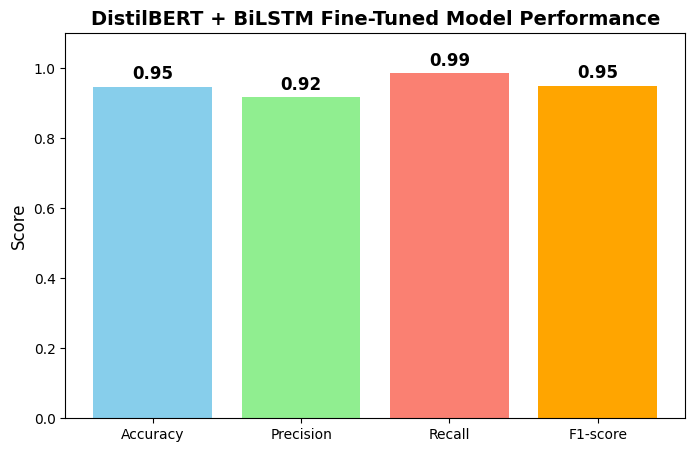

In [ ]:
y_pred_prob = model.predict([X_test_ids, X_test_mask], batch_size=BATCH_SIZE)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("DistilBERT + BIGRU Fine-Tuned Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


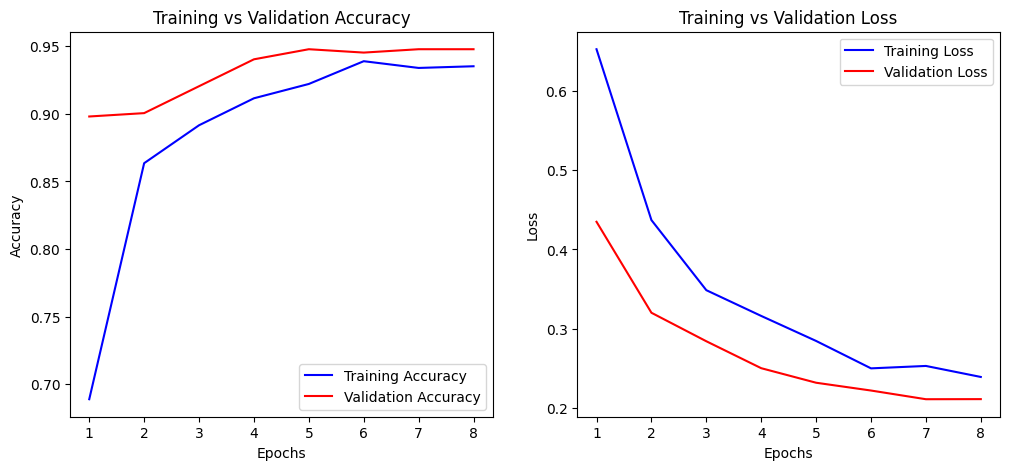

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# **DISTILBERT + Logistic Regression**

[INFO] Loading DistilBERT...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


[INFO] Extracting DistilBERT embeddings in batches...
[INFO] Finished embedding extraction. Shape: (1920, 768)
[INFO] Training Logistic Regression model...


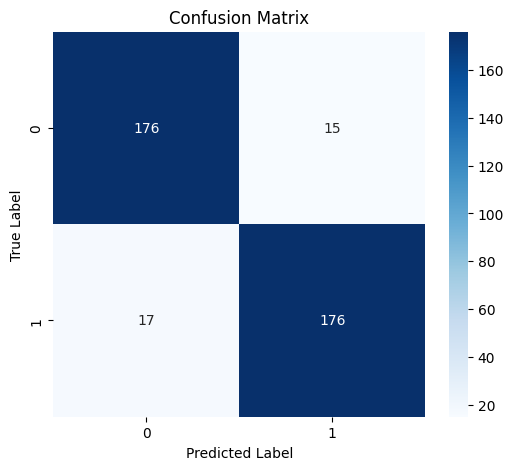


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       191
           1       0.92      0.91      0.92       193

    accuracy                           0.92       384
   macro avg       0.92      0.92      0.92       384
weighted avg       0.92      0.92      0.92       384



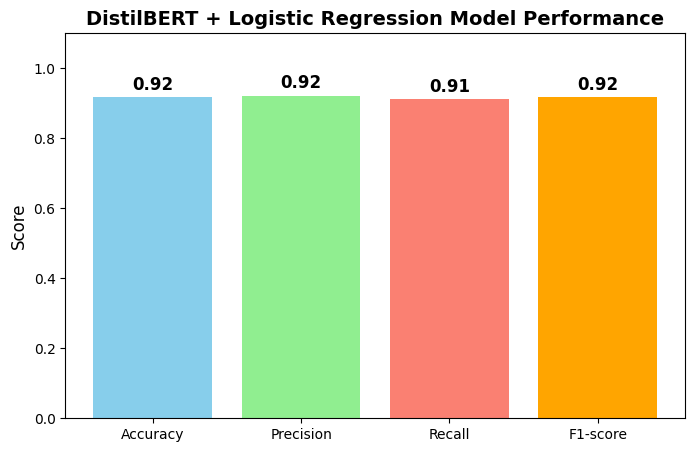

In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertModel
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


MAX_LEN = 256
BATCH_SIZE = 16
print("[INFO] Loading DistilBERT...")
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
distilbert = TFDistilBertModel.from_pretrained("distilbert-base-uncased", from_pt=True)
distilbert.trainable = False

encodings = tokenizer(
    list(X_cleaned),
    truncation=True,
    padding=True,
    max_length=MAX_LEN,
    return_tensors="tf"
)

input_ids = encodings["input_ids"]
attention_mask = encodings["attention_mask"]
y = np.array(y_cleaned)


print("[INFO] Extracting DistilBERT embeddings in batches...")

embeddings_list = []
for i in range(0, len(input_ids), BATCH_SIZE):
    batch_input_ids = input_ids[i:i+BATCH_SIZE]
    batch_attention_mask = attention_mask[i:i+BATCH_SIZE]
    outputs = distilbert(batch_input_ids, attention_mask=batch_attention_mask)
    batch_embeddings = outputs.last_hidden_state[:, 0, :].numpy()
    embeddings_list.append(batch_embeddings)

embeddings = np.concatenate(embeddings_list, axis=0)
print(f"[INFO] Finished embedding extraction. Shape: {embeddings.shape}")


X_train, X_test, y_train, y_test = train_test_split(
    embeddings, y, test_size=0.2, random_state=42
)


print("[INFO] Training Logistic Regression model...")
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("DistilBERT + Logistic Regression Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Train Accuracy: 0.9615885416666666
Test Accuracy: 0.9166666666666666


# **DISTILBERT + RandomForestclassifier**

[INFO] Loading DistilBERT...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


[INFO] Extracting DistilBERT embeddings in batches...
[INFO] Finished embedding extraction. Shape: (1920, 768)
[INFO] Training Random Forest model...


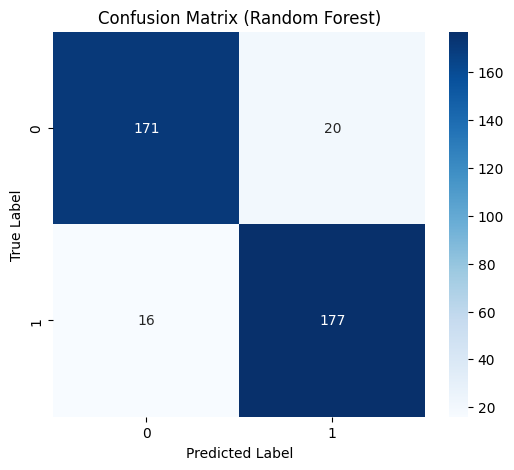


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       191
           1       0.90      0.92      0.91       193

    accuracy                           0.91       384
   macro avg       0.91      0.91      0.91       384
weighted avg       0.91      0.91      0.91       384



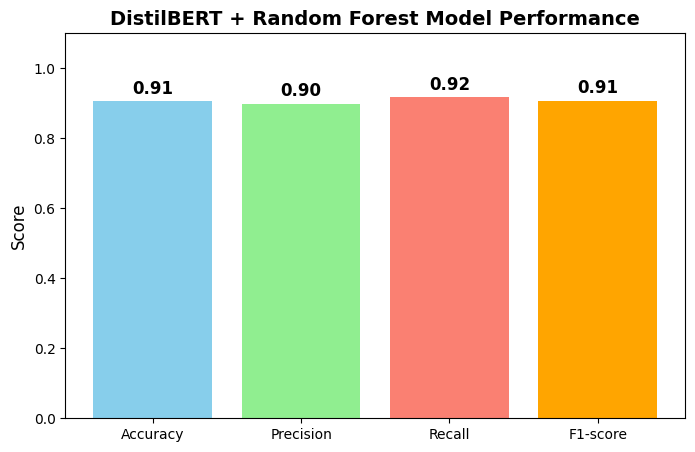

In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertModel
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


MAX_LEN = 256
BATCH_SIZE = 16
print("[INFO] Loading DistilBERT...")
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
distilbert = TFDistilBertModel.from_pretrained("distilbert-base-uncased", from_pt=True)
distilbert.trainable = False  # Freeze DistilBERT for feature extraction


encodings = tokenizer(
    list(X_cleaned),
    truncation=True,
    padding=True,
    max_length=MAX_LEN,
    return_tensors="tf"
)

input_ids = encodings["input_ids"]
attention_mask = encodings["attention_mask"]
y = np.array(y_cleaned)


print("[INFO] Extracting DistilBERT embeddings in batches...")

embeddings_list = []
for i in range(0, len(input_ids), BATCH_SIZE):
    batch_input_ids = input_ids[i:i+BATCH_SIZE]
    batch_attention_mask = attention_mask[i:i+BATCH_SIZE]
    outputs = distilbert(batch_input_ids, attention_mask=batch_attention_mask)
    batch_embeddings = outputs.last_hidden_state[:, 0, :].numpy()  # CLS token
    embeddings_list.append(batch_embeddings)

embeddings = np.concatenate(embeddings_list, axis=0)
print(f"[INFO] Finished embedding extraction. Shape: {embeddings.shape}")


X_train, X_test, y_train, y_test = train_test_split(
    embeddings, y, test_size=0.2, random_state=42
)


print("[INFO] Training Random Forest model...")
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train, y_train)


y_pred = rf_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("DistilBERT + Random Forest Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


# **DISTILBERT + XGBoost**

In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertModel
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


MAX_LEN = 256
BATCH_SIZE = 16
print("[INFO] Loading DistilBERT...")
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
distilbert = TFDistilBertModel.from_pretrained("distilbert-base-uncased", from_pt=True)
distilbert.trainable = False  # Freeze DistilBERT for feature extraction


encodings = tokenizer(
    list(X_cleaned),
    truncation=True,
    padding=True,
    max_length=MAX_LEN,
    return_tensors="tf"
)

input_ids = encodings["input_ids"]
attention_mask = encodings["attention_mask"]
y = np.array(y_cleaned)


print("[INFO] Extracting DistilBERT embeddings in batches...")

embeddings_list = []
for i in range(0, len(input_ids), BATCH_SIZE):
    batch_input_ids = input_ids[i:i+BATCH_SIZE]
    batch_attention_mask = attention_mask[i:i+BATCH_SIZE]
    outputs = distilbert(batch_input_ids, attention_mask=batch_attention_mask)
    batch_embeddings = outputs.last_hidden_state[:, 0, :].numpy()  # CLS token
    embeddings_list.append(batch_embeddings)

embeddings = np.concatenate(embeddings_list, axis=0)
print(f"[INFO] Finished embedding extraction. Shape: {embeddings.shape}")


X_train, X_test, y_train, y_test = train_test_split(
    embeddings, y, test_size=0.2, random_state=42
)

print("[INFO] Training XGBoost model...")
xgb_clf = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_clf.fit(X_train, y_train)



[INFO] Loading DistilBERT...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


[INFO] Extracting DistilBERT embeddings in batches...
[INFO] Finished embedding extraction. Shape: (1920, 768)
[INFO] Training XGBoost model...


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

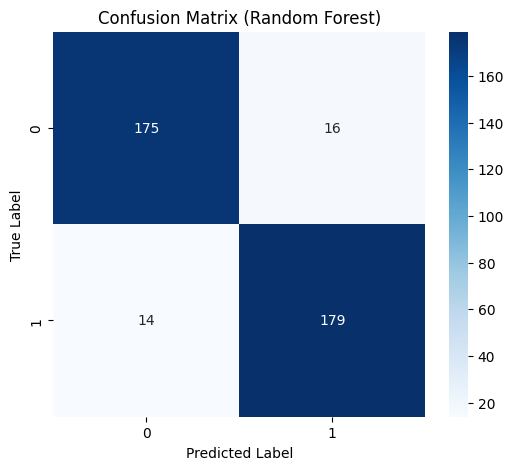


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       191
           1       0.92      0.93      0.92       193

    accuracy                           0.92       384
   macro avg       0.92      0.92      0.92       384
weighted avg       0.92      0.92      0.92       384



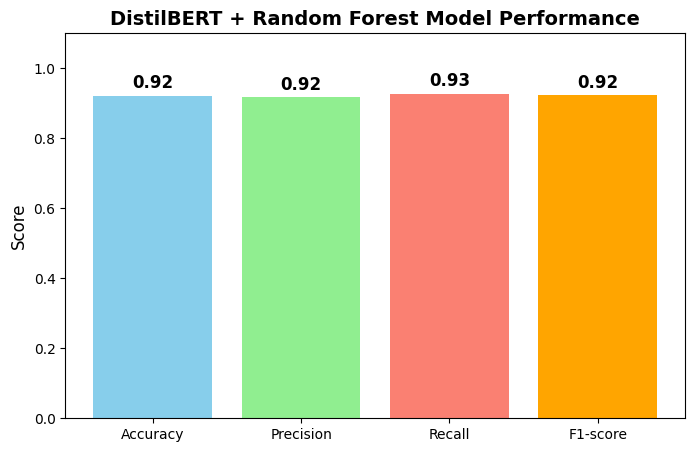

In [ ]:
y_pred = xgb_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("DistilBERT + Random Forest Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


# **DISTILBERT + LIGHTgbm**

Absolutely 👍 — let’s break down all the **important LightGBM parameters** used in your model:

---

### 🌟 **LightGBM Overview**

LightGBM (**Light Gradient Boosting Machine**) is a powerful, fast, and efficient gradient boosting framework developed by Microsoft.
It’s especially good for:

* Large datasets
* Handling categorical and numerical features efficiently
* Faster training than XGBoost with similar or better accuracy

---

### ⚙️ **Parameters Used in Your Code**

#### 🧩 1. `n_estimators=300`

* This means **300 decision trees** will be built sequentially.
* More trees → higher accuracy (but may increase overfitting).
* You can tune it (e.g. try 100, 300, 500).

💡 *Think of it as the number of boosting rounds.*

---

#### 🧩 2. `learning_rate=0.05`

* Controls **how much each new tree** contributes to the overall model.
* Smaller value → slower learning → needs more trees.
* Larger value → faster learning but risk of overfitting.

💡 *Common range: 0.01 – 0.1.*

---

#### 🧩 3. `max_depth=-1`

* Defines how deep each tree can go.
* `-1` means **no limit**, allowing the model to find complex patterns.
* But deeper trees can overfit small datasets.

💡 *For smaller datasets, try limiting to 6–12.*

---

#### 🧩 4. `num_leaves=31`

* Controls the **complexity of each tree**.
* The higher the number of leaves, the more complex the model.
* Rough guideline:

  ```
  num_leaves ≈ 2^(max_depth)
  ```

💡 *For example, max_depth=6 → num_leaves around 64.*

---

#### 🧩 5. `subsample=0.8`

* Uses **80% of data randomly** for each tree.
* Helps prevent overfitting by introducing randomness.

💡 *Think of it as “row sampling.”*

---

#### 🧩 6. `colsample_bytree=0.8`

* Uses **80% of features** for each tree.
* Also helps prevent overfitting by introducing feature randomness.

💡 *Think of it as “column sampling.”*

---

#### 🧩 7. `random_state=42`

* Sets the random seed for reproducibility.
* Ensures you get the same results each time you run the code.

---

### 🧠 **Additional Useful Parameters (Optional)**

| Parameter           | Meaning                        | Typical Value                                          |
| ------------------- | ------------------------------ | ------------------------------------------------------ |
| `min_child_samples` | Minimum data points in a leaf  | 20–50                                                  |
| `reg_alpha`         | L1 regularization (sparsity)   | 0–1                                                    |
| `reg_lambda`        | L2 regularization (smoothness) | 0–1                                                    |
| `objective`         | Type of task                   | `"binary"` for 2-class, `"multiclass"` for multi-class |
| `boosting_type`     | Type of boosting               | `"gbdt"` (default), `"dart"`, `"goss"`                 |

---

### 📊 **How It Works (Simplified)**

1. LightGBM builds the **first tree** to make an initial prediction.
2. It checks the **error** and builds the **next tree** to fix that error.
3. Each new tree tries to correct previous mistakes (gradient boosting).
4. Final prediction = sum of all tree outputs (weighted by learning_rate).

---

Would you like me to show you a **parameter tuning guide** (how to adjust `num_leaves`, `max_depth`, and `learning_rate` for best accuracy and less overfitting)?


In [ ]:
from transformers import DistilBertTokenizer, TFDistilBertModel
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


MAX_LEN = 256
BATCH_SIZE = 16
print("[INFO] Loading DistilBERT...")
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
distilbert = TFDistilBertModel.from_pretrained("distilbert-base-uncased", from_pt=True)
distilbert.trainable = False  # Freeze DistilBERT for feature extraction


encodings = tokenizer(
    list(X_cleaned),
    truncation=True,
    padding=True,
    max_length=MAX_LEN,
    return_tensors="tf"
)

input_ids = encodings["input_ids"]
attention_mask = encodings["attention_mask"]
y = np.array(y_cleaned)


print("[INFO] Extracting DistilBERT embeddings in batches...")

embeddings_list = []
for i in range(0, len(input_ids), BATCH_SIZE):
    batch_input_ids = input_ids[i:i+BATCH_SIZE]
    batch_attention_mask = attention_mask[i:i+BATCH_SIZE]
    outputs = distilbert(batch_input_ids, attention_mask=batch_attention_mask)
    batch_embeddings = outputs.last_hidden_state[:, 0, :].numpy()  # CLS token
    embeddings_list.append(batch_embeddings)

embeddings = np.concatenate(embeddings_list, axis=0)
print(f"[INFO] Finished embedding extraction. Shape: {embeddings.shape}")


X_train, X_test, y_train, y_test = train_test_split(
    embeddings, y, test_size=0.2, random_state=42
)

print("[INFO] Training LightGBM model...")
lgbm_clf = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,          # -1 means no limit
    num_leaves=31,         # controls model complexity
    subsample=0.8,         # randomly sample 80% of data per tree
    colsample_bytree=0.8,  # randomly sample 80% of features per tree
    random_state=42
)

lgbm_clf.fit(X_train, y_train)


[INFO] Loading DistilBERT...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


[INFO] Extracting DistilBERT embeddings in batches...
[INFO] Finished embedding extraction. Shape: (1920, 768)
[INFO] Training LightGBM model...
[LightGBM] [Info] Number of positive: 768, number of negative: 768
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030759 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 1536, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, n_estimators=300,
               random_state=42, subsample=0.8)

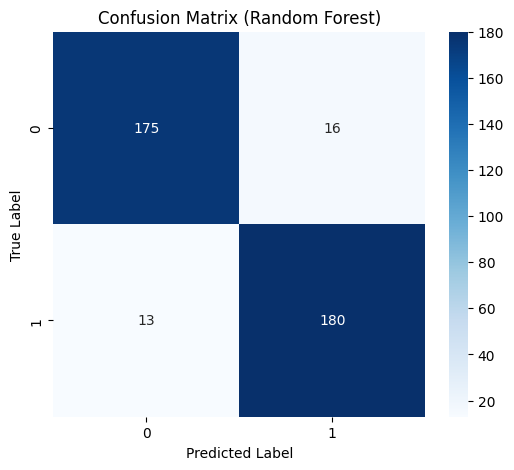


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       191
           1       0.92      0.93      0.93       193

    accuracy                           0.92       384
   macro avg       0.92      0.92      0.92       384
weighted avg       0.92      0.92      0.92       384



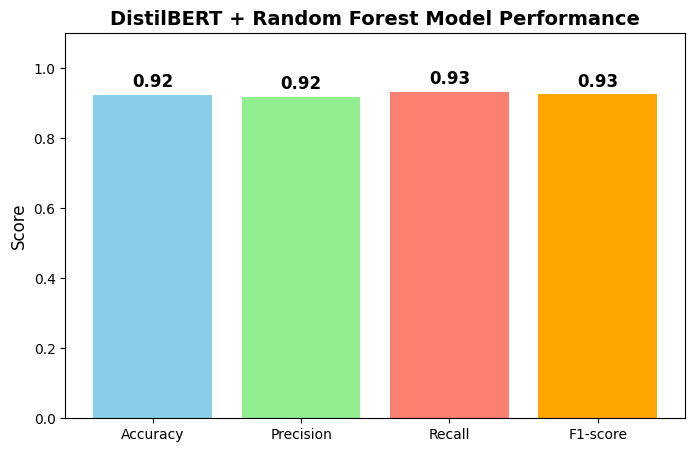

In [ ]:
y_pred = lgbm_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("DistilBERT + Random Forest Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


# **ROBERTA + LSTM**

| Feature                 | DistilBERT                  | RoBERTa                                                |
| ----------------------- | --------------------------- | ------------------------------------------------------ |
| Size                    | Smaller (66M params)        | Larger (125M params for base)                          |
| Training Data           | Wikipedia + BookCorpus      | More robust: BookCorpus, CC-News, OpenWebText, Stories |
| Fine-tuning Performance | Good, fast                  | Usually better accuracy on nuanced tasks               |
| Speed                   | Faster, lighter             | Slower, heavier                                        |
| Use Case                | Lightweight, fast inference | High accuracy for semantic understanding               |


| Model                        | Key Features                                           | Pros                                                                     | Cons                                                    | Likely Performance for “self-comment detection”                       |
| ---------------------------- | ------------------------------------------------------ | ------------------------------------------------------------------------ | ------------------------------------------------------- | --------------------------------------------------------------------- |
| **BERT (bert-base-uncased)** | 12-layer Transformer, 110M params                      | Good general understanding, widely used, strong semantic capture         | Slow to train, heavy                                    | Strong baseline, usually accurate                                     |
| **DistilBERT**               | Smaller, distilled version of BERT, 66M params         | Faster, lighter, less memory                                             | Slightly lower accuracy than BERT                       | Good if speed is important, may miss subtle semantics                 |
| **RoBERTa (roberta-base)**   | BERT variant trained on more data, robust, 125M params | Usually outperforms BERT on text classification, captures nuances better | Heavier, slower                                         | Best for subtle semantic detection like self-comment vs other-comment |
| **SBERT / Sentence-BERT**    | Optimized for sentence embeddings & similarity         | Excellent for semantic similarity, clustering, or retrieval              | Not a classifier out-of-the-box; needs extra classifier | Works best if you convert task to embedding + classifier approach     |


| Priority                                      | Recommended Model    |
| --------------------------------------------- | -------------------- |
| Maximum Accuracy                              | RoBERTa (fine-tuned) |
| Faster Training / Smaller Dataset             | DistilBERT           |
| Semantic Embeddings / Future Similarity Tasks | SBERT                |



| Model                             | Size / Params                | Pros                                                         | Cons                                       | Fit for Self-Comment Detection                                                |
| --------------------------------- | ---------------------------- | ------------------------------------------------------------ | ------------------------------------------ | ----------------------------------------------------------------------------- |
| **BERT-base (bert-base-uncased)** | 12 layers, 110M              | Strong semantic understanding, widely tested                 | Slower, heavy                              | Good baseline; can work well if fine-tuned                                    |
| **RoBERTa-base**                  | 12 layers, 125M              | BERT variant trained on more data, better at nuances         | Slower, heavier                            | **Best choice** for subtle semantic differences (like self-comment detection) |
| **DistilBERT**                    | 6 layers, 66M                | Lightweight, faster training and inference                   | Slightly less accurate                     | Works if speed is important or dataset is small                               |
| **ALBERT**                        | 12–24M (parameter-efficient) | Smaller, faster, less memory                                 | May underperform on nuanced classification | Could work, but not optimal for subtle semantic tasks                         |
| **SBERT**                         | Embedding-focused            | Excellent for semantic similarity and sentence-level meaning | Not a classifier by itself                 | Can be combined with a classifier; good for semantic-heavy tasks              |


In [ ]:
from transformers import RobertaTokenizer, TFRobertaModel
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split


MAX_LEN = 256
BATCH_SIZE = 16
EPOCHS = 10
LR = 1e-4

print("[INFO] Loading RoBERTa...")
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
roberta_model = TFRobertaModel.from_pretrained("roberta-base", from_pt=True)

# Freeze RoBERTa layers for feature extraction
roberta_model.trainable = False
roberta_model.trainable = False
for layer in roberta_model.layers[-2:]:  # last 2 layers
    layer.trainable = True



encodings = tokenizer(
    list(X_cleaned),
    truncation=True,
    padding=True,
    max_length=MAX_LEN,
    return_tensors="tf"
)

input_ids = encodings["input_ids"]
attention_mask = encodings["attention_mask"]
y = np.array(y_cleaned)


input_ids_np = input_ids.numpy()
attention_mask_np = attention_mask.numpy()


X_train_ids, X_test_ids, X_train_mask, X_test_mask, y_train, y_test = train_test_split(
    input_ids_np, attention_mask_np, y, test_size=0.2, random_state=42
)


class RobertaEmbeddingLayer(tf.keras.layers.Layer):
    def __init__(self, roberta_model, **kwargs):
        super().__init__(**kwargs)
        self.roberta = roberta_model

    def call(self, inputs):
        input_ids, attention_mask = inputs
        outputs = self.roberta(input_ids, attention_mask=attention_mask)
        return outputs.last_hidden_state  # shape: (batch, seq_len, 768)


input_ids_layer = Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_ids")
attention_mask_layer = Input(shape=(MAX_LEN,), dtype=tf.int32, name="attention_mask")

bert_embeddings = RobertaEmbeddingLayer(roberta_model)([input_ids_layer, attention_mask_layer])


x = LSTM(64, return_sequences=False, kernel_regularizer=regularizers.l2(1e-4))(bert_embeddings)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4))(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation="sigmoid")(x)

model = Model(inputs=[input_ids_layer, attention_mask_layer], outputs=outputs)


model.compile(
    optimizer=Adam(learning_rate=LR),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

early_stop = EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    restore_best_weights=True
)


print("[INFO] Training started...")
history = model.fit(
    [X_train_ids, X_train_mask], y_train,
    validation_data=([X_test_ids, X_test_mask], y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop],
    verbose=1
)

loss, acc = model.evaluate([X_test_ids, X_test_mask], y_test, verbose=0)
print(f"[INFO] Test Accuracy: {acc:.4f}")


[INFO] Loading RoBERTa...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ roberta_embedding_… │ (None, 256, 768)  │          0 │ input_ids[0][0],  │
│ (RobertaEmbeddingL… │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 64)        │    213,248 │ roberta_embeddin… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 64)        │          0 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │      8,320 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 128)       │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │        129 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 221,697 (866.00 KB)

 Trainable params: 221,697 (866.00 KB)

 Non-trainable params: 0 (0.00 B)

[INFO] Training started...
Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 74s 488ms/step - accuracy: 0.5515 - loss: 0.7565 - val_accuracy: 0.7756 - val_loss: 0.6128
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 43s 422ms/step - accuracy: 0.7533 - loss: 0.5898 - val_accuracy: 0.8529 - val_loss: 0.3985
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 37s 369ms/step - accuracy: 0.8718 - loss: 0.4001 - val_accuracy: 0.8878 - val_loss: 0.3387
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 37s 370ms/step - accuracy: 0.8995 - loss: 0.3270 - val_accuracy: 0.8978 - val_loss: 0.3127
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 37s 369ms/step - accuracy: 0.9128 - loss: 0.3193 - val_accuracy: 0.8878 - val_loss: 0.3303
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 37s 369ms/step - accuracy: 0.9171 - loss: 0.2879 - val_accuracy: 0.9027 - val_loss: 0.3007
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 37s 369ms/step - accuracy: 0.9285 - loss: 0.2482 - val_accuracy: 0.8853 - val_loss: 0.3233
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 37s 369ms/step -

13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step


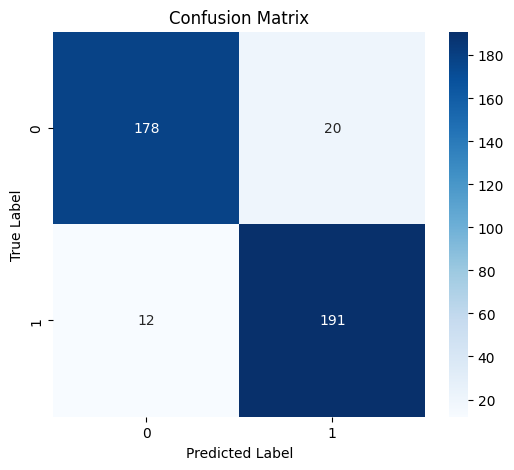


Classification Report:
              precision    recall  f1-score   support

           0     0.9368    0.8990    0.9175       198
           1     0.9052    0.9409    0.9227       203

    accuracy                         0.9202       401
   macro avg     0.9210    0.9199    0.9201       401
weighted avg     0.9208    0.9202    0.9201       401



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


y_pred_probs = model.predict([X_test_ids, X_test_mask])
y_pred = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 555ms/step


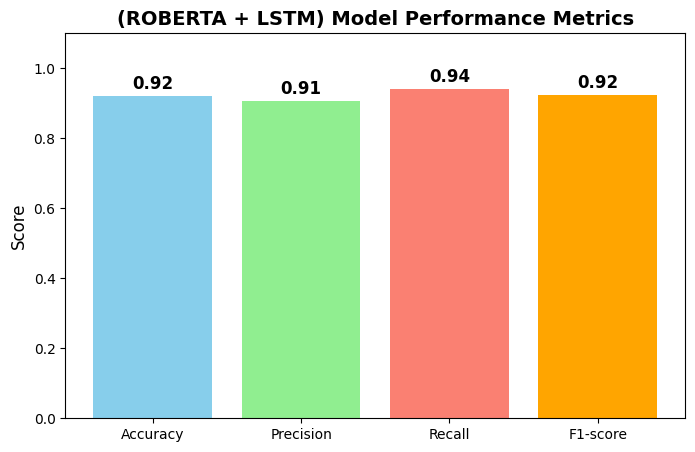

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


y_pred_prob = model.predict({"input_ids": X_test_ids, "attention_mask": X_test_mask})
y_pred = (y_pred_prob > 0.5).astype(int)


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


scores = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")

plt.ylim(0,1.1)
plt.title("(ROBERTA + LSTM) Model Performance Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


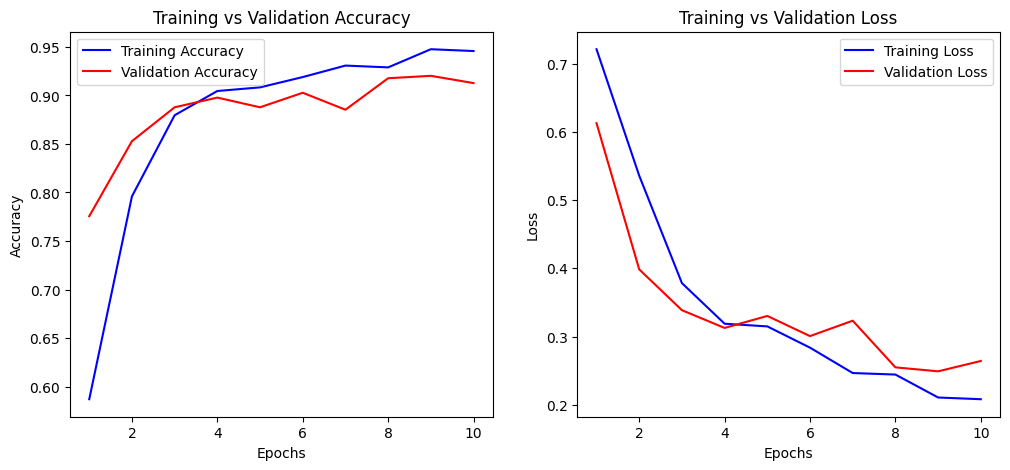

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# **ROBERTA + BILSTM**

In [ ]:
from transformers import RobertaTokenizer, TFRobertaModel
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split


MAX_LEN = 256
BATCH_SIZE = 16
EPOCHS = 10
LR = 1e-4


print("[INFO] Loading RoBERTa...")
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
roberta_model = TFRobertaModel.from_pretrained("roberta-base", from_pt=True)


# Freeze all layers first
for layer in roberta_model.layers:
    layer.trainable = False

# Unfreeze last 2 layers for task-specific tuning
for layer in roberta_model.layers[-2:]:
    layer.trainable = True


encodings = tokenizer(
    list(X_cleaned),
    truncation=True,
    padding=True,
    max_length=MAX_LEN,
    return_tensors="tf"
)

input_ids = encodings["input_ids"]
attention_mask = encodings["attention_mask"]
y = np.array(y_cleaned)

input_ids_np = input_ids.numpy()
attention_mask_np = attention_mask.numpy()

X_train_ids, X_test_ids, X_train_mask, X_test_mask, y_train, y_test = train_test_split(
    input_ids_np, attention_mask_np, y, test_size=0.2, random_state=42
)


class RobertaEmbeddingLayer(tf.keras.layers.Layer):
    def __init__(self, roberta_model, **kwargs):
        super().__init__(**kwargs)
        self.roberta = roberta_model

    def call(self, inputs):
        input_ids, attention_mask = inputs
        outputs = self.roberta(input_ids, attention_mask=attention_mask)
        return outputs.last_hidden_state  # (batch, seq_len, 768)


input_ids_layer = Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_ids")
attention_mask_layer = Input(shape=(MAX_LEN,), dtype=tf.int32, name="attention_mask")

bert_embeddings = RobertaEmbeddingLayer(roberta_model)([input_ids_layer, attention_mask_layer])

x = Bidirectional(
    LSTM(64, return_sequences=False, kernel_regularizer=regularizers.l2(3e-5))
)(bert_embeddings)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4))(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation="sigmoid")(x)

model = Model(inputs=[input_ids_layer, attention_mask_layer], outputs=outputs)


model.compile(
    optimizer=Adam(learning_rate=LR),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


early_stop = EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    restore_best_weights=True
)

print("[INFO] Training started...")
history = model.fit(
    [X_train_ids, X_train_mask], y_train,
    validation_data=([X_test_ids, X_test_mask], y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop],
    verbose=1
)


loss, acc = model.evaluate([X_test_ids, X_test_mask], y_test, verbose=0)
print(f"[INFO] Test Accuracy: {acc:.4f}")


[INFO] Loading RoBERTa...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ roberta_embedding_… │ (None, 256, 768)  │          0 │ input_ids[0][0],  │
│ (RobertaEmbeddingL… │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 128)       │    426,496 │ roberta_embeddin… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 128)       │          0 │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 128)       │     16,512 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 128)       │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │        129 │ dropout_7[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 443,137 (1.69 MB)

 Trainable params: 443,137 (1.69 MB)

 Non-trainable params: 0 (0.00 B)

[INFO] Training started...
Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 69s 436ms/step - accuracy: 0.5739 - loss: 0.7193 - val_accuracy: 0.8928 - val_loss: 0.4856
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 38s 376ms/step - accuracy: 0.8644 - loss: 0.4460 - val_accuracy: 0.8978 - val_loss: 0.2907
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 38s 379ms/step - accuracy: 0.9116 - loss: 0.3124 - val_accuracy: 0.8828 - val_loss: 0.2924
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 38s 378ms/step - accuracy: 0.9147 - loss: 0.2582 - val_accuracy: 0.9227 - val_loss: 0.2427
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 38s 379ms/step - accuracy: 0.9404 - loss: 0.2229 - val_accuracy: 0.9027 - val_loss: 0.2559
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 38s 379ms/step - accuracy: 0.9349 - loss: 0.2214 - val_accuracy: 0.8953 - val_loss: 0.2771
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 43s 426ms/step - accuracy: 0.9494 - loss: 0.1743 - val_accuracy: 0.9127 - val_loss: 0.2439
[INFO] Test Accuracy: 0.9227


13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step


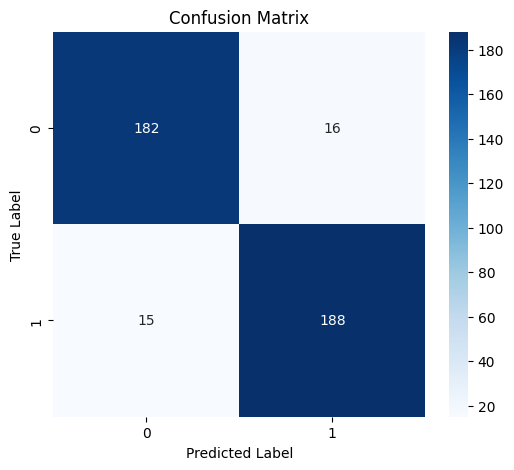


Classification Report:
              precision    recall  f1-score   support

           0     0.9239    0.9192    0.9215       198
           1     0.9216    0.9261    0.9238       203

    accuracy                         0.9227       401
   macro avg     0.9227    0.9227    0.9227       401
weighted avg     0.9227    0.9227    0.9227       401



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


y_pred_probs = model.predict([X_test_ids, X_test_mask])
y_pred = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 554ms/step


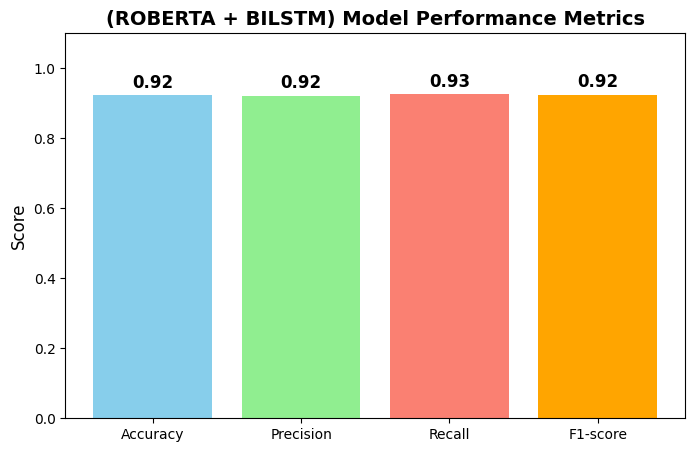

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


y_pred_prob = model.predict({"input_ids": X_test_ids, "attention_mask": X_test_mask})
y_pred = (y_pred_prob > 0.5).astype(int)


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


scores = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")

plt.ylim(0,1.1)
plt.title("(ROBERTA + BILSTM) Model Performance Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


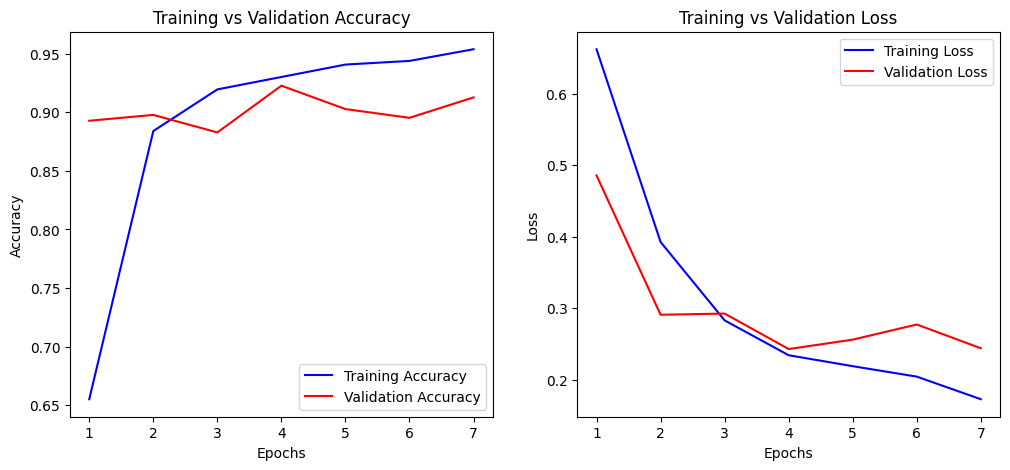

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# **ROBERTa + GRU**

In [ ]:
from transformers import RobertaTokenizer, TFRobertaModel
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split

MAX_LEN = 256
BATCH_SIZE = 16
EPOCHS = 10
LR = 1e-4

print("[INFO] Loading RoBERTa...")
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
roberta_model = TFRobertaModel.from_pretrained("roberta-base", from_pt=True)

# Freeze all layers first
for layer in roberta_model.layers:
    layer.trainable = False

# Unfreeze last 2 layers for task-specific tuning
for layer in roberta_model.layers[-2:]:
    layer.trainable = True

# ---------------- TOKENIZATION ----------------
encodings = tokenizer(
    list(X_cleaned),
    truncation=True,
    padding=True,
    max_length=MAX_LEN,
    return_tensors="tf"
)

input_ids = encodings["input_ids"]
attention_mask = encodings["attention_mask"]
y = np.array(y_cleaned)

input_ids_np = input_ids.numpy()
attention_mask_np = attention_mask.numpy()

X_train_ids, X_test_ids, X_train_mask, X_test_mask, y_train, y_test = train_test_split(
    input_ids_np, attention_mask_np, y, test_size=0.2, random_state=42
)


class RobertaEmbeddingLayer(tf.keras.layers.Layer):
    def __init__(self, roberta_model, **kwargs):
        super().__init__(**kwargs)
        self.roberta = roberta_model

    def call(self, inputs):
        input_ids, attention_mask = inputs
        outputs = self.roberta(input_ids, attention_mask=attention_mask)
        return outputs.last_hidden_state  # (batch, seq_len, 768)


input_ids_layer = Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_ids")
attention_mask_layer = Input(shape=(MAX_LEN,), dtype=tf.int32, name="attention_mask")

bert_embeddings = RobertaEmbeddingLayer(roberta_model)([input_ids_layer, attention_mask_layer])


x = GRU(64, return_sequences=False, kernel_regularizer=regularizers.l2(1e-4))(bert_embeddings)
x = Dropout(0.6)(x)
x = Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4))(x)
x = Dropout(0.6)(x)
outputs = Dense(1, activation="sigmoid")(x)

model = Model(inputs=[input_ids_layer, attention_mask_layer], outputs=outputs)

model.compile(
    optimizer=Adam(learning_rate=LR),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

early_stop = EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    restore_best_weights=True
)

print("[INFO] Training started...")
history = model.fit(
    [X_train_ids, X_train_mask], y_train,
    validation_data=([X_test_ids, X_test_mask], y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop],
    verbose=1
)

loss, acc = model.evaluate([X_test_ids, X_test_mask], y_test, verbose=0)
print(f"[INFO] Test Accuracy: {acc:.4f}")


[INFO] Loading RoBERTa...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ roberta_embedding_… │ (None, 256, 768)  │          0 │ input_ids[0][0],  │
│ (RobertaEmbeddingL… │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_1 (GRU)         │ (None, 64)        │    160,128 │ roberta_embeddin… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 64)        │          0 │ gru_1[0][0]       │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 128)       │      8,320 │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 128)       │          0 │ dense_10[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │        129 │ dropout_11[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 168,577 (658.50 KB)

 Trainable params: 168,577 (658.50 KB)

 Non-trainable params: 0 (0.00 B)

[INFO] Training started...
Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 76s 442ms/step - accuracy: 0.5456 - loss: 0.7524 - val_accuracy: 0.7855 - val_loss: 0.6388
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 37s 370ms/step - accuracy: 0.6888 - loss: 0.6425 - val_accuracy: 0.8254 - val_loss: 0.5368
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 40s 401ms/step - accuracy: 0.7841 - loss: 0.5367 - val_accuracy: 0.8554 - val_loss: 0.4156
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 42s 418ms/step - accuracy: 0.8698 - loss: 0.4225 - val_accuracy: 0.8903 - val_loss: 0.3273
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 43s 425ms/step - accuracy: 0.8950 - loss: 0.3183 - val_accuracy: 0.8853 - val_loss: 0.2891
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 40s 394ms/step - accuracy: 0.9096 - loss: 0.2730 - val_accuracy: 0.9052 - val_loss: 0.2663
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 37s 370ms/step - accuracy: 0.9197 - loss: 0.2329 - val_accuracy: 0.9127 - val_loss: 0.2564
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 37s 370ms/step -

13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 766ms/step


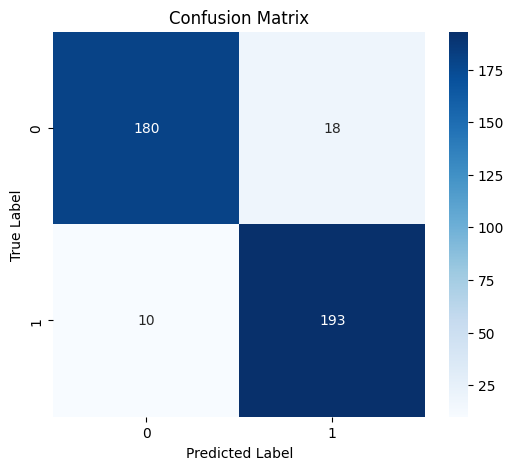


Classification Report:
              precision    recall  f1-score   support

           0     0.9474    0.9091    0.9278       198
           1     0.9147    0.9507    0.9324       203

    accuracy                         0.9302       401
   macro avg     0.9310    0.9299    0.9301       401
weighted avg     0.9308    0.9302    0.9301       401

13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 775ms/step


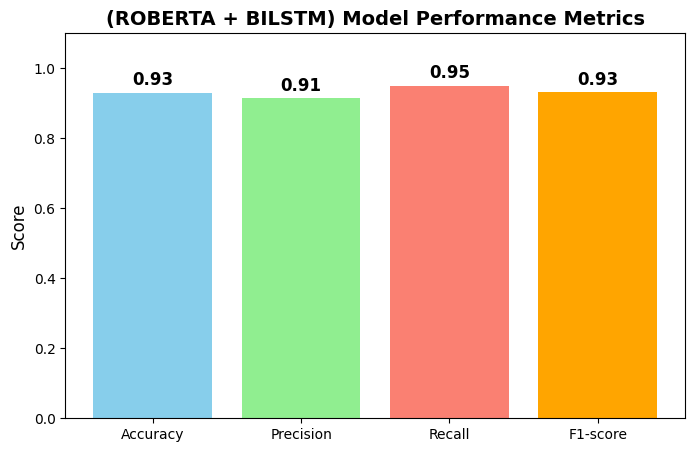

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



y_pred_probs = model.predict([X_test_ids, X_test_mask])
y_pred = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))



y_pred_prob = model.predict({"input_ids": X_test_ids, "attention_mask": X_test_mask})
y_pred = (y_pred_prob > 0.5).astype(int)


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


scores = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")

plt.ylim(0,1.1)
plt.title("(ROBERTA + BILSTM) Model Performance Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()



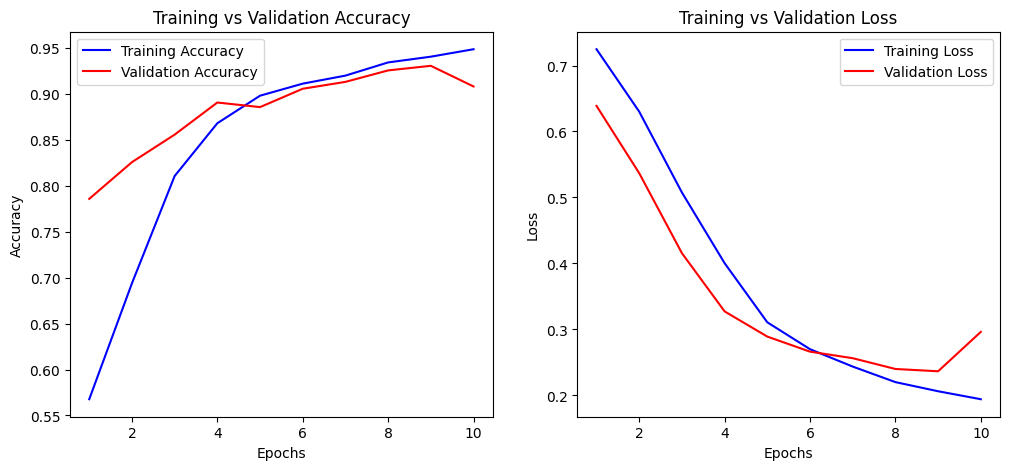

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# **ROBERTa + BIGRU**

In [ ]:
from transformers import RobertaTokenizer, TFRobertaModel
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split

MAX_LEN = 256
BATCH_SIZE = 16
EPOCHS = 10
LR = 1e-4

print("[INFO] Loading RoBERTa...")
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
roberta_model = TFRobertaModel.from_pretrained("roberta-base", from_pt=True)

# Freeze all layers first
for layer in roberta_model.layers:
    layer.trainable = False

# Unfreeze last 2 layers for task-specific tuning
for layer in roberta_model.layers[-2:]:
    layer.trainable = True

encodings = tokenizer(
    list(X_cleaned),
    truncation=True,
    padding=True,
    max_length=MAX_LEN,
    return_tensors="tf"
)

input_ids = encodings["input_ids"]
attention_mask = encodings["attention_mask"]
y = np.array(y_cleaned)

input_ids_np = input_ids.numpy()
attention_mask_np = attention_mask.numpy()

X_train_ids, X_test_ids, X_train_mask, X_test_mask, y_train, y_test = train_test_split(
    input_ids_np, attention_mask_np, y, test_size=0.2, random_state=42
)

class RobertaEmbeddingLayer(tf.keras.layers.Layer):
    def __init__(self, roberta_model, **kwargs):
        super().__init__(**kwargs)
        self.roberta = roberta_model

    def call(self, inputs):
        input_ids, attention_mask = inputs
        outputs = self.roberta(input_ids, attention_mask=attention_mask)
        return outputs.last_hidden_state  # (batch, seq_len, 768)

input_ids_layer = Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_ids")
attention_mask_layer = Input(shape=(MAX_LEN,), dtype=tf.int32, name="attention_mask")

bert_embeddings = RobertaEmbeddingLayer(roberta_model)([input_ids_layer, attention_mask_layer])


x = Bidirectional(
    GRU(64, return_sequences=False, kernel_regularizer=regularizers.l2(1e-4))
)(bert_embeddings)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-4))(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation="sigmoid")(x)

model = Model(inputs=[input_ids_layer, attention_mask_layer], outputs=outputs)

model.compile(
    optimizer=Adam(learning_rate=LR),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

early_stop = EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    restore_best_weights=True
)

print("[INFO] Training started...")
history = model.fit(
    [X_train_ids, X_train_mask], y_train,
    validation_data=([X_test_ids, X_test_mask], y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop],
    verbose=1
)

loss, acc = model.evaluate([X_test_ids, X_test_mask], y_test, verbose=0)
print(f"[INFO] Test Accuracy: {acc:.4f}")


[INFO] Loading RoBERTa...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_ids           │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_mask      │ (None, 256)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ roberta_embedding_… │ (None, 256, 768)  │          0 │ input_ids[0][0],  │
│ (RobertaEmbeddingL… │                   │            │ attention_mask[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_3     │ (None, 128)       │    320,256 │ roberta_embeddin… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 128)       │          0 │ bidirectional_3[… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 128)       │     16,512 │ dropout_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 128)       │          0 │ dense_14[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 1)         │        129 │ dropout_15[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 336,897 (1.29 MB)

 Trainable params: 336,897 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

[INFO] Training started...
Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 71s 451ms/step - accuracy: 0.5280 - loss: 0.8244 - val_accuracy: 0.9002 - val_loss: 0.5962
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 38s 380ms/step - accuracy: 0.7351 - loss: 0.6098 - val_accuracy: 0.9202 - val_loss: 0.4031
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 38s 380ms/step - accuracy: 0.8610 - loss: 0.4365 - val_accuracy: 0.9177 - val_loss: 0.2953
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 39s 382ms/step - accuracy: 0.9127 - loss: 0.2970 - val_accuracy: 0.9277 - val_loss: 0.2660
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 38s 379ms/step - accuracy: 0.9250 - loss: 0.2584 - val_accuracy: 0.9152 - val_loss: 0.2608
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 38s 379ms/step - accuracy: 0.9367 - loss: 0.2362 - val_accuracy: 0.9202 - val_loss: 0.2499
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 39s 391ms/step - accuracy: 0.9501 - loss: 0.1998 - val_accuracy: 0.9451 - val_loss: 0.2409
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 42s 416ms/step -

13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 765ms/step


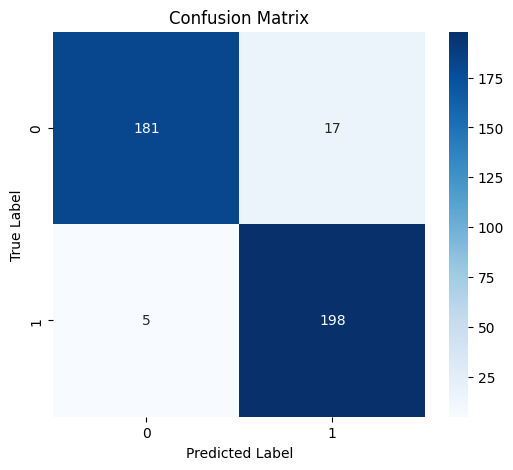


Classification Report:
              precision    recall  f1-score   support

           0     0.9731    0.9141    0.9427       198
           1     0.9209    0.9754    0.9474       203

    accuracy                         0.9451       401
   macro avg     0.9470    0.9448    0.9450       401
weighted avg     0.9467    0.9451    0.9451       401

13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 914ms/step


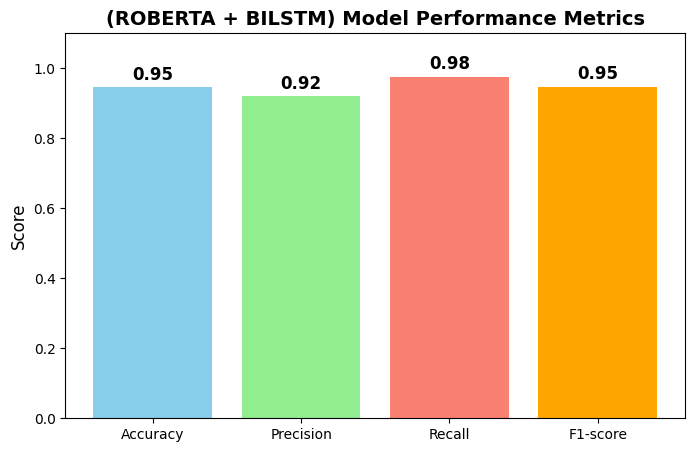

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



y_pred_probs = model.predict([X_test_ids, X_test_mask])
y_pred = (y_pred_probs > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))



y_pred_prob = model.predict({"input_ids": X_test_ids, "attention_mask": X_test_mask})
y_pred = (y_pred_prob > 0.5).astype(int)


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


scores = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")

plt.ylim(0,1.1)
plt.title("(ROBERTA + BILSTM) Model Performance Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()



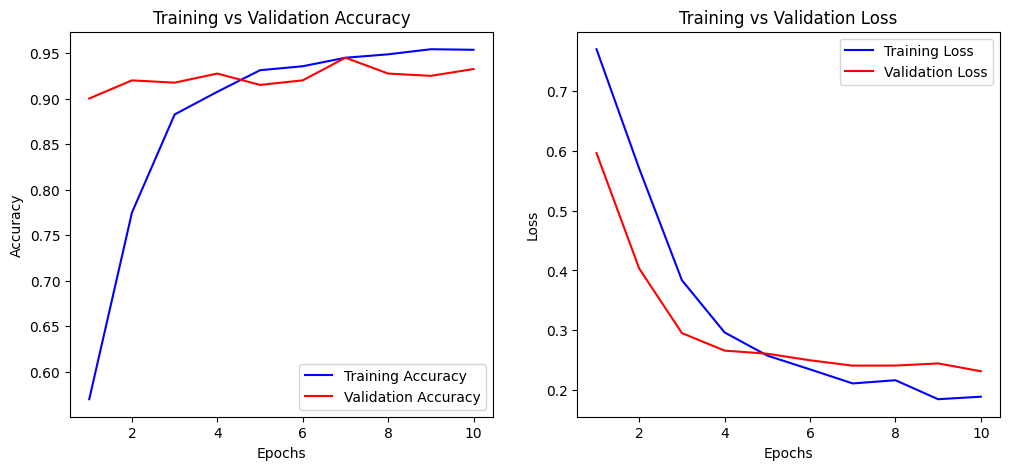

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# **ROBERTa + RandomforestClassifier**

In [ ]:
from transformers import RobertaTokenizer, TFRobertaModel
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import tensorflow as tf


MAX_LEN = 256
BATCH_SIZE = 16


print("[INFO] Loading RoBERTa model...")
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
roberta_model = TFRobertaModel.from_pretrained("roberta-base", from_pt=True)

# Freeze all layers to save memory
for layer in roberta_model.layers:
    layer.trainable = False


print("[INFO] Tokenizing sentences...")
encodings = tokenizer(
    list(X_cleaned),
    truncation=True,
    padding=True,
    max_length=MAX_LEN,
    return_tensors="tf"
)

input_ids = encodings["input_ids"]
attention_mask = encodings["attention_mask"]
y = np.array(y_cleaned)


print("[INFO] Computing RoBERTa embeddings in batches...")
embeddings_list = []
dataset = tf.data.Dataset.from_tensor_slices((input_ids, attention_mask)).batch(BATCH_SIZE)

for batch in dataset:
    batch_input_ids, batch_attention_mask = batch
    outputs = roberta_model(batch_input_ids, attention_mask=batch_attention_mask)
    # Use mean pooling over sequence length
    batch_embeddings = tf.reduce_mean(outputs.last_hidden_state, axis=1)
    embeddings_list.append(batch_embeddings)

embeddings = tf.concat(embeddings_list, axis=0).numpy()
print(f"[INFO] Embeddings shape: {embeddings.shape}")  # (num_samples, 768)

X = embeddings


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


print("[INFO] Training Random Forest classifier...")
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)



[INFO] Loading RoBERTa model...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


[INFO] Tokenizing sentences...
[INFO] Computing RoBERTa embeddings in batches...
[INFO] Embeddings shape: (2004, 768)
[INFO] Training Random Forest classifier...


RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300, n_jobs=-1, random_state=42)

Accuracy: 0.9077
Precision: 0.8905
Recall: 0.9303
F1-score: 0.9100

Confusion Matrix:


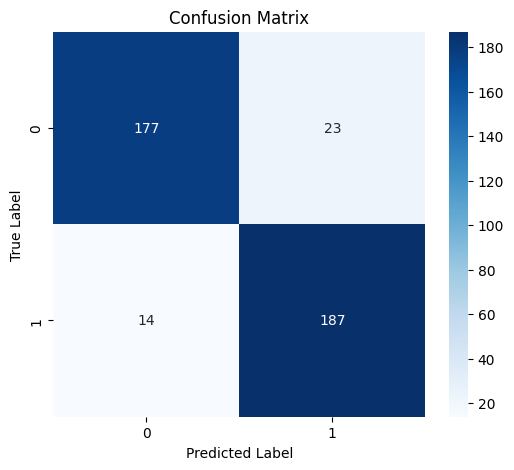

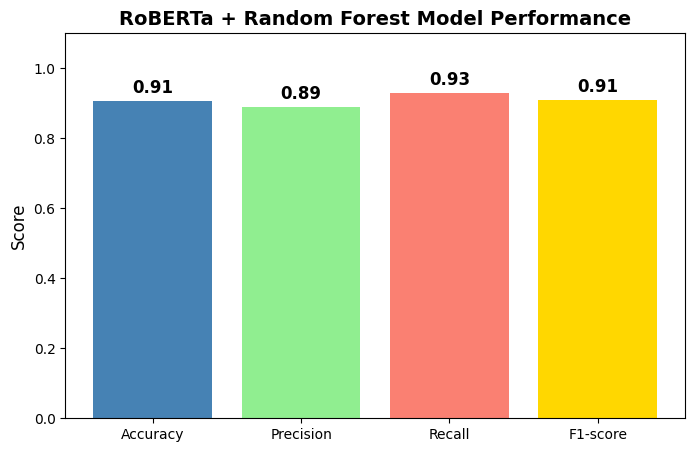

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
y_pred = rf_model.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc_score:.4f}")
print(f"Precision: {prec_score:.4f}")
print(f"Recall: {rec_score:.4f}")
print(f"F1-score: {f1:.4f}")

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()





scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['steelblue','lightgreen','salmon','gold'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("RoBERTa + Random Forest Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


# **ROBERTa + Logistic Regression**

In [ ]:
from transformers import RobertaTokenizer, RobertaModel
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm  # ✅ for progress bar

# Configuration
MAX_LEN = 256
BATCH_SIZE = 32

# Device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"[INFO] Using device: {device}")

# Load tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaModel.from_pretrained("roberta-base").to(device)
model.eval()

# Tokenize
print("[INFO] Tokenizing sentences...")
encodings = tokenizer(
    list(X_cleaned),
    truncation=True,
    padding=True,
    max_length=MAX_LEN,
    return_tensors="pt"
)

input_ids = encodings["input_ids"]
attention_mask = encodings["attention_mask"]
y = np.array(y_cleaned)

# Compute embeddings
print("[INFO] Computing RoBERTa embeddings...")

embeddings_list = []
num_batches = len(input_ids) // BATCH_SIZE + int(len(input_ids) % BATCH_SIZE != 0)

# ✅ Show progress bar
with torch.no_grad():
    for i in tqdm(range(0, len(input_ids), BATCH_SIZE), total=num_batches, desc="Embedding Batches"):
        batch_input = input_ids[i:i+BATCH_SIZE].to(device)
        batch_mask = attention_mask[i:i+BATCH_SIZE].to(device)
        outputs = model(batch_input, attention_mask=batch_mask)
        batch_embeddings = outputs.last_hidden_state.mean(dim=1)
        embeddings_list.append(batch_embeddings.cpu())

embeddings = torch.cat(embeddings_list).numpy()
print(f"[INFO] Embeddings shape: {embeddings.shape}")

# Scale and split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(embeddings)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Train classifier
print("[INFO] Training Logistic Regression classifier...")
logreg_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    n_jobs=-1
)
logreg_model.fit(X_train, y_train)


[INFO] Using device: cpu


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[INFO] Tokenizing sentences...
[INFO] Computing RoBERTa embeddings...


Embedding Batches: 100%|██████████| 63/63 [28:02<00:00, 26.71s/it]

[INFO] Embeddings shape: (1998, 768)
[INFO] Training Logistic Regression classifier...


LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)

Accuracy: 0.9300
Precision: 0.9257
Recall: 0.9350
F1-score: 0.9303


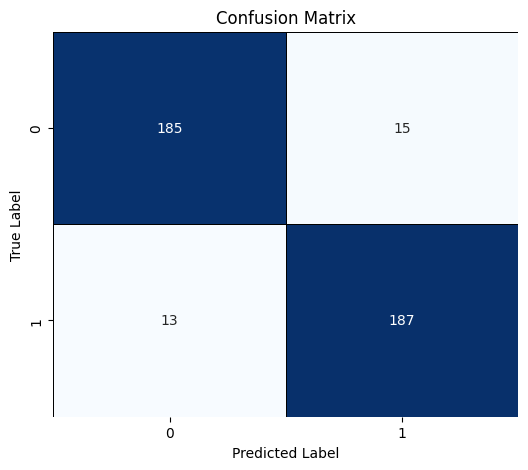


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       200
           1       0.93      0.94      0.93       200

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



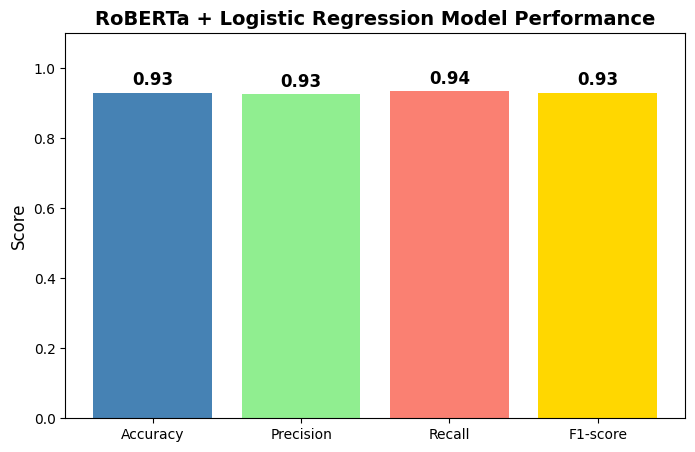

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
y_pred = logreg_model.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc_score:.4f}")
print(f"Precision: {prec_score:.4f}")
print(f"Recall: {rec_score:.4f}")
print(f"F1-score: {f1:.4f}")


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['steelblue','lightgreen','salmon','gold'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("RoBERTa + Logistic Regression Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


# **ROBERTa + XGBOOST**

[INFO] Loading RoBERTa model...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


[INFO] Tokenizing sentences...
[INFO] Computing RoBERTa embeddings in batches...


Embedding Batches: 100%|██████████| 125/125 [51:09<00:00, 24.55s/it]


[INFO] Embeddings shape: (1998, 768)
[INFO] Training XGBoost classifier...

Accuracy: 0.9200
Precision: 0.9118
Recall: 0.9300
F1-score: 0.9208


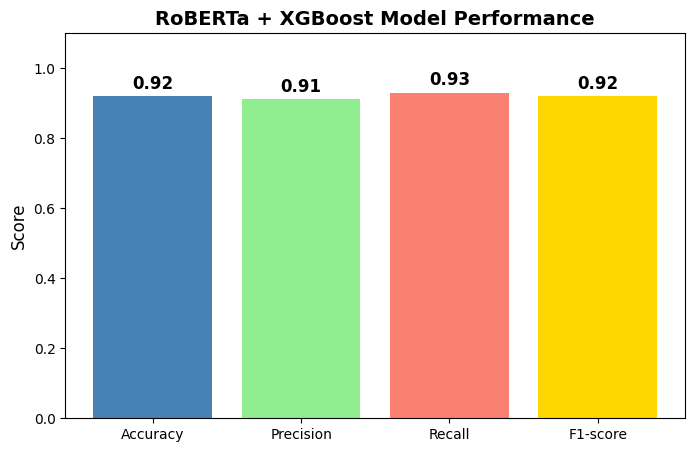

In [ ]:
from transformers import RobertaTokenizer, TFRobertaModel
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from xgboost import XGBClassifier


MAX_LEN = 256
BATCH_SIZE = 16


print("[INFO] Loading RoBERTa model...")
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
roberta_model = TFRobertaModel.from_pretrained("roberta-base", from_pt=True)

# Freeze all layers to save memory
for layer in roberta_model.layers:
    layer.trainable = False


print("[INFO] Tokenizing sentences...")
encodings = tokenizer(
    list(X_cleaned),
    truncation=True,
    padding=True,
    max_length=MAX_LEN,
    return_tensors="tf"
)

input_ids = encodings["input_ids"]
attention_mask = encodings["attention_mask"]
y = np.array(y_cleaned)


print("[INFO] Computing RoBERTa embeddings in batches...")
embeddings_list = []
dataset = tf.data.Dataset.from_tensor_slices((input_ids, attention_mask)).batch(BATCH_SIZE)


for batch_input_ids, batch_attention_mask in tqdm(dataset, desc="Embedding Batches"):
    outputs = roberta_model(batch_input_ids, attention_mask=batch_attention_mask)

    batch_embeddings = tf.reduce_mean(outputs.last_hidden_state, axis=1)
    embeddings_list.append(batch_embeddings)

embeddings = tf.concat(embeddings_list, axis=0).numpy()
print(f"[INFO] Embeddings shape: {embeddings.shape}")

X = embeddings


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


print("[INFO] Training XGBoost classifier...")
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method="gpu_hist" if tf.config.list_physical_devices('GPU') else "hist",
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_model.fit(X_train, y_train)



y_pred = xgb_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")


metrics = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, metrics, color=['steelblue', 'lightgreen', 'salmon', 'gold'])
for bar, score in zip(bars, metrics):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0, 1.1)
plt.title("RoBERTa + XGBoost Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


Accuracy: 0.5275
Precision: 0.5141
Recall: 1.0000
F1-score: 0.6791


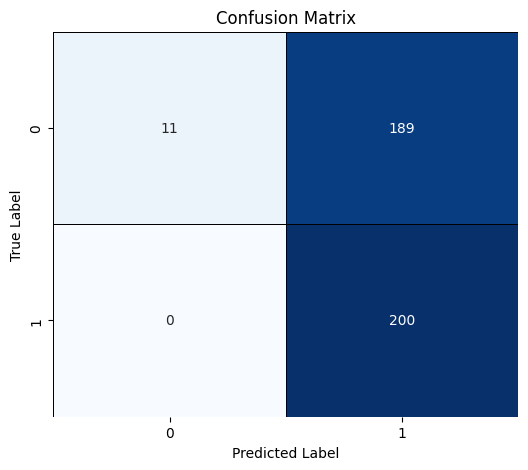


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.06      0.10       200
           1       0.51      1.00      0.68       200

    accuracy                           0.53       400
   macro avg       0.76      0.53      0.39       400
weighted avg       0.76      0.53      0.39       400



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
y_pred = logreg_model.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc_score:.4f}")
print(f"Precision: {prec_score:.4f}")
print(f"Recall: {rec_score:.4f}")
print(f"F1-score: {f1:.4f}")


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



# **ROBERTA + LIGHTgbm**

[INFO] Loading RoBERTa model...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


[INFO] Tokenizing sentences...
[INFO] Computing RoBERTa embeddings in batches...


Embedding Batches: 100%|██████████| 125/125 [50:36<00:00, 24.29s/it]


[INFO] Embeddings shape: (1998, 768)
[INFO] Training LightGBM classifier...
[LightGBM] [Info] Number of positive: 800, number of negative: 798
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057741 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195840
[LightGBM] [Info] Number of data points in the train set: 1598, number of used features: 768
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500626 -> initscore=0.002503
[LightGBM] [Info] Start training from score 0.002503
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

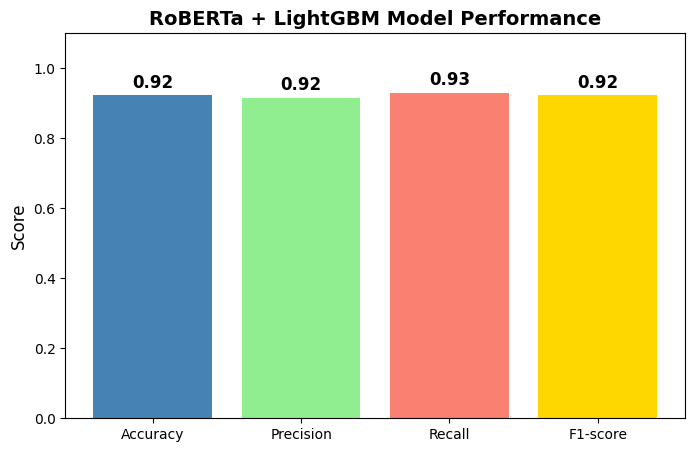

In [ ]:
from transformers import RobertaTokenizer, TFRobertaModel
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from lightgbm import LGBMClassifier


MAX_LEN = 256
BATCH_SIZE = 16


print("[INFO] Loading RoBERTa model...")
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
roberta_model = TFRobertaModel.from_pretrained("roberta-base", from_pt=True)

# Freeze all layers to save memory
for layer in roberta_model.layers:
    layer.trainable = False


print("[INFO] Tokenizing sentences...")
encodings = tokenizer(
    list(X_cleaned),
    truncation=True,
    padding=True,
    max_length=MAX_LEN,
    return_tensors="tf"
)

input_ids = encodings["input_ids"]
attention_mask = encodings["attention_mask"]
y = np.array(y_cleaned)


print("[INFO] Computing RoBERTa embeddings in batches...")
embeddings_list = []
dataset = tf.data.Dataset.from_tensor_slices((input_ids, attention_mask)).batch(BATCH_SIZE)


for batch_input_ids, batch_attention_mask in tqdm(dataset, desc="Embedding Batches"):
    outputs = roberta_model(batch_input_ids, attention_mask=batch_attention_mask)
    # Mean pooling over sequence length
    batch_embeddings = tf.reduce_mean(outputs.last_hidden_state, axis=1)
    embeddings_list.append(batch_embeddings)

embeddings = tf.concat(embeddings_list, axis=0).numpy()
print(f"[INFO] Embeddings shape: {embeddings.shape}")  # (num_samples, 768)

X = embeddings

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("[INFO] Training LightGBM classifier...")
lgbm_model = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=64,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    boosting_type='gbdt',
    device='gpu' if tf.config.list_physical_devices('GPU') else 'cpu'
)

lgbm_model.fit(X_train, y_train)


y_pred = lgbm_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")


metrics = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, metrics, color=['steelblue', 'lightgreen', 'salmon', 'gold'])
for bar, score in zip(bars, metrics):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0, 1.1)
plt.title("RoBERTa + LightGBM Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


Accuracy: 0.9225
Precision: 0.9163
Recall: 0.9300
F1-score: 0.9231


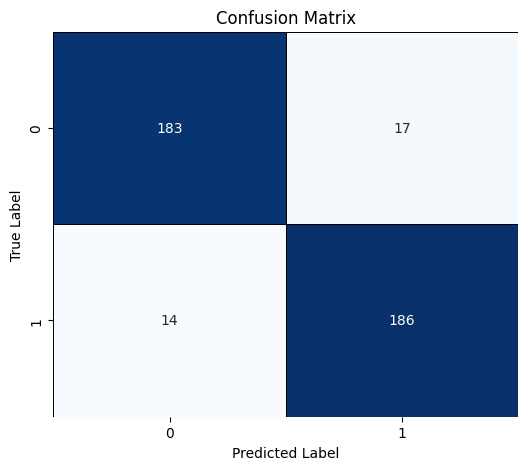


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       200
           1       0.92      0.93      0.92       200

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400


Accuracy: 0.9225
Precision: 0.9163
Recall: 0.9300
F1-score: 0.9231


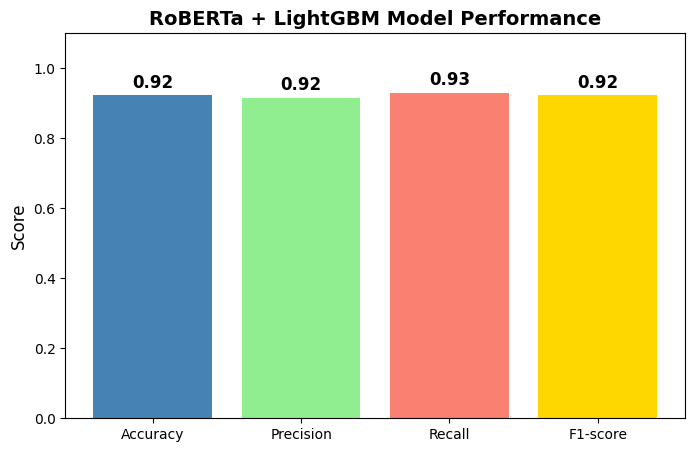

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
y_pred = lgbm_model.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc_score:.4f}")
print(f"Precision: {prec_score:.4f}")
print(f"Recall: {rec_score:.4f}")
print(f"F1-score: {f1:.4f}")


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")


metrics = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, metrics, color=['steelblue', 'lightgreen', 'salmon', 'gold'])
for bar, score in zip(bars, metrics):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0, 1.1)
plt.title("RoBERTa + LightGBM Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()



# **GLOVE EMBEDDING SYSTEM**

| Model                       | Dim     | Memory       | Speed        | Best for                                |
| --------------------------- | ------- | ------------ | ------------ | --------------------------------------- |
| glove-wiki-gigaword-50      | 50      | Fastest      | Fast         | Simple short-text tasks                 |
| **glove-wiki-gigaword-100** | **100** | **Moderate** | **Balanced** | **Tweets, comments, social media text** |
| glove-wiki-gigaword-200     | 200     | Slower       | Medium       | Sentiment or topic tasks                |
| glove-wiki-gigaword-300     | 300     | Heaviest     | Slow         | Large corpus + deep semantic tasks      |


**GloVe** (Global Vectors for Word Representation) is a static word embedding method created by Stanford.

**Key points:**

Each word is represented by a fixed vector (e.g., 50, 100, 200, 300 dimensions).

Trained on word co-occurrence statistics in a large corpus (e.g., Wikipedia + Gigaword).

**Captures general semantic meaning, e.g.:**
vec("king") - vec("man") + vec("woman") ≈ vec("queen")
Fast and lightweight.

**Static**: Same vector for a word in any context.

**Pros:**

Simple to use.

Works well for small datasets.

Low memory usage compared to transformers.

**Cons:**

Cannot handle contextual meaning (e.g., “bank” as river vs. money).

Cannot understand polysemy or sarcasm easily.

| Feature                   | GloVe                        | BERT                             |
| ------------------------- | ---------------------------- | -------------------------------- |
| Type                      | Static embeddings            | Contextual embeddings            |
| Word vector dimension     | 50, 100, 200, 300            | 768 (base) / 1024 (large)        |
| Context awareness         | No                           | Yes                              |
| Training data             | Wikipedia + Gigaword         | Wikipedia + BookCorpus           |
| Computational cost        | Low                          | High                             |
| Memory usage              | Low                          | High                             |
| Best for                  | Small datasets, simple tasks | Large datasets, contextual tasks |
| Handling polysemy/sarcasm | Poor                         | Excellent                        |


We use **Gensim** because it’s a powerful Python library for **natural language processing (NLP)**, especially for handling **word embeddings and topic modeling** efficiently. Let me break it down clearly:

---

## **1️⃣ Main Reasons to Use Gensim**

### **a) Pretrained Word Embeddings**

* Gensim provides easy access to pretrained embeddings like **GloVe, Word2Vec, FastText**.
* You can **load embeddings** quickly and convert words to vectors.

```python
import gensim.downloader as api
glove = api.load("glove-wiki-gigaword-100")
vector = glove['king']  # get 100-dim vector for 'king'
```

---

### **b) Efficient Memory Usage**

* Handles **large text corpora** without loading everything into memory.
* Streams data and builds models incrementally, which is **faster and memory-friendly** than vanilla Python methods.

---

### **c) Unsupervised NLP Models**

* Supports training your own **Word2Vec**, **FastText**, **Doc2Vec** models on custom text.
* Good for **semantic similarity, clustering, topic modeling**.

```python
from gensim.models import Word2Vec
sentences = [["i", "love", "nlp"], ["nlp", "is", "fun"]]
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1)
```

---

### **d) Semantic Similarity**

* Find **similar words** or **word relationships** easily.

```python
glove.most_similar('king')
# Returns words like 'queen', 'prince', etc.
```

---

### **e) Easy Integration with ML Pipelines**

* Gensim vectors can be used as input to **scikit-learn, XGBoost, LightGBM**, etc.
* Works well when you want **classic ML algorithms instead of deep learning**.

---

## **2️⃣ Why Gensim for GloVe?**

* GloVe embeddings come as **pretrained vector files**.
* Gensim makes it **easy to load, query, and manipulate these vectors** without manually parsing the files.
* Efficient for datasets like **tweets or comments**, where you might average word vectors to get sentence embeddings.

---

💡 **Summary:**

* Use **Gensim** to **load embeddings**, **train Word2Vec/Doc2Vec**, **compute similarity**, and integrate into ML pipelines efficiently.
* It’s lightweight, memory-efficient, and great for **classic ML approaches** with embeddings.

---




**Gensim**

In [ ]:
!pip install --upgrade gensim==4.3.3


In [ ]:
import numpy as np
import gensim

print("NumPy version:", np.__version__)
print("Gensim version:", gensim.__version__)


NumPy version: 1.26.4
Gensim version: 4.3.3


[INFO] Loading GloVe embeddings (may take a minute)...
[==================================================] 100.0% 252.1/252.1MB downloaded
[INFO] Generating GloVe embeddings for all texts...


100%|██████████| 2010/2010 [00:00<00:00, 6965.58it/s]


[INFO] Embedding shape: (2010, 200)
[INFO] Training LightGBM model...
[LightGBM] [Info] Number of positive: 804, number of negative: 804
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003857 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 1608, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


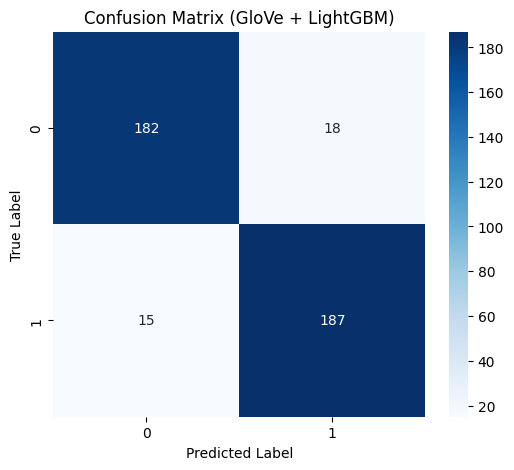


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       200
           1       0.91      0.93      0.92       202

    accuracy                           0.92       402
   macro avg       0.92      0.92      0.92       402
weighted avg       0.92      0.92      0.92       402



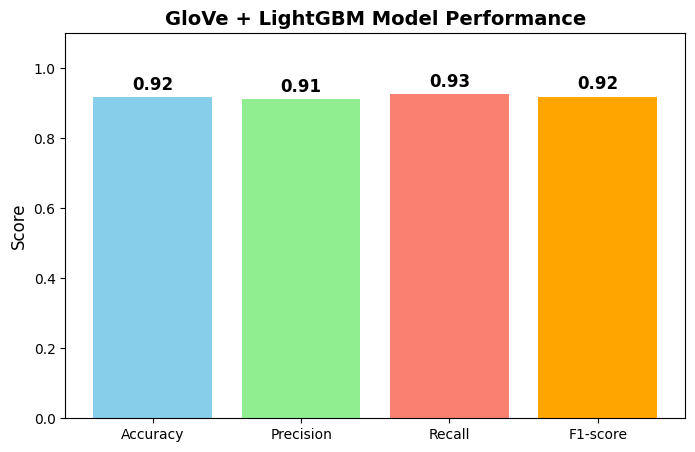

In [ ]:
import numpy as np
import gensim.downloader as api
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


print("[INFO] Loading GloVe embeddings (may take a minute)...")
glove = api.load("glove-wiki-gigaword-200")  # 100D GloVe vectors

# ---------------- TEXT TO VECTOR FUNCTION ----------------
def sentence_to_glove_vector(sentence):
    words = sentence.split()
    word_vecs = [glove[word] for word in words if word in glove]
    if len(word_vecs) == 0:
        return np.zeros(100)  # empty sentence fallback
    return np.mean(word_vecs, axis=0)


print("[INFO] Generating GloVe embeddings for all texts...")
X_vectors = np.array([sentence_to_glove_vector(text) for text in tqdm(X_cleaned)])
y = np.array(y_cleaned)

print(f"[INFO] Embedding shape: {X_vectors.shape}")


X_train, X_test, y_train, y_test = train_test_split(
    X_vectors, y, test_size=0.2, random_state=42
)


print("[INFO] Training LightGBM model...")
lgbm_clf = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgbm_clf.fit(X_train, y_train)
y_pred = lgbm_clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (GloVe + LightGBM)')
plt.show()


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("GloVe + LightGBM Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


# **GLOVE + XGBOOST**

In [ ]:
import numpy as np
import gensim.downloader as api
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

print("[INFO] Loading GloVe embeddings (may take a minute)...")
glove = api.load("glove-wiki-gigaword-200")  # 200D GloVe vectors

def sentence_to_glove_vector(sentence):
    words = sentence.split()
    word_vecs = [glove[word] for word in words if word in glove]
    if len(word_vecs) == 0:
        return np.zeros(200)  # empty sentence fallback
    return np.mean(word_vecs, axis=0)


print("[INFO] Generating GloVe embeddings for all texts...")
X_vectors = np.array([sentence_to_glove_vector(text) for text in tqdm(X_cleaned)])
y = np.array(y_cleaned)

print(f"[INFO] Embedding shape: {X_vectors.shape}")


X_train, X_test, y_train, y_test = train_test_split(
    X_vectors, y, test_size=0.2, random_state=42
)


print("[INFO] Training XGBoost model...")
xgb_clf = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_clf.fit(X_train, y_train)


[INFO] Loading GloVe embeddings (may take a minute)...
[INFO] Generating GloVe embeddings for all texts...


100%|██████████| 2010/2010 [00:00<00:00, 2066.38it/s]


[INFO] Embedding shape: (2010, 200)
[INFO] Training XGBoost model...


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

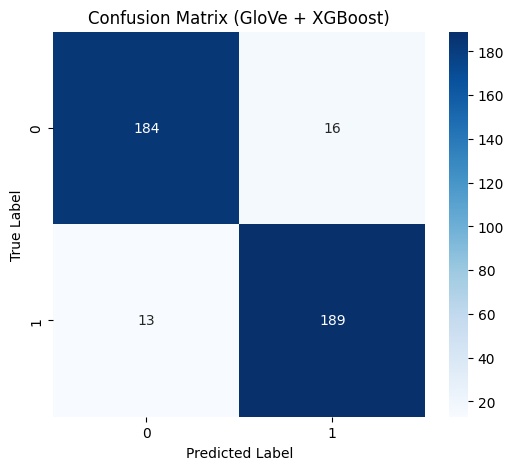


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       200
           1       0.92      0.94      0.93       202

    accuracy                           0.93       402
   macro avg       0.93      0.93      0.93       402
weighted avg       0.93      0.93      0.93       402



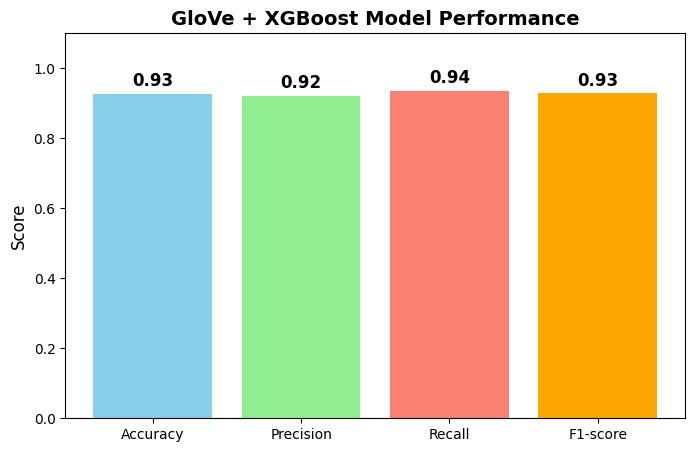

In [ ]:
y_pred = xgb_clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (GloVe + XGBoost)')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("GloVe + XGBoost Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


# **GLOVE + Logistic regression**

In [ ]:
import numpy as np
import gensim.downloader as api
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

print("[INFO] Loading GloVe embeddings (may take a minute)...")
glove = api.load("glove-wiki-gigaword-200")  # 200D GloVe vectors

def sentence_to_glove_vector(sentence):
    words = sentence.split()
    word_vecs = [glove[word] for word in words if word in glove]
    if len(word_vecs) == 0:
        return np.zeros(200)  # empty sentence fallback
    return np.mean(word_vecs, axis=0)


print("[INFO] Generating GloVe embeddings for all texts...")
X_vectors = np.array([sentence_to_glove_vector(text) for text in tqdm(X_cleaned)])
y = np.array(y_cleaned)

print(f"[INFO] Embedding shape: {X_vectors.shape}")


X_train, X_test, y_train, y_test = train_test_split(
    X_vectors, y, test_size=0.2, random_state=42
)


print("[INFO] Training Logistic Regression model...")
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)


[INFO] Loading GloVe embeddings (may take a minute)...
[INFO] Generating GloVe embeddings for all texts...


100%|██████████| 2010/2010 [00:00<00:00, 3653.29it/s]

[INFO] Embedding shape: (2010, 200)
[INFO] Training Logistic Regression model...


LogisticRegression(max_iter=1000, random_state=42)

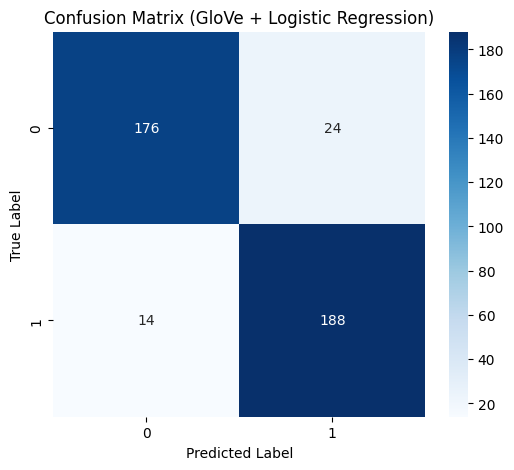


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       200
           1       0.89      0.93      0.91       202

    accuracy                           0.91       402
   macro avg       0.91      0.91      0.91       402
weighted avg       0.91      0.91      0.91       402



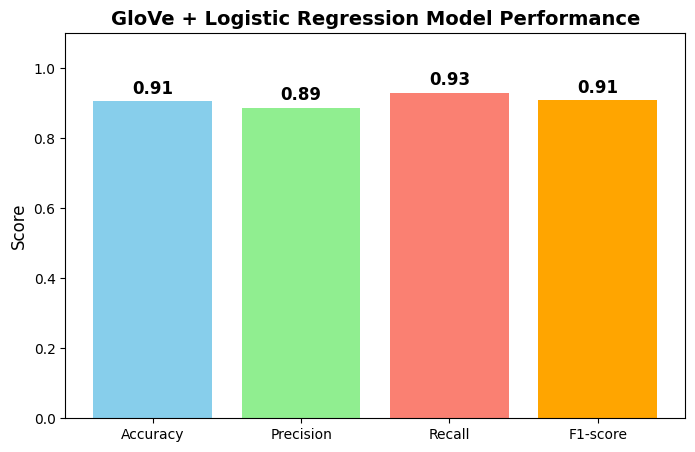

In [ ]:
y_pred = clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (GloVe + Logistic Regression)')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("GloVe + Logistic Regression Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


# **GLOVE + Randomforest**

In [ ]:
import numpy as np
import gensim.downloader as api
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

print("[INFO] Loading GloVe embeddings (may take a minute)...")
glove = api.load("glove-wiki-gigaword-200")  # 200D GloVe vectors


def sentence_to_glove_vector(sentence):
    words = sentence.split()
    word_vecs = [glove[word] for word in words if word in glove]
    if len(word_vecs) == 0:
        return np.zeros(200)  # empty sentence fallback
    return np.mean(word_vecs, axis=0)


print("[INFO] Generating GloVe embeddings for all texts...")
X_vectors = np.array([sentence_to_glove_vector(text) for text in tqdm(X_cleaned)])
y = np.array(y_cleaned)

print(f"[INFO] Embedding shape: {X_vectors.shape}")


X_train, X_test, y_train, y_test = train_test_split(
    X_vectors, y, test_size=0.2, random_state=42
)


print("[INFO] Training Random Forest model...")
rf_clf = RandomForestClassifier(
    n_estimators=300,      # number of trees
    max_depth=None,        # no depth limit
    random_state=42,
    n_jobs=-1              # use all CPU cores
)
rf_clf.fit(X_train, y_train)


[INFO] Loading GloVe embeddings (may take a minute)...
[INFO] Generating GloVe embeddings for all texts...


100%|██████████| 2010/2010 [00:00<00:00, 3932.85it/s]


[INFO] Embedding shape: (2010, 200)
[INFO] Training Random Forest model...


RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

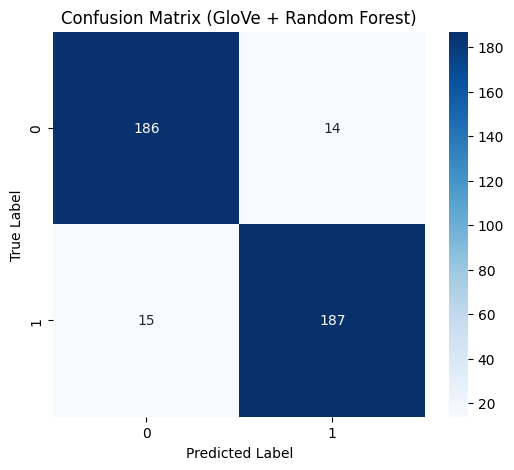


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       200
           1       0.93      0.93      0.93       202

    accuracy                           0.93       402
   macro avg       0.93      0.93      0.93       402
weighted avg       0.93      0.93      0.93       402



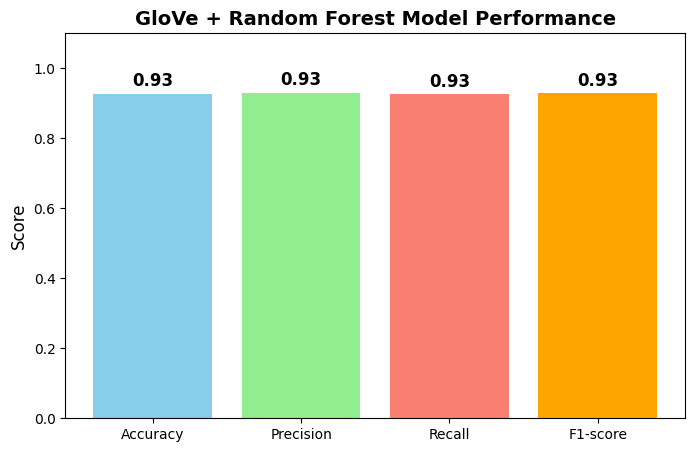

In [ ]:
y_pred = rf_clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (GloVe + Random Forest)')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("GloVe + Random Forest Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


# **GLOVE + LSTM**

In [ ]:
import numpy as np
import gensim.downloader as api
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

MAX_LEN = 256
EMBEDDING_DIM = 200
BATCH_SIZE = 32
EPOCHS = 15
DROPOUT_RATE = 0.5
L2_REG = 1e-4
VALIDATION_SPLIT = 0.2

print("[INFO] Loading GloVe embeddings (may take a while)...")
glove = api.load("glove-wiki-gigaword-200")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_cleaned)
sequences = tokenizer.texts_to_sequences(X_cleaned)
word_index = tokenizer.word_index
X_padded = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')

vocab_size = len(word_index) + 1

embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    if word in glove:
        embedding_matrix[i] = glove[word]

y = np.array(y_cleaned)
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=VALIDATION_SPLIT, random_state=42)

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_LEN, trainable=False))
model.add(LSTM(64, return_sequences=False, kernel_regularizer=regularizers.l2(L2_REG)))
model.add(Dropout(DROPOUT_RATE))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(L2_REG)))
model.add(Dropout(DROPOUT_RATE))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
print("[INFO] Training started...")
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stop], verbose=1)

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")


Epoch 1/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 45s 630ms/step - accuracy: 0.5615 - loss: 0.7077 - val_accuracy: 0.5970 - val_loss: 0.6603
Epoch 2/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 28s 553ms/step - accuracy: 0.5971 - loss: 0.6655 - val_accuracy: 0.5920 - val_loss: 0.6532
Epoch 3/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 32s 625ms/step - accuracy: 0.5856 - loss: 0.6596 - val_accuracy: 0.6095 - val_loss: 0.6359
Epoch 4/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 33s 656ms/step - accuracy: 0.6273 - loss: 0.6906 - val_accuracy: 0.5970 - val_loss: 0.6470
Epoch 5/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 23s 445ms/step - accuracy: 0.5798 - loss: 0.6558 - val_accuracy: 0.6070 - val_loss: 0.6354
Epoch 6/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 39s 401ms/step - accuracy: 0.6770 - loss: 0.6134 - val_accuracy: 0.7836 - val_loss: 0.4371
Epoch 7/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 26s 511ms/step - accuracy: 0.8719 - loss: 0.3922 - val_accuracy: 0.7861 - val_loss: 0.4265
Epoch 8/15
51/51 ━━━━━━━━━━━━━━━━━━━━ 35s 392ms/step - accuracy: 0.7766 - loss: 0.4490 - val_accu

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


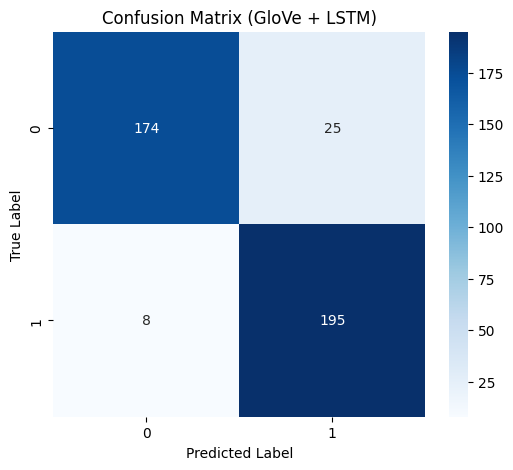


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       199
           1       0.89      0.96      0.92       203

    accuracy                           0.92       402
   macro avg       0.92      0.92      0.92       402
weighted avg       0.92      0.92      0.92       402



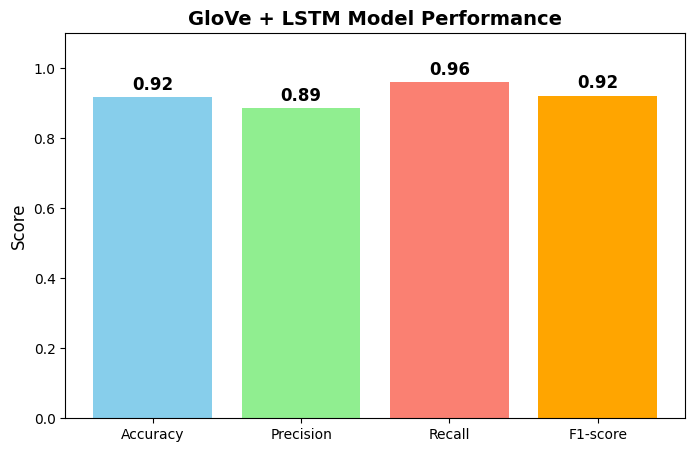

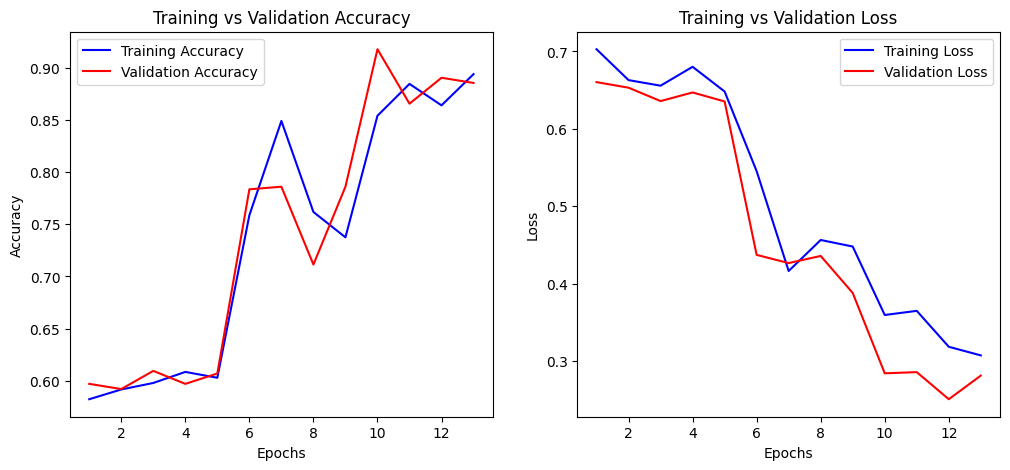

In [ ]:

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (GloVe + LSTM)')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("GloVe + LSTM Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



# **GLOVE + BILSTM**

In [ ]:

import numpy as np
import gensim.downloader as api
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras import regularizers


MAX_LEN = 256
EMBEDDING_DIM = 200
BATCH_SIZE = 32
EPOCHS = 10


print("[INFO] Loading GloVe embeddings (may take a while)...")
glove = api.load("glove-wiki-gigaword-200")


def sentence_to_glove_sequence(sentence, max_len=MAX_LEN):
    words = sentence.split()
    vecs = [glove[word] for word in words if word in glove]
    if len(vecs) == 0:  # fallback for empty sentence
        vecs = [np.zeros(EMBEDDING_DIM)]
    return vecs


print("[INFO] Generating GloVe sequences for all texts...")
X_seq = [sentence_to_glove_sequence(text) for text in X_cleaned]


X_padded = pad_sequences(
    X_seq,
    maxlen=MAX_LEN,
    dtype='float32',
    padding='post',
    truncating='post',
    value=0.0
)

y = np.array(y_cleaned)
print(f"[INFO] Shape of padded sequences: {X_padded.shape}")


X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y, test_size=0.2, random_state=42
)


model = Sequential()
model.add(Bidirectional(
    LSTM(64, return_sequences=False, kernel_regularizer=regularizers.l2(3e-5)),
    input_shape=(MAX_LEN, EMBEDDING_DIM)
))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


print("[INFO] Training started...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)


[INFO] Loading GloVe embeddings (may take a while)...
[INFO] Generating GloVe sequences for all texts...
[INFO] Shape of padded sequences: (2006, 256, 200)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 128)            │       135,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144,001 (562.50 KB)

 Trainable params: 144,001 (562.50 KB)

 Non-trainable params: 0 (0.00 B)

[INFO] Training started...
Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 48s 830ms/step - accuracy: 0.7172 - loss: 0.5748 - val_accuracy: 0.8881 - val_loss: 0.3521
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 61s 404ms/step - accuracy: 0.8959 - loss: 0.3202 - val_accuracy: 0.9353 - val_loss: 0.1996
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 41s 417ms/step - accuracy: 0.9320 - loss: 0.2078 - val_accuracy: 0.9403 - val_loss: 0.1897
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 21s 404ms/step - accuracy: 0.9453 - loss: 0.1872 - val_accuracy: 0.9403 - val_loss: 0.1843
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 41s 406ms/step - accuracy: 0.9560 - loss: 0.1623 - val_accuracy: 0.9502 - val_loss: 0.1684
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 24s 468ms/step - accuracy: 0.9530 - loss: 0.1684 - val_accuracy: 0.9353 - val_loss: 0.1850
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 40s 442ms/step - accuracy: 0.9562 - loss: 0.1643 - val_accuracy: 0.8930 - val_loss: 0.3269
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 46s 920ms/step - accuracy: 0.942

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 705ms/step


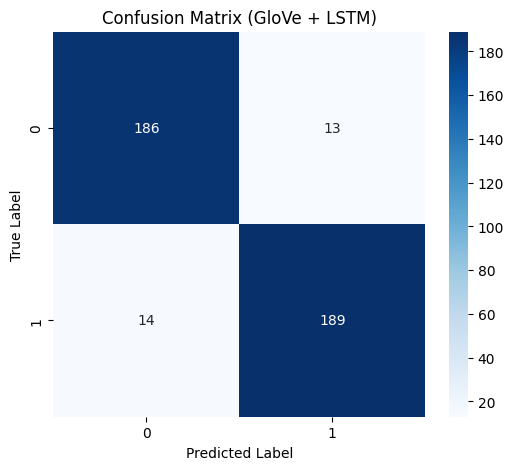


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       199
           1       0.94      0.93      0.93       203

    accuracy                           0.93       402
   macro avg       0.93      0.93      0.93       402
weighted avg       0.93      0.93      0.93       402



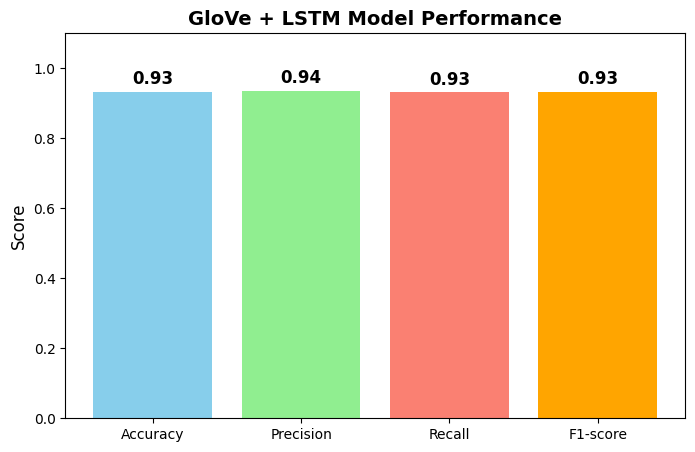

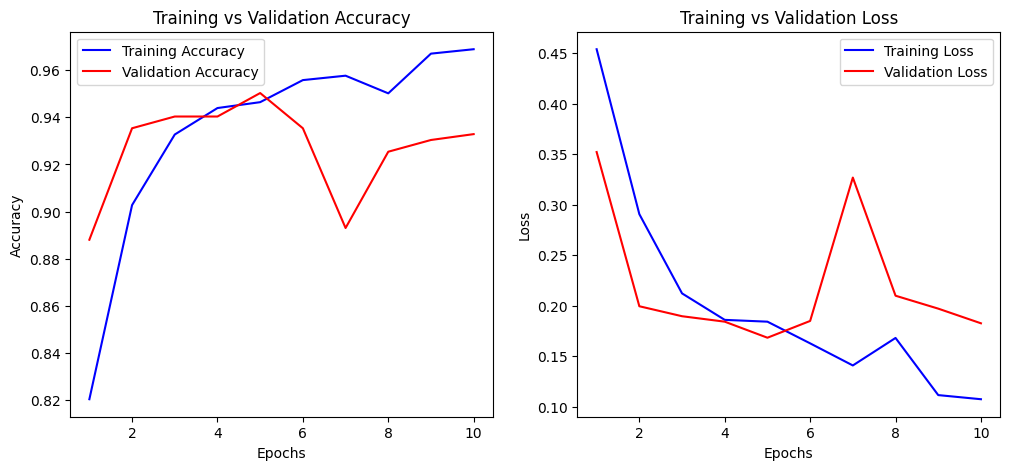

In [ ]:

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (GloVe + LSTM)')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("GloVe + LSTM Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



# **GLOVE + GRU**

In [ ]:
import numpy as np
import gensim.downloader as api
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras import regularizers

MAX_LEN = 256
EMBEDDING_DIM = 200
BATCH_SIZE = 32
EPOCHS = 10

print("[INFO] Loading GloVe embeddings (may take a while)...")
glove = api.load("glove-wiki-gigaword-200")

def sentence_to_glove_sequence(sentence, max_len=MAX_LEN):
    words = sentence.split()
    vecs = [glove[word] for word in words if word in glove]
    if len(vecs) == 0:
        vecs = [np.zeros(EMBEDDING_DIM)]
    return vecs

print("[INFO] Generating GloVe sequences for all texts...")
X_seq = [sentence_to_glove_sequence(text) for text in X_cleaned]

X_padded = pad_sequences(
    X_seq,
    maxlen=MAX_LEN,
    dtype='float32',
    padding='post',
    truncating='post',
    value=0.0
)

y = np.array(y_cleaned)
print(f"[INFO] Shape of padded sequences: {X_padded.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y, test_size=0.2, random_state=42
)

model = Sequential()
model.add(GRU(
    64,
    return_sequences=False,
    kernel_regularizer=regularizers.l2(1e-4),
    input_shape=(MAX_LEN, EMBEDDING_DIM)
))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

print("[INFO] Training started...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)


[INFO] Loading GloVe embeddings (may take a while)...
[INFO] Generating GloVe sequences for all texts...
[INFO] Shape of padded sequences: (2000, 256, 200)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 64)             │        51,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,297 (216.00 KB)

 Trainable params: 55,297 (216.00 KB)

 Non-trainable params: 0 (0.00 B)

[INFO] Training started...
Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.5136 - loss: 0.7012 - val_accuracy: 0.5550 - val_loss: 0.6812
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.5661 - loss: 0.6632 - val_accuracy: 0.6150 - val_loss: 0.6352
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6168 - loss: 0.8410 - val_accuracy: 0.5650 - val_loss: 0.6708
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5982 - loss: 0.6532 - val_accuracy: 0.6175 - val_loss: 0.6384
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7751 - loss: 0.5510 - val_accuracy: 0.7850 - val_loss: 0.4870
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8545 - loss: 0.3960 - val_accuracy: 0.9025 - val_loss: 0.3136
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9405 - loss: 0.2251 - val_accuracy: 0.9075 - val_loss: 0.2726
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9472 - loss: 0.2083

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


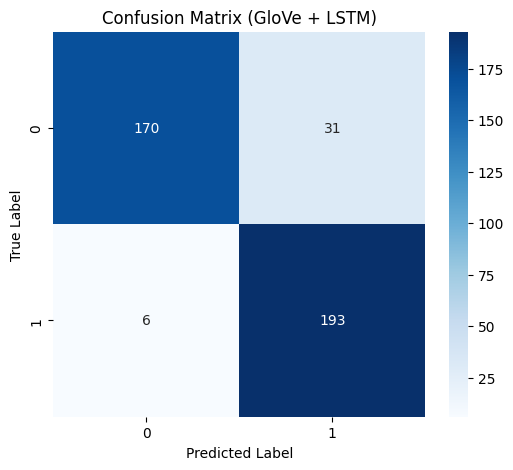


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.90       201
           1       0.86      0.97      0.91       199

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



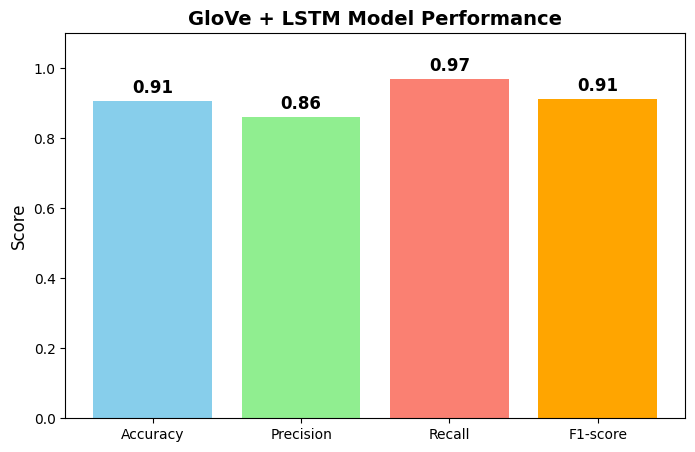

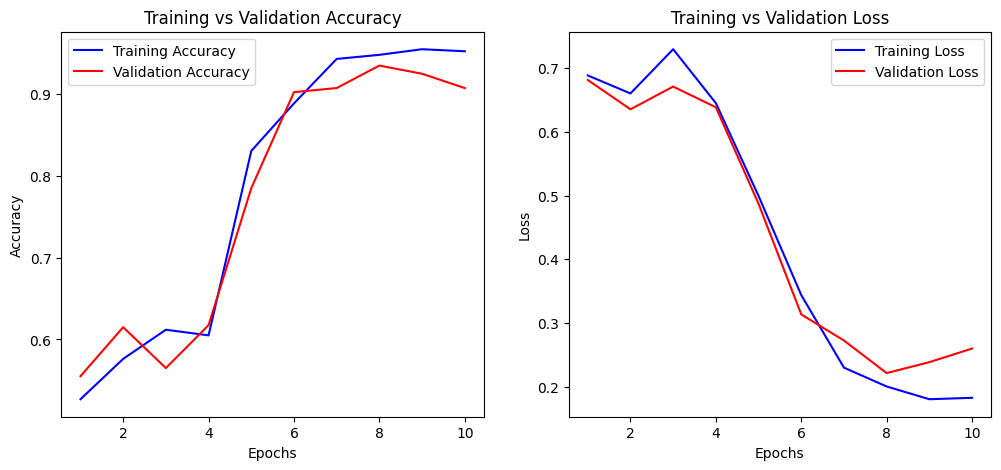

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (GloVe + LSTM)')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("GloVe + LSTM Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



# **GLOVE + BIGRU**

In [ ]:
import numpy as np
import gensim.downloader as api
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Bidirectional
from tensorflow.keras import regularizers


MAX_LEN = 256
EMBEDDING_DIM = 200
BATCH_SIZE = 32
EPOCHS = 10

print("[INFO] Loading GloVe embeddings (may take a while)...")
glove = api.load("glove-wiki-gigaword-200")


def sentence_to_glove_sequence(sentence, max_len=MAX_LEN):
    words = sentence.split()
    vecs = [glove[word] for word in words if word in glove]
    if len(vecs) == 0:
        vecs = [np.zeros(EMBEDDING_DIM)]
    return vecs


print("[INFO] Generating GloVe sequences for all texts...")
X_seq = [sentence_to_glove_sequence(text) for text in X_cleaned]

X_padded = pad_sequences(
    X_seq,
    maxlen=MAX_LEN,
    dtype='float32',
    padding='post',
    truncating='post',
    value=0.0
)

y = np.array(y_cleaned)
print(f"[INFO] Shape of padded sequences: {X_padded.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y, test_size=0.2, random_state=42
)

model = Sequential()
model.add(Bidirectional(
    GRU(64, return_sequences=False, kernel_regularizer=regularizers.l2(1e-4)),
    input_shape=(MAX_LEN, EMBEDDING_DIM)
))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

print("[INFO] Training started...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)


[INFO] Loading GloVe embeddings (may take a while)...
[INFO] Generating GloVe sequences for all texts...
[INFO] Shape of padded sequences: (2000, 256, 200)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 128)            │       102,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,465 (431.50 KB)

 Trainable params: 110,465 (431.50 KB)

 Non-trainable params: 0 (0.00 B)

[INFO] Training started...
Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.6340 - loss: 0.6711 - val_accuracy: 0.8050 - val_loss: 0.4886
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8516 - loss: 0.4019 - val_accuracy: 0.8775 - val_loss: 0.3952
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9196 - loss: 0.2990 - val_accuracy: 0.9050 - val_loss: 0.2883
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9476 - loss: 0.2043 - val_accuracy: 0.9175 - val_loss: 0.2715
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9612 - loss: 0.1632 - val_accuracy: 0.9175 - val_loss: 0.2520
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9581 - loss: 0.1635 - val_accuracy: 0.9025 - val_loss: 0.3140
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.9587 - loss: 0.1636 - val_accuracy: 0.9175 - val_loss: 0.2803
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9675 - loss: 0.128

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


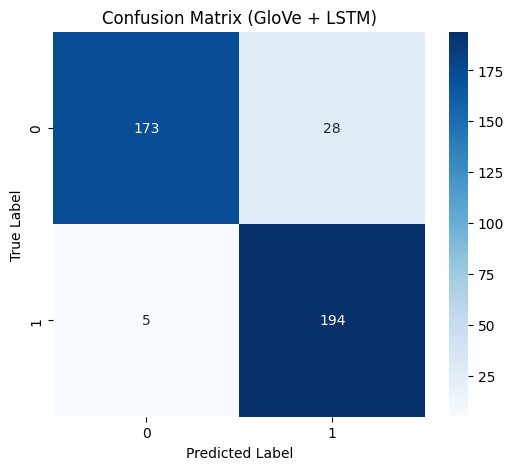


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       201
           1       0.87      0.97      0.92       199

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



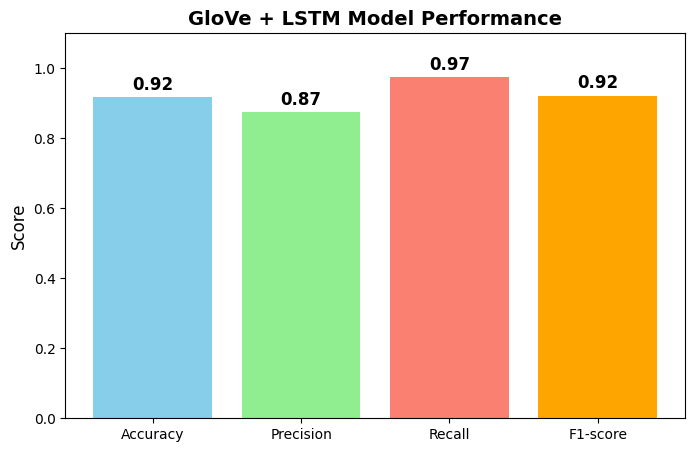

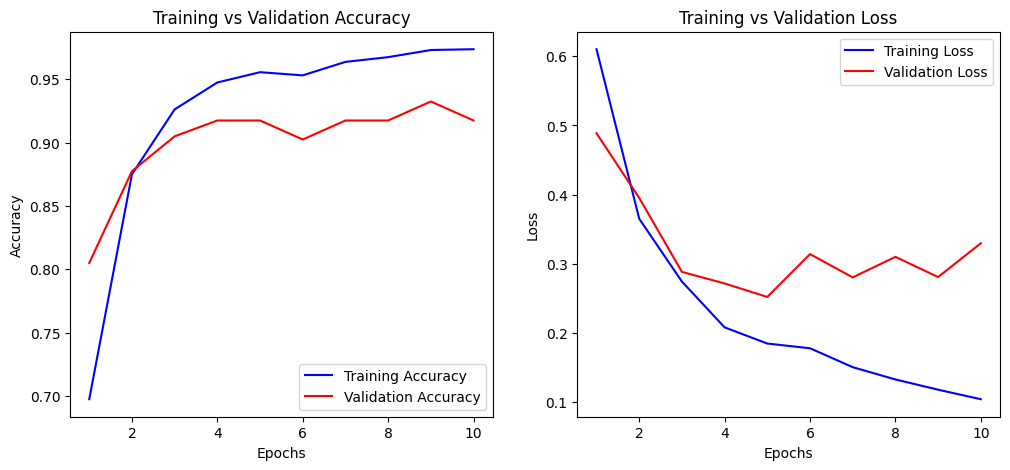

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (GloVe + LSTM)')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("GloVe + LSTM Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



# **word2vec + LSTM**

In [ ]:
!pip install --upgrade gensim==4.3.3



In [ ]:
import numpy as np
import gensim

print("NumPy version:", np.__version__)
print("Gensim version:", gensim.__version__)

NumPy version: 1.26.4
Gensim version: 4.3.3


In [ ]:

import numpy as np
import gensim.downloader as api
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


MAX_LEN = 256
EMBEDDING_DIM = 300
BATCH_SIZE = 32
EPOCHS = 10


print("[INFO] Loading word2vec embeddings (may take a while)...")
w2v = api.load("word2vec-google-news-300")


def sentence_to_w2v_sequence(sentence, max_len=MAX_LEN):
    words = sentence.split()
    vecs = [w2v[word] for word in words if word in w2v]
    if len(vecs) == 0:  # fallback for empty sentence
        vecs = [np.zeros(EMBEDDING_DIM)]
    return vecs


print("[INFO] Generating word2vec sequences for all texts...")
X_seq = [sentence_to_w2v_sequence(text) for text in X_cleaned]


X_padded = pad_sequences(
    X_seq,
    maxlen=MAX_LEN,
    dtype='float32',
    padding='post',
    truncating='post',
    value=0.0
)

y = np.array(y_cleaned)
print(f"[INFO] Shape of padded sequences: {X_padded.shape}")


X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y, test_size=0.2, random_state=42
)


model = Sequential()
model.add(LSTM(128, return_sequences=False, kernel_regularizer=regularizers.l2(1e-4),
               input_shape=(MAX_LEN, EMBEDDING_DIM)))
model.add(Dropout(0.6))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

print("[INFO] Training started...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
     callbacks=[early_stopping],
    verbose=1
)


[INFO] Loading word2vec embeddings (may take a while)...
[INFO] Generating word2vec sequences for all texts...
[INFO] Shape of padded sequences: (2006, 256, 300)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 128)            │       219,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,969 (890.50 KB)

 Trainable params: 227,969 (890.50 KB)

 Non-trainable params: 0 (0.00 B)

[INFO] Training started...
Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5915 - loss: 0.6989 - val_accuracy: 0.5597 - val_loss: 0.6754
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5807 - loss: 0.6651 - val_accuracy: 0.5647 - val_loss: 0.6708
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5977 - loss: 0.6497 - val_accuracy: 0.5597 - val_loss: 0.6663
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5635 - loss: 0.6622 - val_accuracy: 0.5622 - val_loss: 0.6654
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5792 - loss: 0.6554 - val_accuracy: 0.5672 - val_loss: 0.6650
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5879 - loss: 0.6420 - val_accuracy: 0.6816 - val_loss: 0.6015
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5867 - loss: 0.7112 - val_accuracy: 0.5647 - val_loss: 0.6617
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5956 - loss: 0.6455

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


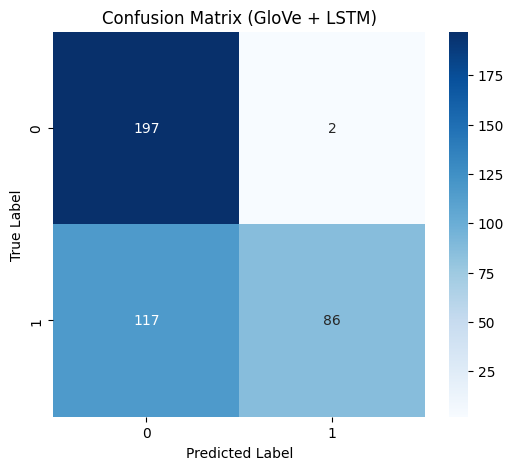


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.99      0.77       199
           1       0.98      0.42      0.59       203

    accuracy                           0.70       402
   macro avg       0.80      0.71      0.68       402
weighted avg       0.80      0.70      0.68       402



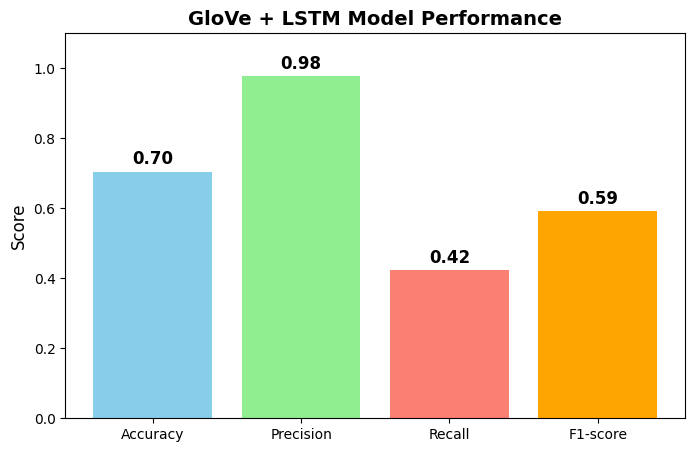

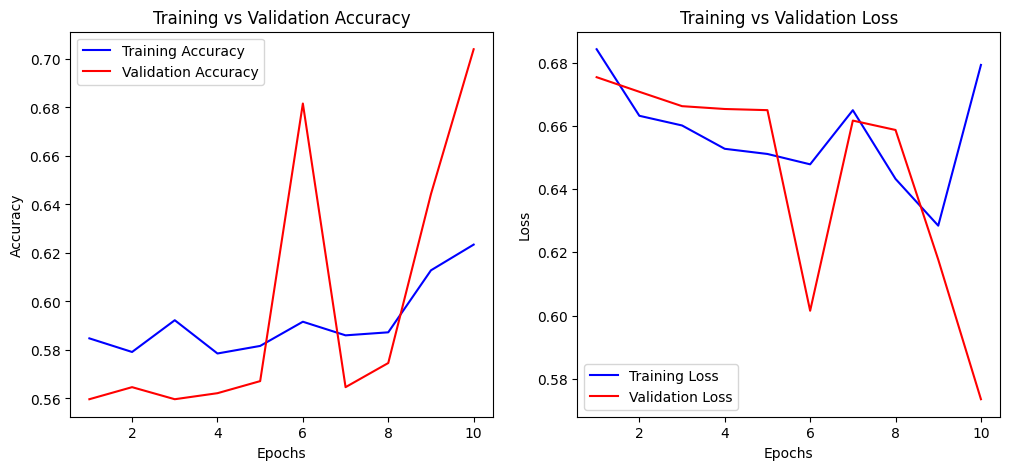

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (GloVe + LSTM)')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("GloVe + LSTM Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



# **word2vec + BILSTM**

In [ ]:

import numpy as np
import gensim.downloader as api
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


MAX_LEN = 256
EMBEDDING_DIM = 300
BATCH_SIZE = 32
EPOCHS = 10


print("[INFO] Loading word2vec embeddings (may take a while)...")
w2v = api.load("word2vec-google-news-300")


def sentence_to_w2v_sequence(sentence, max_len=MAX_LEN):
    words = sentence.split()
    vecs = [w2v[word] for word in words if word in w2v]
    if len(vecs) == 0:  # fallback for empty sentence
        vecs = [np.zeros(EMBEDDING_DIM)]
    return vecs


print("[INFO] Generating word2vec sequences for all texts...")
X_seq = [sentence_to_w2v_sequence(text) for text in X_cleaned]


X_padded = pad_sequences(
    X_seq,
    maxlen=MAX_LEN,
    dtype='float32',
    padding='post',
    truncating='post',
    value=0.0
)

y = np.array(y_cleaned)
print(f"[INFO] Shape of padded sequences: {X_padded.shape}")


X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y, test_size=0.2, random_state=42
)

model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=False, kernel_regularizer=regularizers.l2(1e-4)),
                        input_shape=(MAX_LEN, EMBEDDING_DIM)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

print("[INFO] Training started...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
     callbacks=[early_stopping],
    verbose=1
)


[INFO] Loading word2vec embeddings (may take a while)...
[INFO] Generating word2vec sequences for all texts...
[INFO] Shape of padded sequences: (2006, 256, 300)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional) │ (None, 256)            │       439,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 455,809 (1.74 MB)

 Trainable params: 455,809 (1.74 MB)

 Non-trainable params: 0 (0.00 B)

[INFO] Training started...
Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7347 - loss: 0.5950 - val_accuracy: 0.9129 - val_loss: 0.2789
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9143 - loss: 0.3225 - val_accuracy: 0.9104 - val_loss: 0.2816
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9254 - loss: 0.2633 - val_accuracy: 0.9403 - val_loss: 0.2222
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9437 - loss: 0.1655 - val_accuracy: 0.9005 - val_loss: 0.2766
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9460 - loss: 0.1655 - val_accuracy: 0.9303 - val_loss: 0.2084
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9571 - loss: 0.1450 - val_accuracy: 0.9254 - val_loss: 0.2207
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9627 - loss: 0.1302 - val_accuracy: 0.9328 - val_loss: 0.2165
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9687 - loss: 0.1156

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


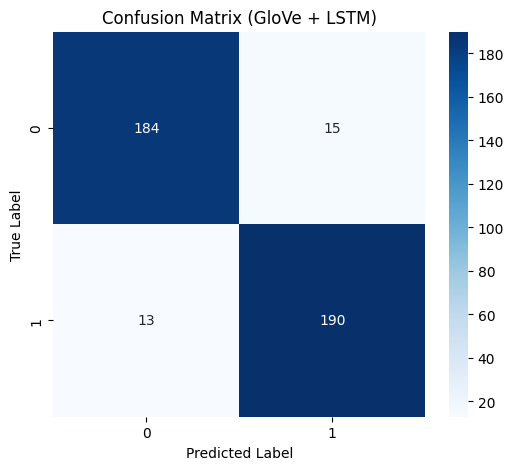


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       199
           1       0.93      0.94      0.93       203

    accuracy                           0.93       402
   macro avg       0.93      0.93      0.93       402
weighted avg       0.93      0.93      0.93       402



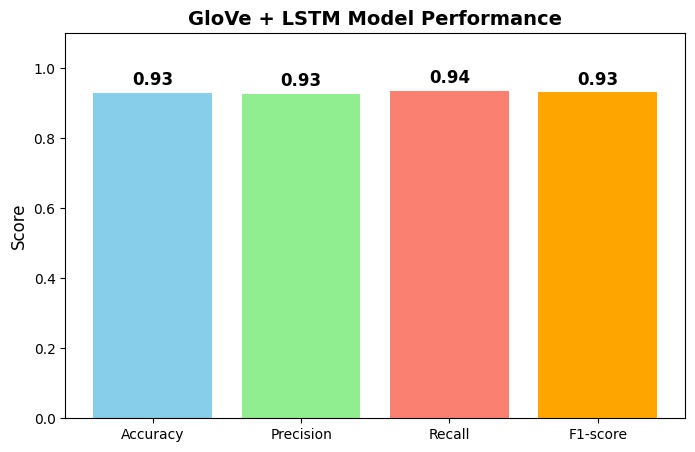

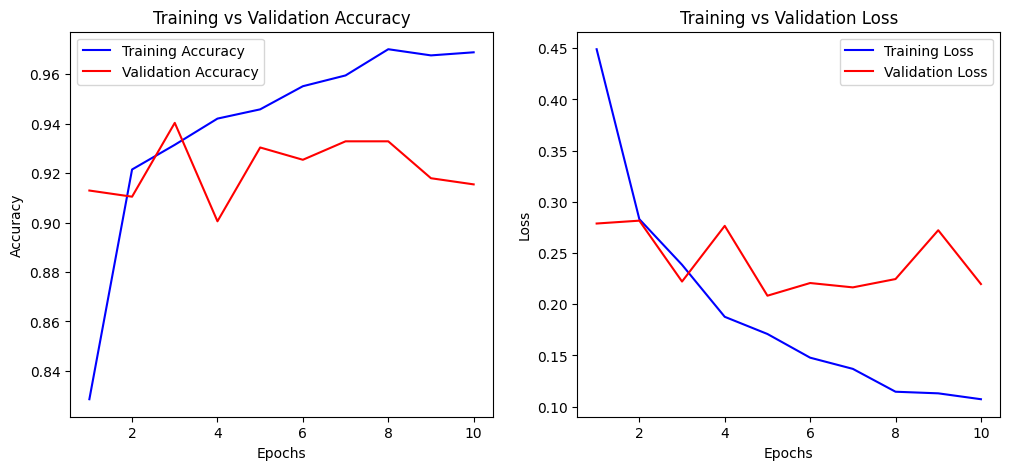

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (GloVe + LSTM)')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("GloVe + LSTM Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



# **WORD2VEC + GRU**

In [ ]:

import numpy as np
import gensim.downloader as api
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, GRU
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


MAX_LEN = 256
EMBEDDING_DIM = 300
BATCH_SIZE = 32
EPOCHS = 10


print("[INFO] Loading word2vec embeddings (may take a while)...")
w2v = api.load("word2vec-google-news-300")


def sentence_to_w2v_sequence(sentence, max_len=MAX_LEN):
    words = sentence.split()
    vecs = [w2v[word] for word in words if word in w2v]
    if len(vecs) == 0:  # fallback for empty sentence
        vecs = [np.zeros(EMBEDDING_DIM)]
    return vecs


print("[INFO] Generating word2vec sequences for all texts...")
X_seq = [sentence_to_w2v_sequence(text) for text in X_cleaned]


X_padded = pad_sequences(
    X_seq,
    maxlen=MAX_LEN,
    dtype='float32',
    padding='post',
    truncating='post',
    value=0.0
)

y = np.array(y_cleaned)
print(f"[INFO] Shape of padded sequences: {X_padded.shape}")


X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y, test_size=0.2, random_state=42
)

model = Sequential()
model.add(GRU(128, return_sequences=False, kernel_regularizer=regularizers.l2(1e-4),
              input_shape=(MAX_LEN, EMBEDDING_DIM)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

print("[INFO] Training started...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
     callbacks=[early_stopping],
    verbose=1
)


[INFO] Loading word2vec embeddings (may take a while)...
[==================================================] 100.0% 1662.8/1662.8MB downloaded
[INFO] Generating word2vec sequences for all texts...
[INFO] Shape of padded sequences: (2004, 256, 300)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 128)            │       165,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,441 (677.50 KB)

 Trainable params: 173,441 (677.50 KB)

 Non-trainable params: 0 (0.00 B)

[INFO] Training started...
Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.5319 - loss: 0.7112 - val_accuracy: 0.5885 - val_loss: 0.6434
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.5692 - loss: 0.6647 - val_accuracy: 0.5835 - val_loss: 0.6453
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5591 - loss: 0.6624 - val_accuracy: 0.5835 - val_loss: 0.6406
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5604 - loss: 0.6579 - val_accuracy: 0.5860 - val_loss: 0.6381
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5615 - loss: 0.6571 - val_accuracy: 0.5885 - val_loss: 0.6339
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5688 - loss: 0.6631 - val_accuracy: 0.5985 - val_loss: 0.6267
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5875 - loss: 0.6574 - val_accuracy: 0.6434 - val_loss: 0.5941
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7291 - loss: 0.549

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


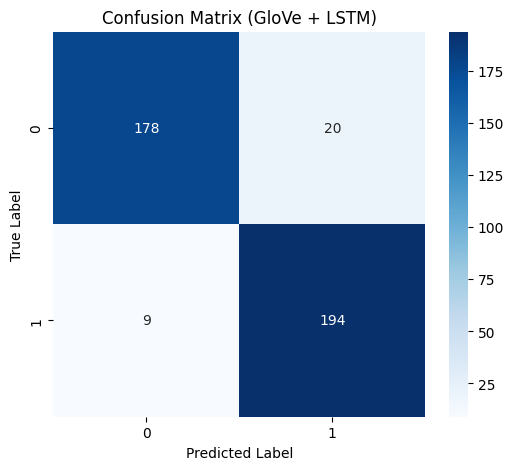


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       198
           1       0.91      0.96      0.93       203

    accuracy                           0.93       401
   macro avg       0.93      0.93      0.93       401
weighted avg       0.93      0.93      0.93       401



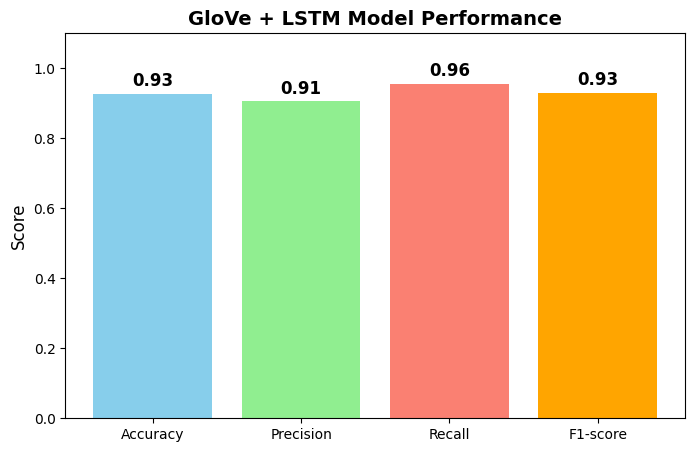

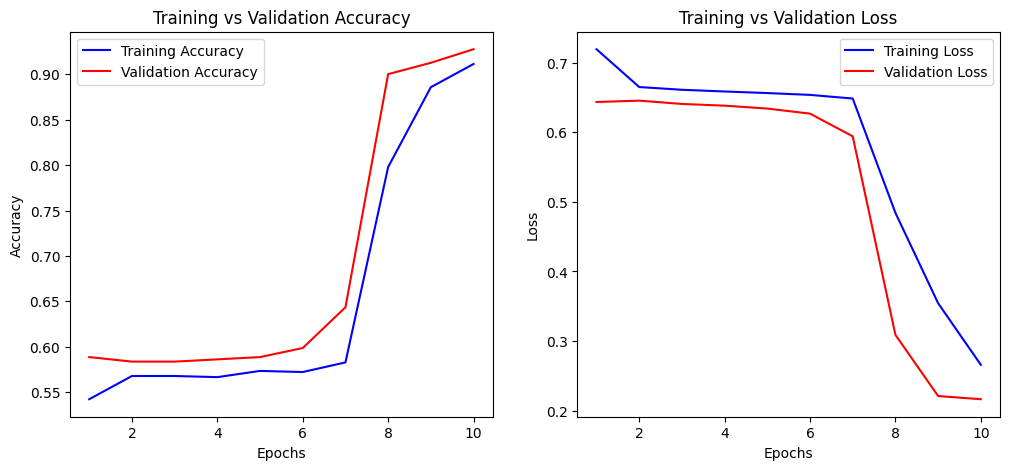

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (GloVe + LSTM)')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("GloVe + LSTM Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



# **GLOVE + BIGRU**

In [ ]:

import numpy as np
import gensim.downloader as api
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, GRU
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


MAX_LEN = 256
EMBEDDING_DIM = 300
BATCH_SIZE = 32
EPOCHS = 10


print("[INFO] Loading word2vec embeddings (may take a while)...")
w2v = api.load("word2vec-google-news-300")


def sentence_to_w2v_sequence(sentence, max_len=MAX_LEN):
    words = sentence.split()
    vecs = [w2v[word] for word in words if word in w2v]
    if len(vecs) == 0:  # fallback for empty sentence
        vecs = [np.zeros(EMBEDDING_DIM)]
    return vecs


print("[INFO] Generating word2vec sequences for all texts...")
X_seq = [sentence_to_w2v_sequence(text) for text in X_cleaned]


X_padded = pad_sequences(
    X_seq,
    maxlen=MAX_LEN,
    dtype='float32',
    padding='post',
    truncating='post',
    value=0.0
)

y = np.array(y_cleaned)
print(f"[INFO] Shape of padded sequences: {X_padded.shape}")


X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y, test_size=0.2, random_state=42
)

model = Sequential()
model.add(Bidirectional(GRU(128, return_sequences=False, kernel_regularizer=regularizers.l2(1e-4)),
                           input_shape=(MAX_LEN, EMBEDDING_DIM)))

model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

print("[INFO] Training started...")
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
     callbacks=[early_stopping],
    verbose=1
)


[INFO] Loading word2vec embeddings (may take a while)...
[INFO] Generating word2vec sequences for all texts...
[INFO] Shape of padded sequences: (2000, 256, 300)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 256)            │       330,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 346,753 (1.32 MB)

 Trainable params: 346,753 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

[INFO] Training started...
Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.6435 - loss: 0.6686 - val_accuracy: 0.9150 - val_loss: 0.3194
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9129 - loss: 0.2937 - val_accuracy: 0.9275 - val_loss: 0.2356
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9360 - loss: 0.2083 - val_accuracy: 0.9300 - val_loss: 0.2024
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9454 - loss: 0.1651 - val_accuracy: 0.9400 - val_loss: 0.1991
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9651 - loss: 0.1324 - val_accuracy: 0.9325 - val_loss: 0.2281
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9683 - loss: 0.1283 - val_accuracy: 0.9325 - val_loss: 0.2362
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9720 - loss: 0.1101 - val_accuracy: 0.9425 - val_loss: 0.2119
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9746 - loss: 0.0903

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


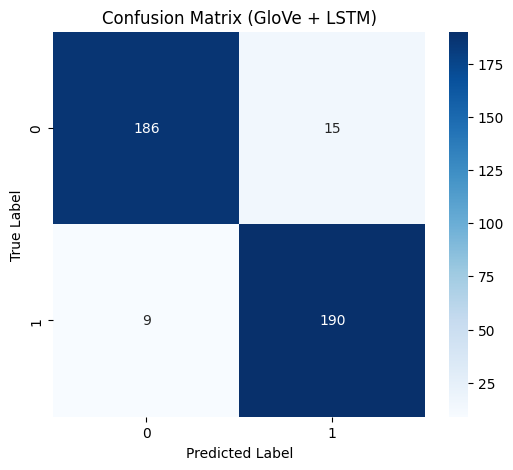


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       201
           1       0.93      0.95      0.94       199

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



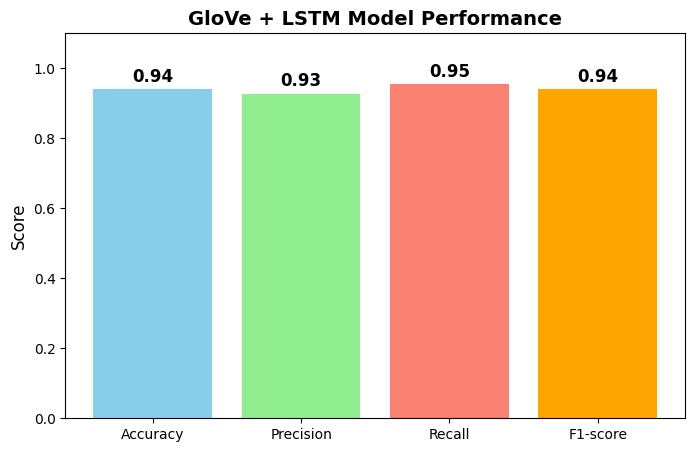

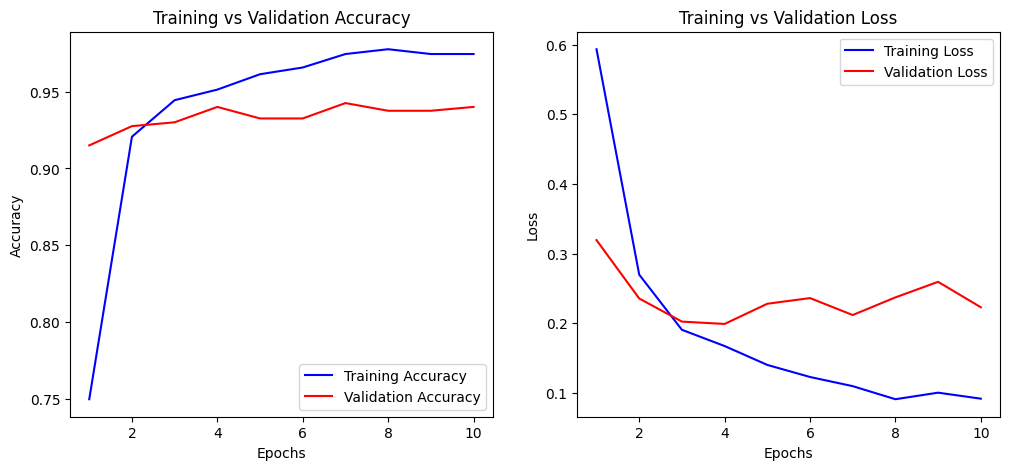

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (GloVe + LSTM)')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("GloVe + LSTM Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



# **GLOVE + Logistic regression**

In [ ]:
import numpy as np
import gensim.downloader as api
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

MAX_LEN = 256
EMBEDDING_DIM = 300
BATCH_SIZE = 32
EPOCHS = 10

print("[INFO] Loading word2vec embeddings (may take a while)...")
w2v = api.load("word2vec-google-news-300")

def sentence_to_w2v_sequence(sentence, max_len=MAX_LEN):
    words = sentence.split()
    vecs = [w2v[word] for word in words if word in w2v]
    if len(vecs) == 0:  # fallback for empty sentence
        vecs = [np.zeros(EMBEDDING_DIM)]
    return vecs

print("[INFO] Generating word2vec sequences for all texts...")
X_seq = [sentence_to_w2v_sequence(text) for text in X_cleaned]

# PAD THE SEQUENCES FIRST
X_padded = pad_sequences(
    X_seq,
    maxlen=MAX_LEN,
    dtype='float32',
    padding='post',
    truncating='post',
    value=0.0
)

y = np.array(y_cleaned)
print(f"[INFO] Shape of padded sequences: {X_padded.shape}")

# Split the ALREADY PADDED sequences
X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y, test_size=0.2, random_state=42
)

print("\n[INFO] Training Logistic Regression model...")

# Now we can safely use np.mean on the padded arrays
X_train_avg = np.mean(X_train, axis=1)
X_test_avg = np.mean(X_test, axis=1)

print(f"[INFO] Shape of features for Logistic Regression: {X_train_avg.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_avg)
X_test_scaled = scaler.transform(X_test_avg)

lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    C=1.0,
    solver='liblinear'
)

lr_model.fit(X_train_scaled, y_train)



[INFO] Loading word2vec embeddings (may take a while)...
[INFO] Generating word2vec sequences for all texts...
[INFO] Shape of padded sequences: (2008, 256, 300)

[INFO] Training Logistic Regression model...
[INFO] Shape of features for Logistic Regression: (1606, 300)


LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')


LOGISTIC REGRESSION RESULTS
Accuracy: 0.9104
Precision: 0.9175
Recall: 0.8990
F1-Score: 0.9082

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       204
           1       0.92      0.90      0.91       198

    accuracy                           0.91       402
   macro avg       0.91      0.91      0.91       402
weighted avg       0.91      0.91      0.91       402



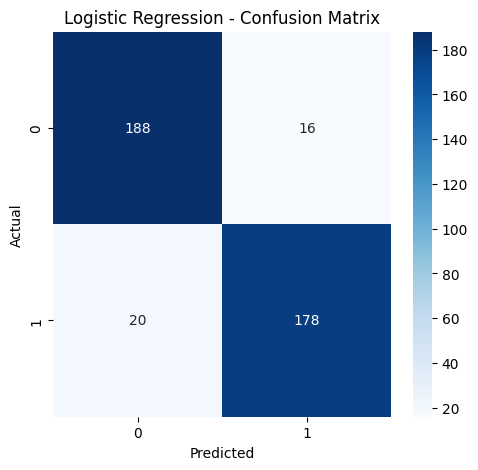

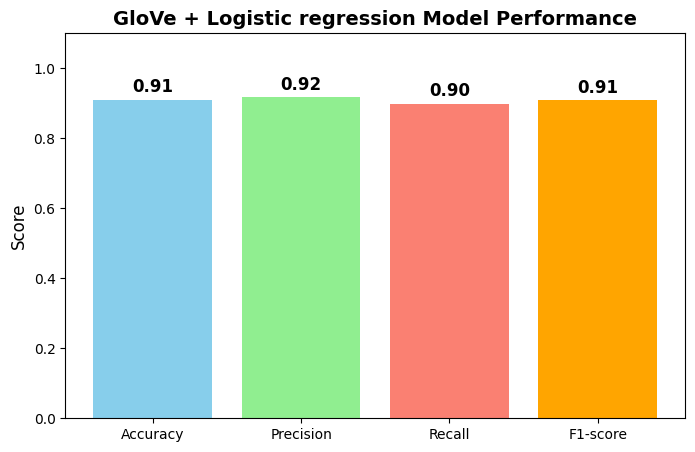

In [ ]:
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print("\n" + "="*50)
print("LOGISTIC REGRESSION RESULTS")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')


acc_score = accuracy_score(y_test, y_pred_lr)
prec_score = precision_score(y_test, y_pred_lr)
rec_score = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("GloVe + Logistic regression Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()


# **word2vec + Randomforest classifier**

[INFO] Loading word2vec embeddings (may take a while)...
[INFO] Generating word2vec sequences for all texts...
[INFO] Shape of padded sequences: (2008, 256, 300)
[INFO] Training Random Forest model...
[INFO] Shape after average pooling: (2008, 300)


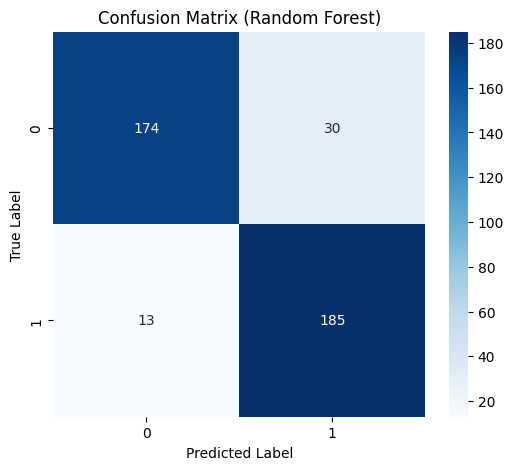


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       204
           1       0.86      0.93      0.90       198

    accuracy                           0.89       402
   macro avg       0.90      0.89      0.89       402
weighted avg       0.90      0.89      0.89       402



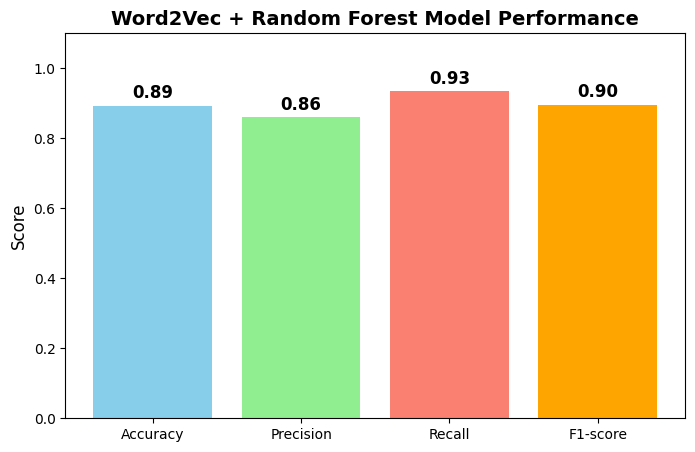

In [ ]:
import numpy as np
import gensim.downloader as api
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

MAX_LEN = 256
EMBEDDING_DIM = 300
BATCH_SIZE = 32
EPOCHS = 10

print("[INFO] Loading word2vec embeddings (may take a while)...")
w2v = api.load("word2vec-google-news-300")

def sentence_to_w2v_sequence(sentence, max_len=MAX_LEN):
    words = sentence.split()
    vecs = [w2v[word] for word in words if word in w2v]
    if len(vecs) == 0:  # fallback for empty sentence
        vecs = [np.zeros(EMBEDDING_DIM)]
    return vecs

print("[INFO] Generating word2vec sequences for all texts...")
X_seq = [sentence_to_w2v_sequence(text) for text in X_cleaned]

X_padded = pad_sequences(
    X_seq,
    maxlen=MAX_LEN,
    dtype='float32',
    padding='post',
    truncating='post',
    value=0.0
)

y = np.array(y_cleaned)
print(f"[INFO] Shape of padded sequences: {X_padded.shape}")

print("[INFO] Training Random Forest model...")

# OPTION 1: Average Pooling (Recommended - reduces dimensionality)
X_avg = np.mean(X_padded, axis=1)  # Shape: (n_samples, 300)
print(f"[INFO] Shape after average pooling: {X_avg.shape}")


X_train, X_test, y_train, y_test = train_test_split(
    X_avg, y, test_size=0.2, random_state=42
)

rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("Word2Vec + Random Forest Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()

# **word2vec + Xgboost**

In [ ]:
import numpy as np
import gensim.downloader as api
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

MAX_LEN = 256
EMBEDDING_DIM = 300
BATCH_SIZE = 32
EPOCHS = 10

print("[INFO] Loading word2vec embeddings (may take a while)...")
w2v = api.load("word2vec-google-news-300")

def sentence_to_w2v_sequence(sentence, max_len=MAX_LEN):
    words = sentence.split()
    vecs = [w2v[word] for word in words if word in w2v]
    if len(vecs) == 0:  # fallback for empty sentence
        vecs = [np.zeros(EMBEDDING_DIM)]
    return vecs

print("[INFO] Generating word2vec sequences for all texts...")
X_seq = [sentence_to_w2v_sequence(text) for text in X_cleaned]

X_padded = pad_sequences(
    X_seq,
    maxlen=MAX_LEN,
    dtype='float32',
    padding='post',
    truncating='post',
    value=0.0
)

y = np.array(y_cleaned)
print(f"[INFO] Shape of padded sequences: {X_padded.shape}")

print("[INFO] Training Random Forest model...")

# OPTION 1: Average Pooling (Recommended - reduces dimensionality)
X_avg = np.mean(X_padded, axis=1)  # Shape: (n_samples, 300)
print(f"[INFO] Shape after average pooling: {X_avg.shape}")


X_train, X_test, y_train, y_test = train_test_split(
    X_avg, y, test_size=0.2, random_state=42
)
print("[INFO] Training XGBoost model...")
xgb_clf = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_clf.fit(X_train, y_train)



[INFO] Loading word2vec embeddings (may take a while)...
[INFO] Generating word2vec sequences for all texts...
[INFO] Shape of padded sequences: (2008, 256, 300)
[INFO] Training Random Forest model...
[INFO] Shape after average pooling: (2008, 300)
[INFO] Training XGBoost model...


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

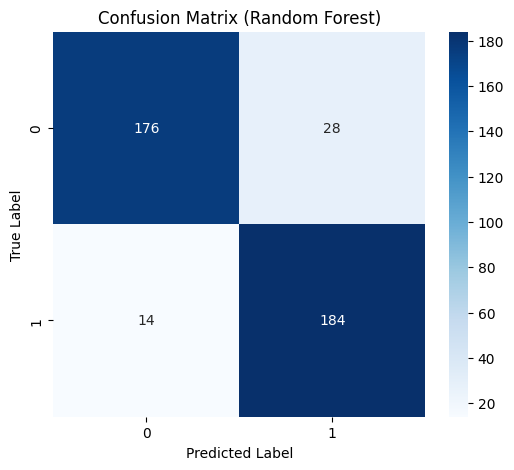


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       204
           1       0.87      0.93      0.90       198

    accuracy                           0.90       402
   macro avg       0.90      0.90      0.90       402
weighted avg       0.90      0.90      0.90       402



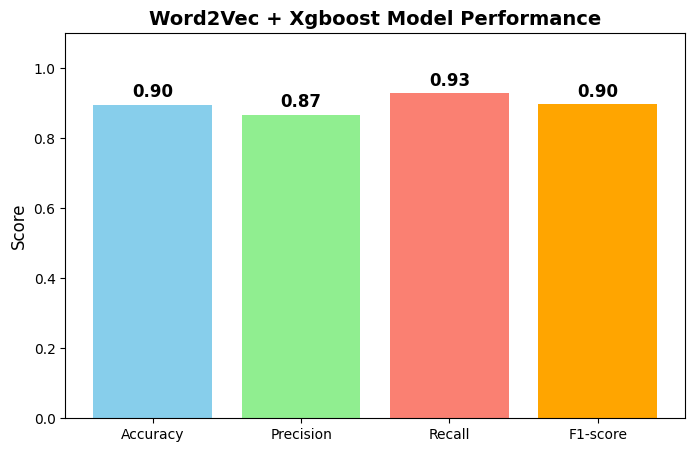

In [ ]:
y_pred = xgb_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("Word2Vec + Xgboost Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()

# **word2vec + Lightgbm**

In [ ]:
import numpy as np
import gensim.downloader as api
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

MAX_LEN = 256
EMBEDDING_DIM = 300
BATCH_SIZE = 32
EPOCHS = 10

print("[INFO] Loading word2vec embeddings (may take a while)...")
w2v = api.load("word2vec-google-news-300")

def sentence_to_w2v_sequence(sentence, max_len=MAX_LEN):
    words = sentence.split()
    vecs = [w2v[word] for word in words if word in w2v]
    if len(vecs) == 0:  # fallback for empty sentence
        vecs = [np.zeros(EMBEDDING_DIM)]
    return vecs

print("[INFO] Generating word2vec sequences for all texts...")
X_seq = [sentence_to_w2v_sequence(text) for text in X_cleaned]

X_padded = pad_sequences(
    X_seq,
    maxlen=MAX_LEN,
    dtype='float32',
    padding='post',
    truncating='post',
    value=0.0
)

y = np.array(y_cleaned)
print(f"[INFO] Shape of padded sequences: {X_padded.shape}")

print("[INFO] Training Random Forest model...")

# OPTION 1: Average Pooling (Recommended - reduces dimensionality)
X_avg = np.mean(X_padded, axis=1)  # Shape: (n_samples, 300)
print(f"[INFO] Shape after average pooling: {X_avg.shape}")


X_train, X_test, y_train, y_test = train_test_split(
    X_avg, y, test_size=0.2, random_state=42
)
print("[INFO] Training Lightgbm model...")
clf_lgb = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)


clf_lgb.fit(X_train, y_train)






[INFO] Loading word2vec embeddings (may take a while)...
[INFO] Generating word2vec sequences for all texts...
[INFO] Shape of padded sequences: (2008, 256, 300)
[INFO] Training Random Forest model...
[INFO] Shape after average pooling: (2008, 300)
[INFO] Training Lightgbm model...
[LightGBM] [Info] Number of positive: 807, number of negative: 799
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007846 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 76500
[LightGBM] [Info] Number of data points in the train set: 1606, number of used features: 300
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502491 -> initscore=0.009963
[LightGBM] [Info] Start training from score 0.009963
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

LGBMClassifier(learning_rate=0.05, n_estimators=500, random_state=42)

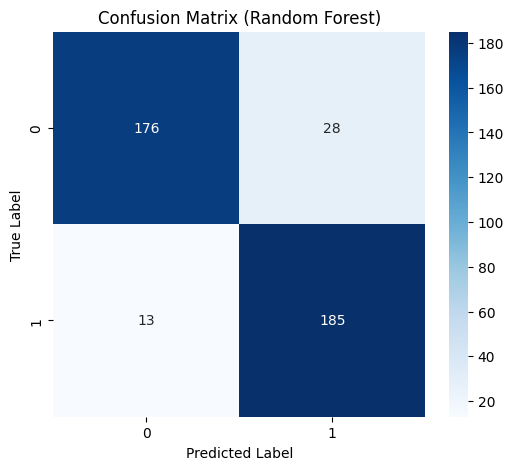


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       204
           1       0.87      0.93      0.90       198

    accuracy                           0.90       402
   macro avg       0.90      0.90      0.90       402
weighted avg       0.90      0.90      0.90       402



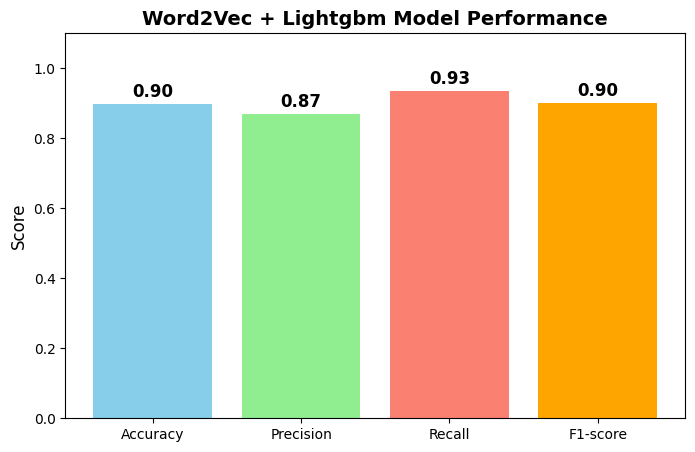

In [ ]:
y_pred = clf_lgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

scores = [acc_score, prec_score, rec_score, f1]
labels = ["Accuracy", "Precision", "Recall", "F1-score"]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, scores, color=['skyblue','lightgreen','salmon','orange'])
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=12, fontweight="bold")
plt.ylim(0,1.1)
plt.title("Word2Vec + Lightgbm Model Performance", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.show()